<a href="https://colab.research.google.com/github/MarianoChic09/MSc-AI-taller-de-deep-learning/blob/main/TDL2023_Obligatorio_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 105038771.45it/s]


Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27160469.47it/s]


Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37119746.86it/s]


Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4673829.43it/s]


Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



In [ ]:
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
z_dim = 100
mnist_dim = train_dataset.train_data.size(1) * train_dataset.train_data.size(2)

G = Generator(input_dim=z_dim, output_dim=mnist_dim).cuda()
D = Discriminator(input_dim=mnist_dim).cuda()

criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = optim.Adam(G.parameters(), lr=0.0002)


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [ ]:
num_epochs = 2000
losses_g = []
losses_d = []

for epoch in range(num_epochs):
    for batch_idx, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, -1).cuda()

        # Etiquetas
        real_labels = torch.ones(batch_size, 1).cuda()
        fake_labels = torch.zeros(batch_size, 1).cuda()

        # ===== Entrenamiento del discriminador =====
        outputs = D(real_images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, z_dim).cuda()
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # ===== Entrenamiento del generador =====
        z = torch.randn(batch_size, z_dim).cuda()
        fake_images = G(z)
        outputs = D(fake_images)

        g_loss = criterion(outputs, real_labels)

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        losses_g.append(g_loss.item())
        losses_d.append(d_loss.item())

    print(f'Epoch [{epoch}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score.mean().item():.2f}, D(G(z)): {fake_score.mean().item():.2f}')



Epoch [0/2000], d_loss: 0.6078, g_loss: 1.8790, D(x): 0.77, D(G(z)): 0.20
Epoch [1/2000], d_loss: 0.9999, g_loss: 2.1988, D(x): 0.65, D(G(z)): 0.25
Epoch [2/2000], d_loss: 0.8157, g_loss: 1.8061, D(x): 0.73, D(G(z)): 0.27
Epoch [3/2000], d_loss: 0.7725, g_loss: 1.9381, D(x): 0.71, D(G(z)): 0.22
Epoch [4/2000], d_loss: 0.7260, g_loss: 1.5017, D(x): 0.84, D(G(z)): 0.34
Epoch [5/2000], d_loss: 0.8763, g_loss: 1.3499, D(x): 0.74, D(G(z)): 0.33
Epoch [6/2000], d_loss: 0.9383, g_loss: 1.6986, D(x): 0.75, D(G(z)): 0.34
Epoch [7/2000], d_loss: 0.8419, g_loss: 1.8623, D(x): 0.73, D(G(z)): 0.26
Epoch [8/2000], d_loss: 1.0521, g_loss: 1.7055, D(x): 0.63, D(G(z)): 0.26
Epoch [9/2000], d_loss: 0.8751, g_loss: 1.9987, D(x): 0.63, D(G(z)): 0.15
Epoch [10/2000], d_loss: 0.6479, g_loss: 2.1023, D(x): 0.73, D(G(z)): 0.16
Epoch [11/2000], d_loss: 0.9564, g_loss: 2.0202, D(x): 0.70, D(G(z)): 0.30
Epoch [12/2000], d_loss: 0.8859, g_loss: 1.9218, D(x): 0.70, D(G(z)): 0.26
Epoch [13/2000], d_loss: 0.8479, g_

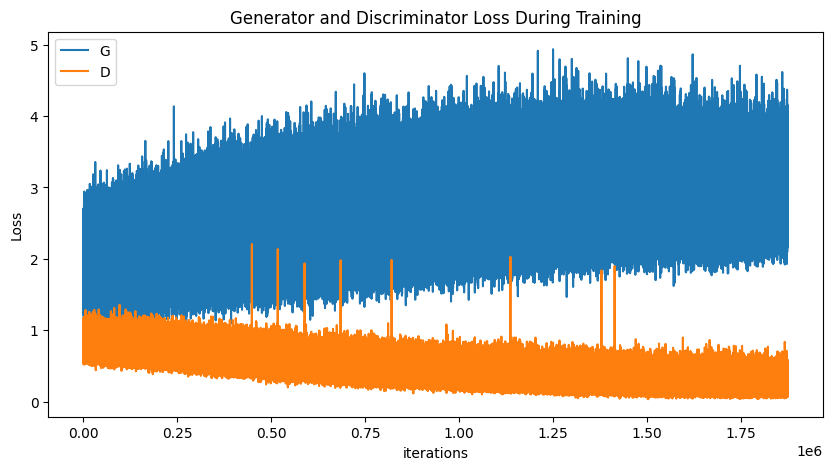

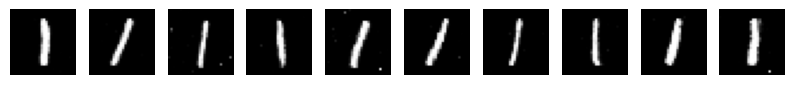

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(losses_g, label="G")
plt.plot(losses_d, label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()e

def show_fake_images(generator, num_images=10):
    z = torch.randn(num_images, z_dim).cuda()
    fake_images = generator(z)
    fake_images = fake_images.view(fake_images.size(0), 28, 28).data.cpu().numpy()

    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(fake_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

show_fake_images(G)


# DCGANs

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


In [ ]:
batch_size = 100
learning_rate = 0.0002
z_dim = 100
z = torch.randn(batch_size, z_dim, 1, 1).cuda()


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, ), std=(0.5, ))
])

mnist = dsets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True)


In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(z_dim, 256, 4, 1, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 3, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 3, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


In [ ]:
G = Generator().cuda()
D = Discriminator().cuda()

G.apply(weights_init)
D.apply(weights_init)


Discriminator(
  (main): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (9): Sigmoid()
  )
)

In [ ]:
criterion = nn.BCELoss()

d_optimizer = torch.optim.Adam(D.parameters(), lr=learning_rate)
g_optimizer = torch.optim.Adam(G.parameters(), lr=learning_rate)


In [ ]:
def show_fake_images(generator, num_images=10):
    z = torch.randn(batch_size, z_dim, 1, 1).cuda()  # Ajuste del tamaño del ruido
    fake_images = generator(z)
    fake_images = fake_images.view(fake_images.size(0), 28, 28).data.cpu().numpy()

    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(fake_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

In [ ]:
# Listas para almacenar pérdidas y visualizar después
losses_g = []
losses_d = []

num_epochs = 100
i = 0
# Bucle de entrenamiento
for epoch in range(num_epochs):
    for batch_idx, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.cuda()

        # Etiquetas
        # real_labels = torch.ones(batch_size, 1).cuda()
        # fake_labels = torch.zeros(batch_size, 1).cuda()
        real_labels = torch.ones(batch_size, 1, 1, 1).cuda()
        fake_labels = torch.zeros(batch_size, 1, 1, 1).cuda()

        # ===== Entrenamiento del discriminador =====
        # Computar la pérdida con imágenes reales
        outputs = D(real_images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # Computar la pérdida con imágenes falsas
        z = torch.randn(batch_size, z_dim, 1, 1).cuda()  # Ajuste del tamaño del ruido
        fake_images = G(z)
        outputs = D(fake_images.detach()) # .detach() para no entrenar G aquí
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        # Backpropagation y optimización
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # ===== Entrenamiento del generador =====
        z = torch.randn(batch_size, z_dim, 1, 1).cuda()
        fake_images = G(z)
        outputs = D(fake_images)

        g_loss = criterion(outputs, real_labels)  # Aquí usamos real_labels porque queremos que el generador engañe al discriminador

        # Backpropagation y optimización
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        # Almacenar las pérdidas
        losses_g.append(g_loss.item())
        losses_d.append(d_loss.item())

        i += 1
        if i == 10:
          show_fake_images(G)
          i = 0

    # Imprimir las estadísticas del entrenamiento
    print(f'Epoch [{epoch}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score.mean().item():.2f}, D(G(z)): {fake_score.mean().item():.2f}')


Epoch [0/100], d_loss: 0.5233, g_loss: 2.6116, D(x): 0.80, D(G(z)): 0.21
Epoch [1/100], d_loss: 0.2510, g_loss: 3.8534, D(x): 0.89, D(G(z)): 0.11
Epoch [2/100], d_loss: 0.1739, g_loss: 3.5643, D(x): 0.88, D(G(z)): 0.03
Epoch [3/100], d_loss: 0.0562, g_loss: 6.9869, D(x): 0.97, D(G(z)): 0.02
Epoch [4/100], d_loss: 0.2217, g_loss: 5.3016, D(x): 0.88, D(G(z)): 0.08
Epoch [5/100], d_loss: 0.3051, g_loss: 2.3579, D(x): 0.96, D(G(z)): 0.20
Epoch [6/100], d_loss: 0.2160, g_loss: 2.6226, D(x): 0.87, D(G(z)): 0.06
Epoch [7/100], d_loss: 0.2657, g_loss: 1.0583, D(x): 0.95, D(G(z)): 0.18
Epoch [8/100], d_loss: 0.5313, g_loss: 0.5384, D(x): 0.99, D(G(z)): 0.34
Epoch [9/100], d_loss: 0.3485, g_loss: 5.5782, D(x): 0.75, D(G(z)): 0.02
Epoch [10/100], d_loss: 0.2717, g_loss: 2.0085, D(x): 0.94, D(G(z)): 0.17
Epoch [11/100], d_loss: 0.6070, g_loss: 3.3490, D(x): 0.61, D(G(z)): 0.02
Epoch [12/100], d_loss: 0.2789, g_loss: 1.5168, D(x): 0.81, D(G(z)): 0.04
Epoch [13/100], d_loss: 0.4131, g_loss: 1.5709, 

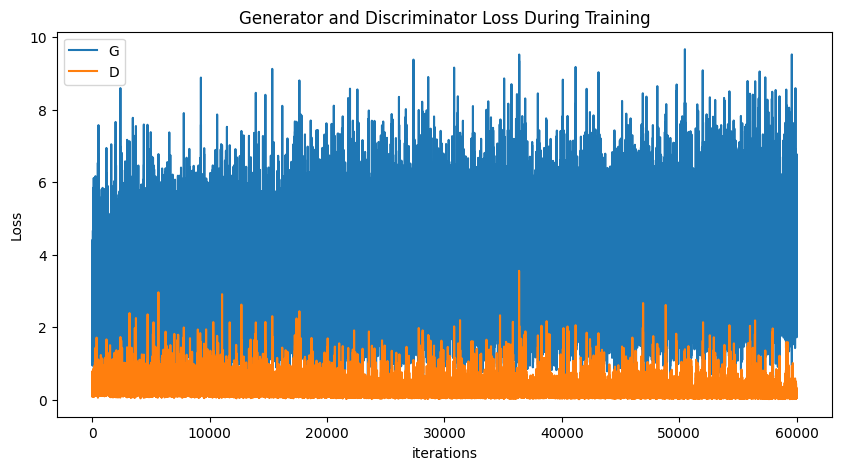

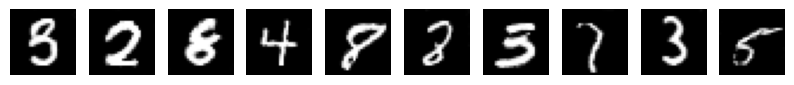

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(losses_g, label="G")
plt.plot(losses_d, label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()



show_fake_images(G)

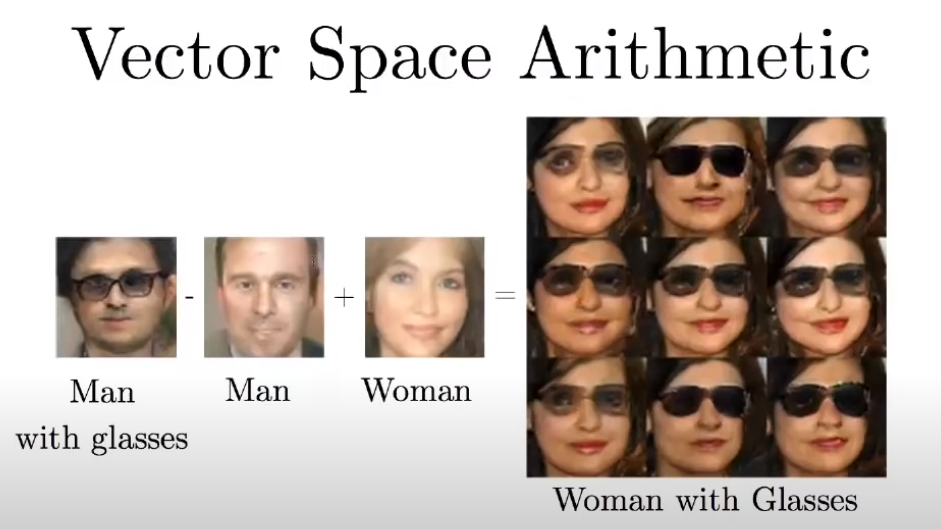

# Otros datasets

## Fashion Mnist

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Transformación común para la mayoría de los datasets (puede necesitar ajustes específicos)
fashion_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Sólo un canal, por lo tanto, una media y una desviación estándar
])

# CIFAR-10
# cifar10_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# cifar10_loader = DataLoader(cifar10_dataset, batch_size=128, shuffle=True)

# CIFAR-100
# cifar100_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
# cifar100_loader = DataLoader(cifar100_dataset, batch_size=128, shuffle=True)

# CelebA (puede necesitar descargarlo manualmente o ajustar el código según la estructura de carpetas)
# celeba_dataset = datasets.ImageFolder(root='./data/celeba', transform=transform)
# celeba_loader = DataLoader(celeba_dataset, batch_size=128, shuffle=True)

# Fashion MNIST
fashion_mnist_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=fashion_transform)
fashion_mnist_loader = DataLoader(fashion_mnist_dataset, batch_size=128, shuffle=True)

# LSUN (debes especificar las categorías que deseas)
# lsun_dataset = datasets.LSUN(root='./data', classes=['bedroom_train'], transform=transform)
# lsun_loader = DataLoader(lsun_dataset, batch_size=128, shuffle=True)


### Arquitectura del Generador:
- Inicialización (__init__):

  - num_features: Esta es la dimensión del espacio latente de entrada. Por ejemplo, si num_features es 100, entonces la entrada al generador es un vector de ruido aleatorio de 100 dimensiones.
- Primera Etapa (self.main):

  - nn.Linear(num_features, 7*7*128): Esta capa lineal (completamente conectada) toma el vector de ruido y lo transforma en un vector plano de dimensiones 7*7*128. Esto se hace para preparar los datos para que sean remodelados en una representación de imagen 2D que será procesada por las capas convolucionales transpuestas. En este caso, se interpretará como 128 canales de una imagen de 7x7 píxeles.
  - nn.BatchNorm1d(7*7*128): Batch normalization ayuda a estabilizar el aprendizaje normalizando la salida de la capa anterior. Esto puede acelerar el entrenamiento y reducir la sensibilidad a la inicialización de los pesos.
  - nn.ReLU(True): Una función de activación ReLU (Rectified Linear Unit) que introduce no linealidad, permitiendo que el modelo aprenda patrones más complejos.

- Segunda Etapa (self.deconv):
  - nn.ConvTranspose2d(128, 64, ...): La primera capa convolucional transpuesta, a veces llamada deconvolución, toma los 128 canales de 7x7 y los "upsamplea" para hacer un tensor más grande. El kernel de tamaño 5, stride de 2, y padding de 2 aumentan el tamaño de la imagen mientras se añaden más detalles.
  - nn.BatchNorm2d(64): Batch normalization para la salida 2D.
  - nn.ReLU(True): Otra capa ReLU para introducir no linealidad.
  - nn.ConvTranspose2d(64, 1, ...): Una segunda capa convolucional transpuesta que reduce el número de canales de 64 a 1 (para una imagen en escala de grises) y aumenta aún más el tamaño de la imagen para llegar al tamaño deseado, en este caso, 28x28 que es el tamaño estándar para MNIST.
  - nn.Tanh(): La función de activación tangente hiperbólica se utiliza para normalizar los valores de los píxeles a estar entre -1 y 1, que es un rango común para las imágenes normalizadas.

### Arquitectura del Discriminador
- Inicialización (__init__):
No hay argumentos explícitos en este caso, lo que significa que el discriminador asume una entrada estándar que es consistente con lo que el generador produce.

- Capas Convolucionales (self.main- ):

  - nn.Conv2d(1, 64, 4, 2, 1, bias=False): Esta es la primera capa convolucional que toma una imagen de un canal (como una imagen en escala de grises) y aplica 64 filtros con un kernel de tamaño 4, stride de 2 y padding de 1.

  - nn.LeakyReLU(0.2, inplace=True): La función de activación LeakyReLU permite que pasen pequeñas gradientes negativas, lo cual puede ayudar a mantener la diversidad de gradientes durante el entrenamiento, particularmente en las etapas iniciales.

  - nn.Conv2d(64, 128, 4, 2, 1, bias=False): Otra capa convolucional que incrementa los canales de 64 a 128 mientras reduce el tamaño espacial de la  imagen por un factor de 2 nuevamente.

  - nn.BatchNorm2d(128): Normalización por lotes para la salida de 128 canales.

  - nn.LeakyReLU(0.2, inplace=True): Aplica nuevamente la activación LeakyReLU.

  - nn.Conv2d(128, 256, 3, 2, 1, bias=False): Aumenta aún más la profundidad de los canales y reduce el tamaño espacial. Esta capa puede capturar - - características más abstractas y complejas a medida que se avanza en la red.

  - nn.BatchNorm2d(256): Normalización por lotes para los canales de salida de 256.

  - nn.LeakyReLU(0.2, inplace=True): Otra capa de activación LeakyReLU.

  - nn.Conv2d(256, 1, 4, 1, 0, bias=False): Esta última capa convolucional reduce los múltiples canales a un único valor escalar, que servirá como la - puntuación del discriminador para la entrada dada.

  - nn.Sigmoid(): La función sigmoid convierte el valor escalar en una probabilidad entre 0 y 1, interpretada como la probabilidad de que la entrada sea una imagen real en lugar de una generada por el generador.

100%|██████████| 1875/1875 [01:58<00:00, 15.89it/s]


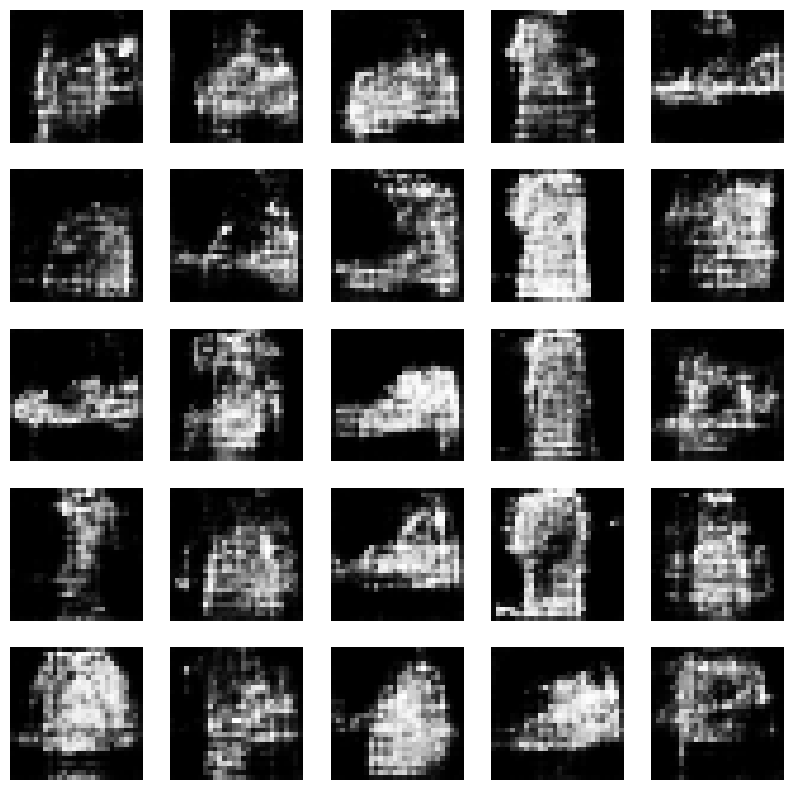

100%|██████████| 1875/1875 [01:57<00:00, 15.95it/s]


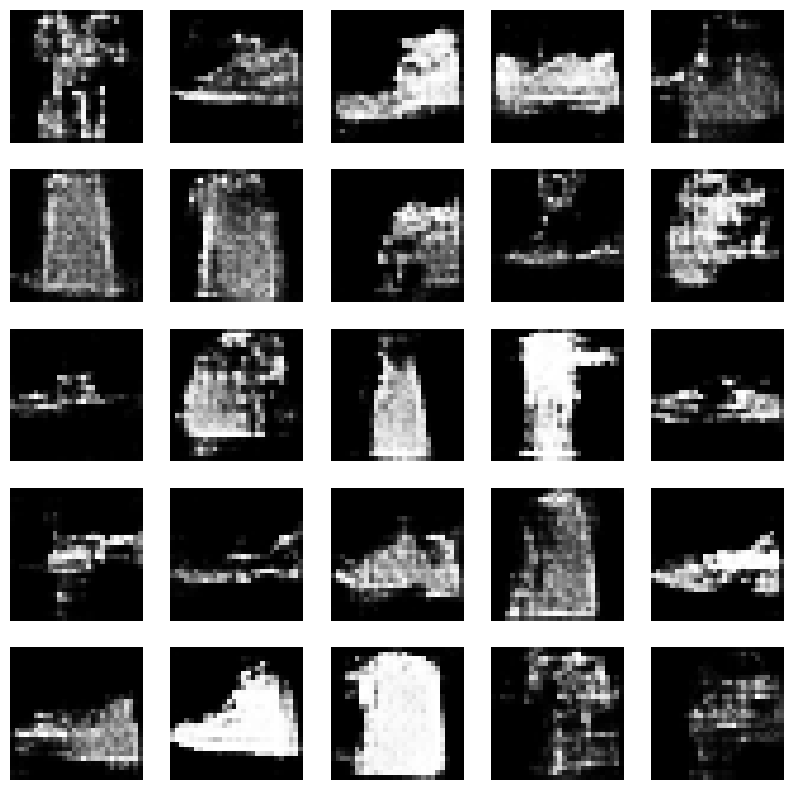

100%|██████████| 1875/1875 [01:57<00:00, 15.96it/s]


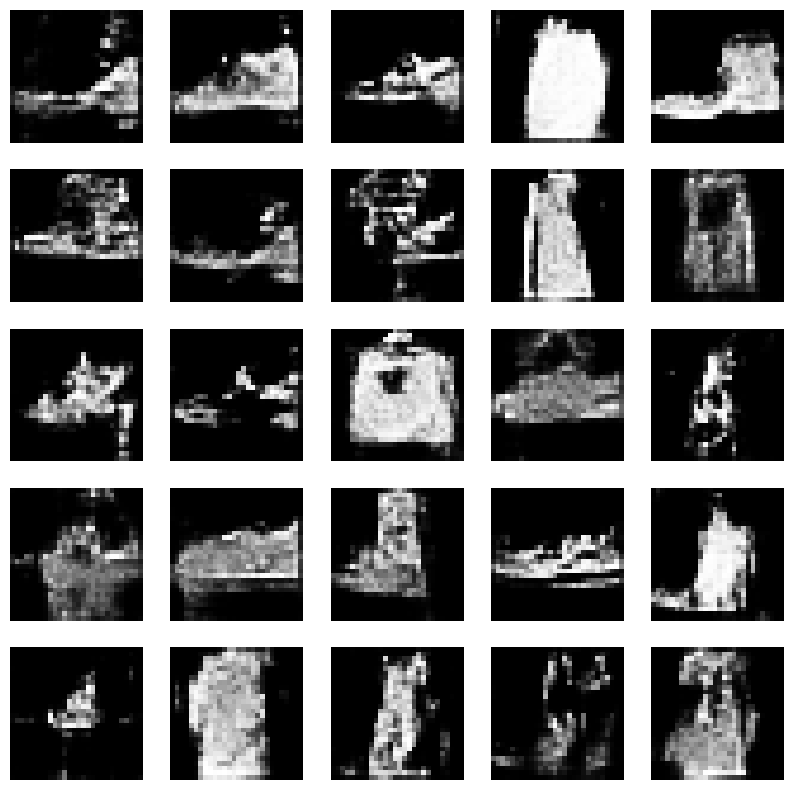

100%|██████████| 1875/1875 [01:59<00:00, 15.68it/s]


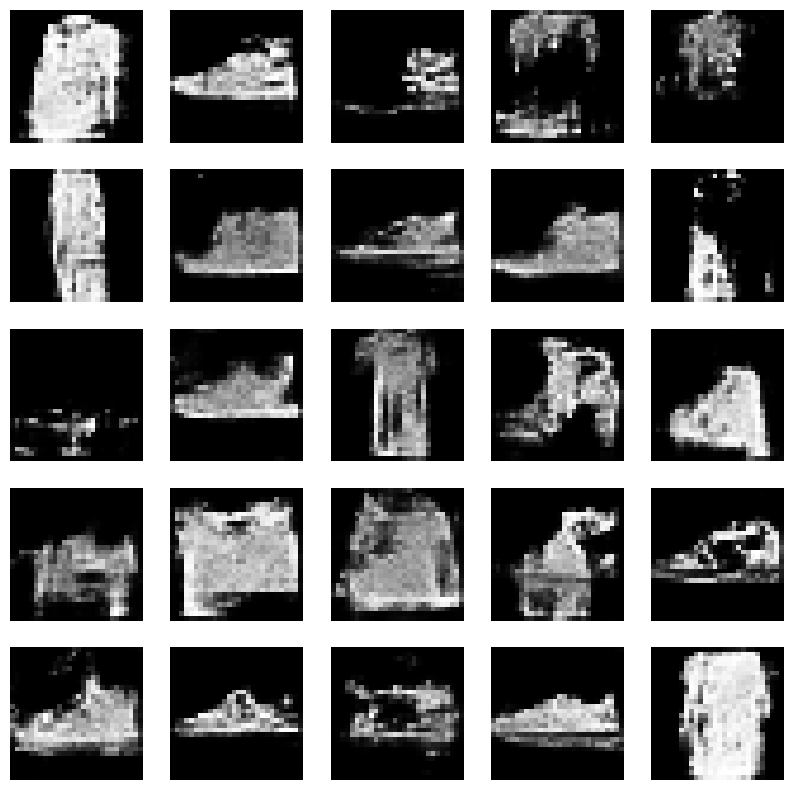

100%|██████████| 1875/1875 [02:00<00:00, 15.59it/s]


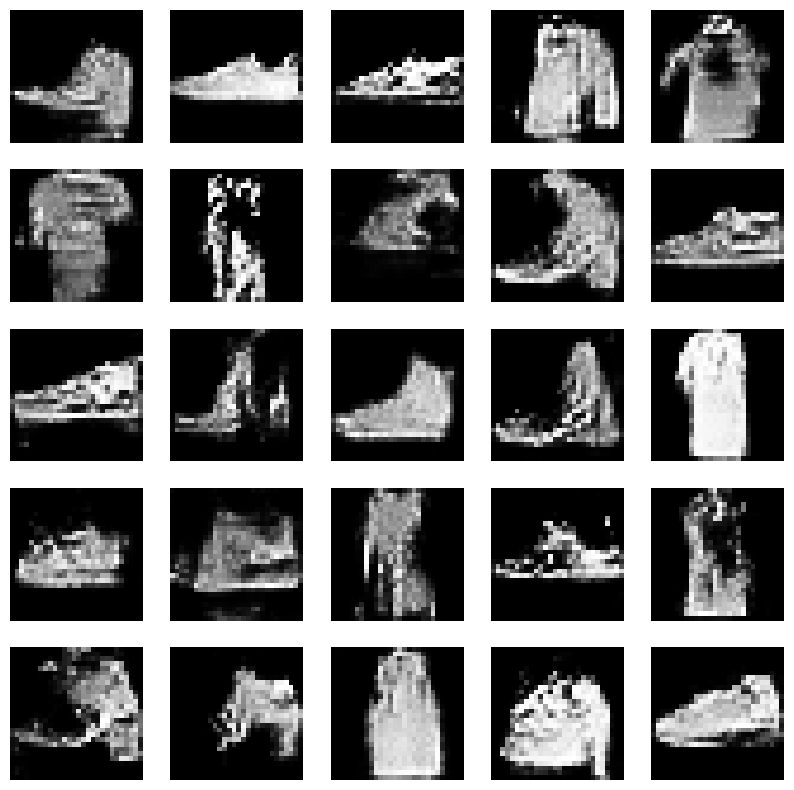

100%|██████████| 1875/1875 [01:59<00:00, 15.73it/s]


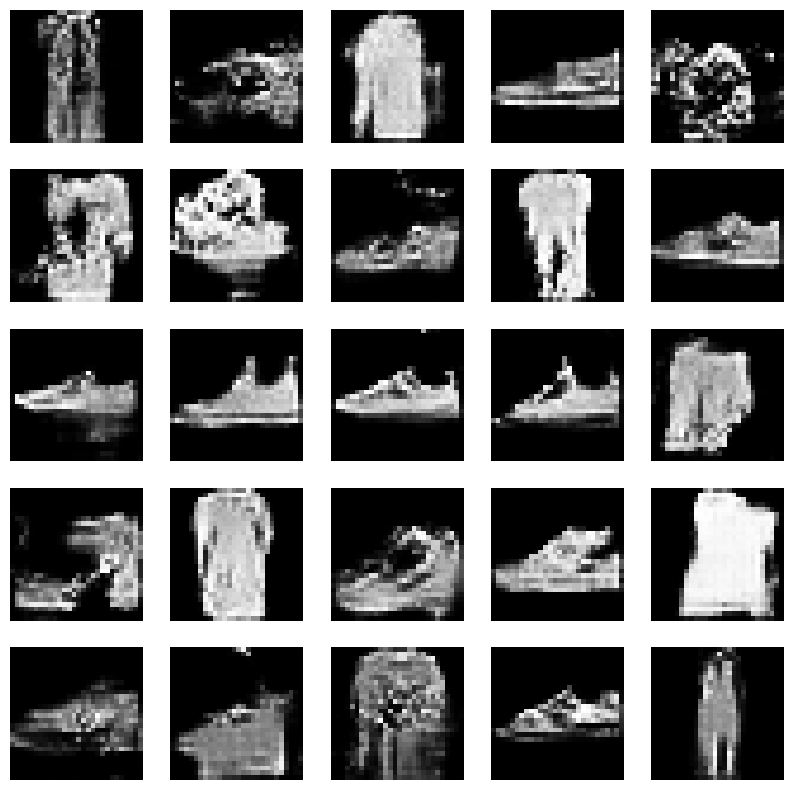

100%|██████████| 1875/1875 [01:59<00:00, 15.66it/s]


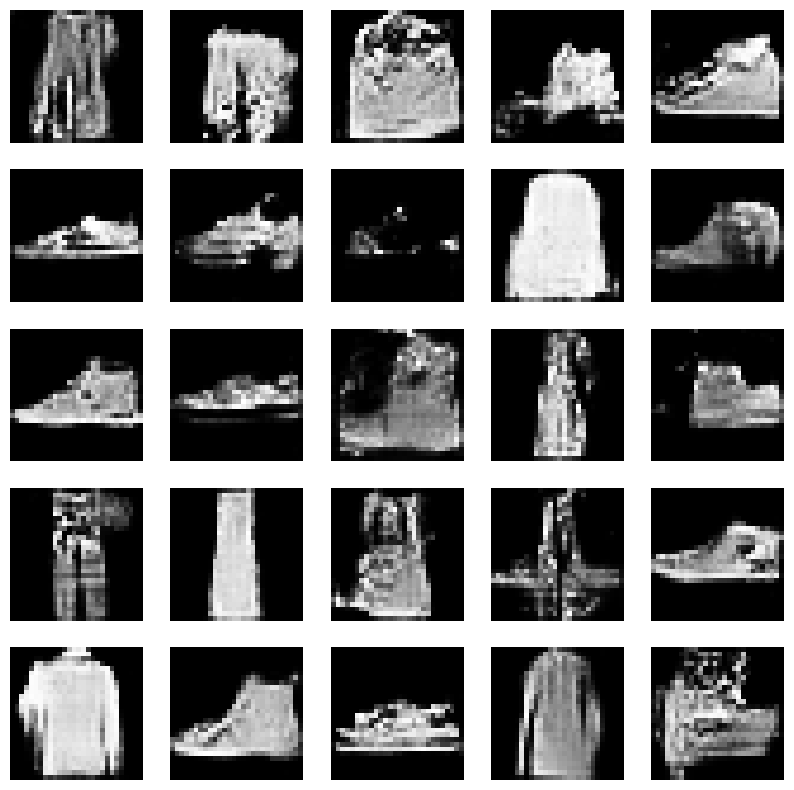

100%|██████████| 1875/1875 [02:05<00:00, 14.98it/s]


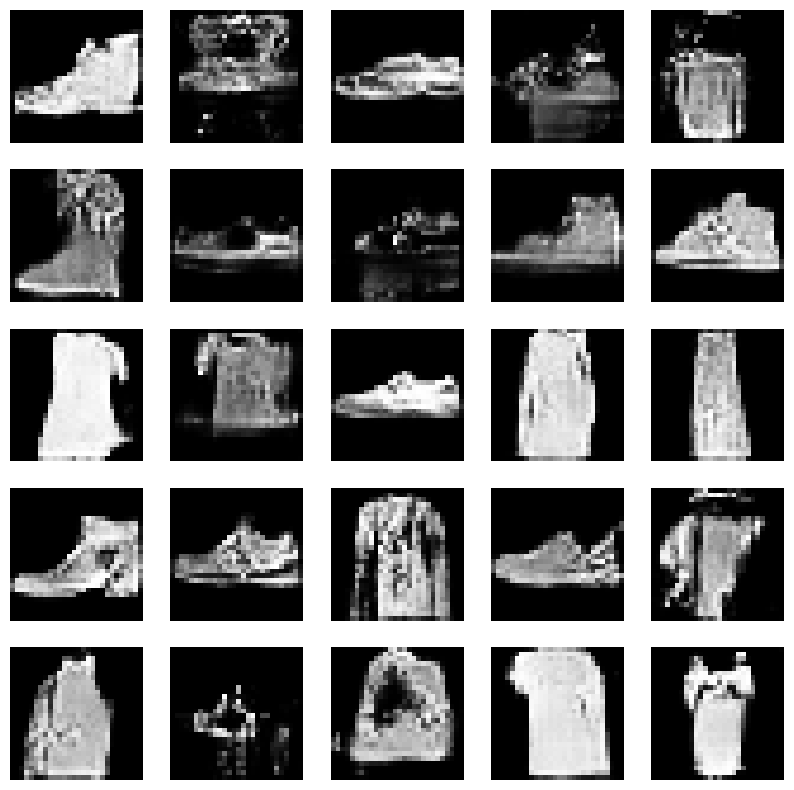

100%|██████████| 1875/1875 [01:58<00:00, 15.85it/s]


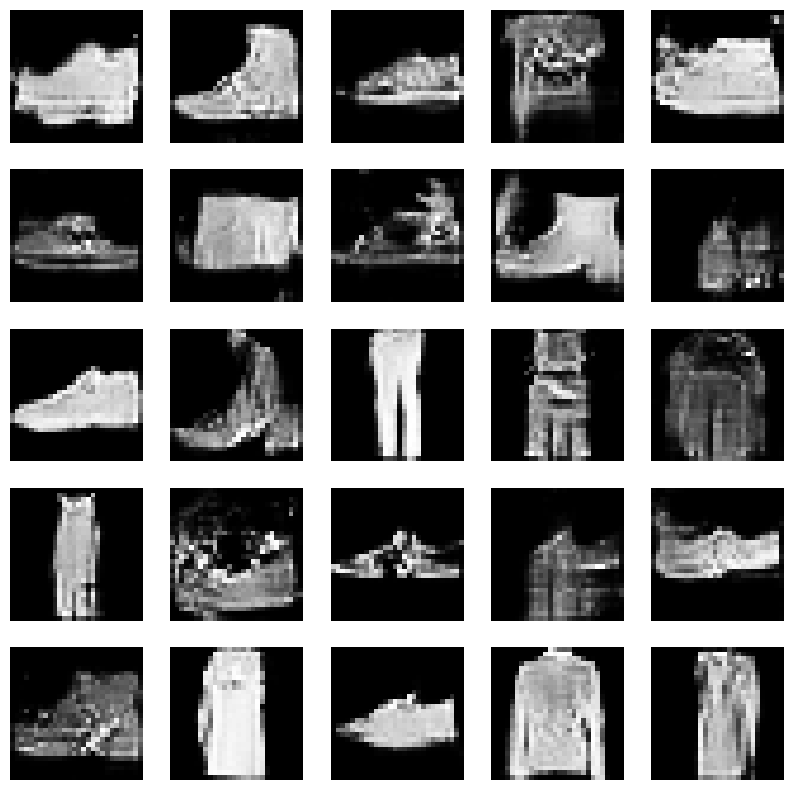

100%|██████████| 1875/1875 [02:02<00:00, 15.33it/s]


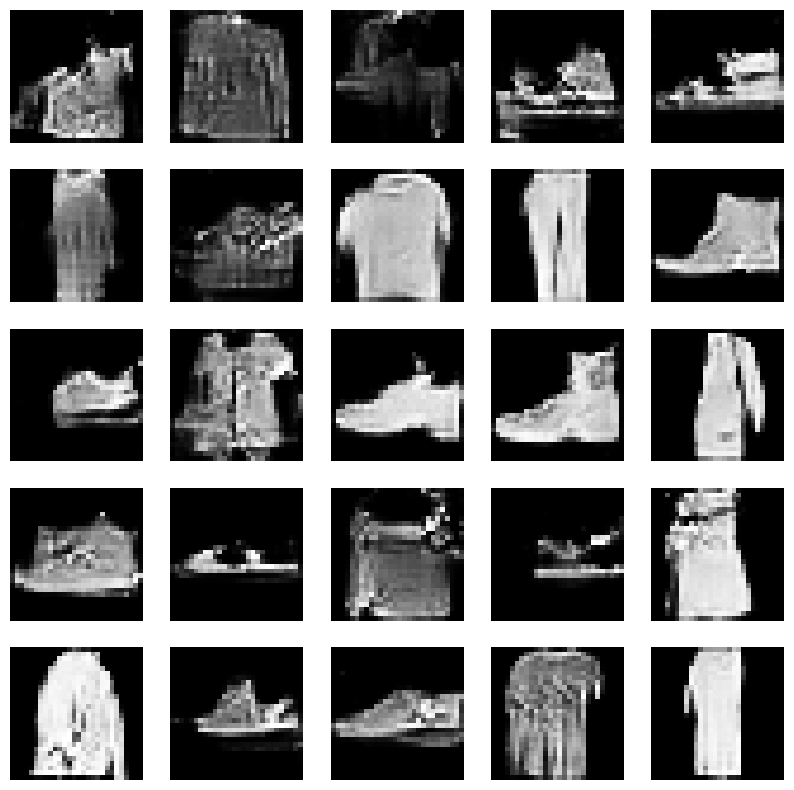

100%|██████████| 1875/1875 [01:57<00:00, 15.93it/s]


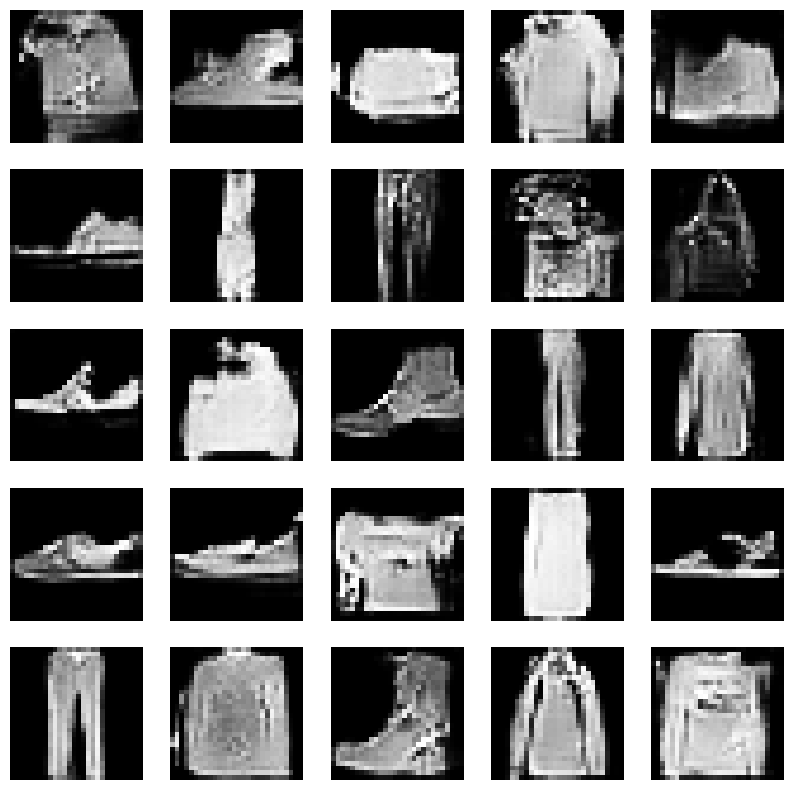

100%|██████████| 1875/1875 [01:58<00:00, 15.79it/s]


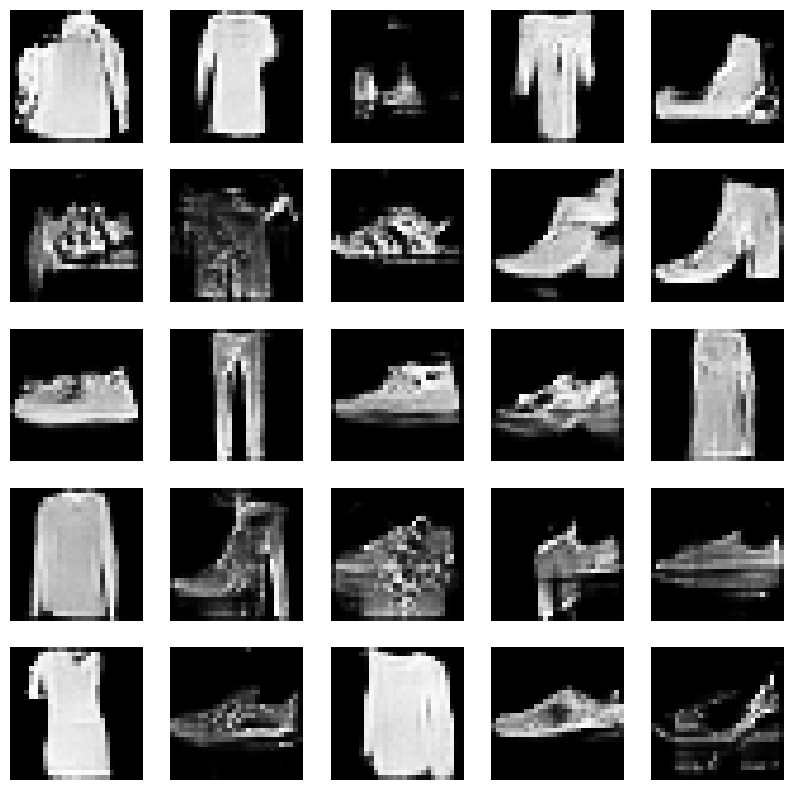

100%|██████████| 1875/1875 [01:58<00:00, 15.89it/s]


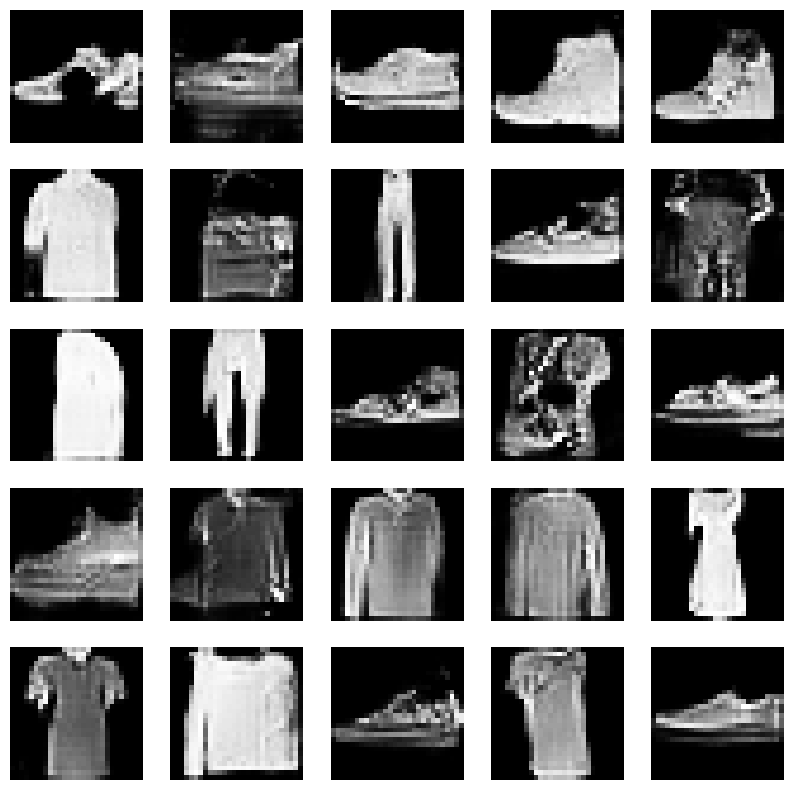

100%|██████████| 1875/1875 [01:59<00:00, 15.70it/s]


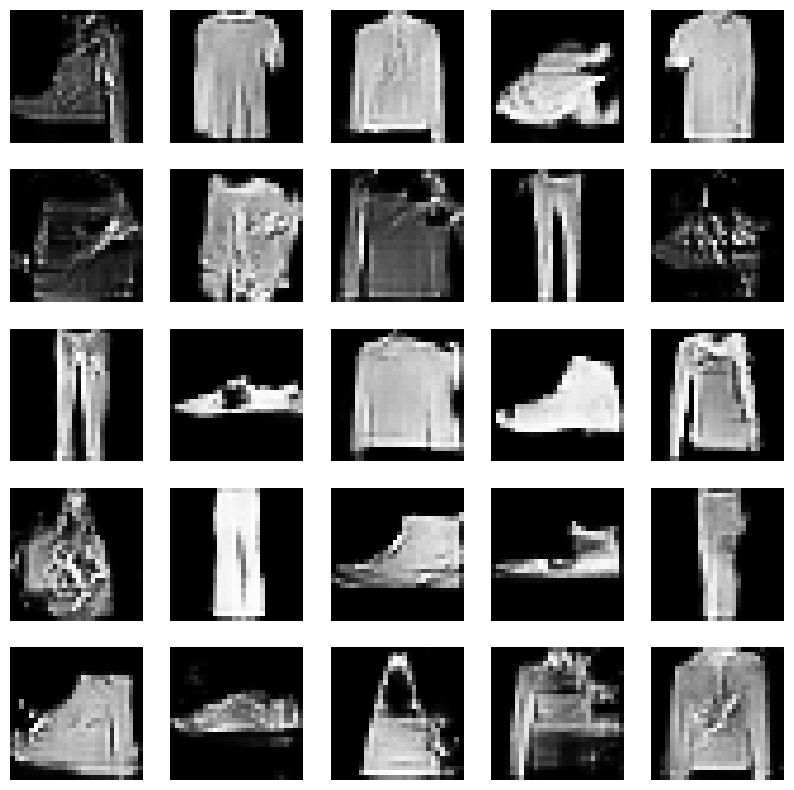

100%|██████████| 1875/1875 [01:59<00:00, 15.68it/s]


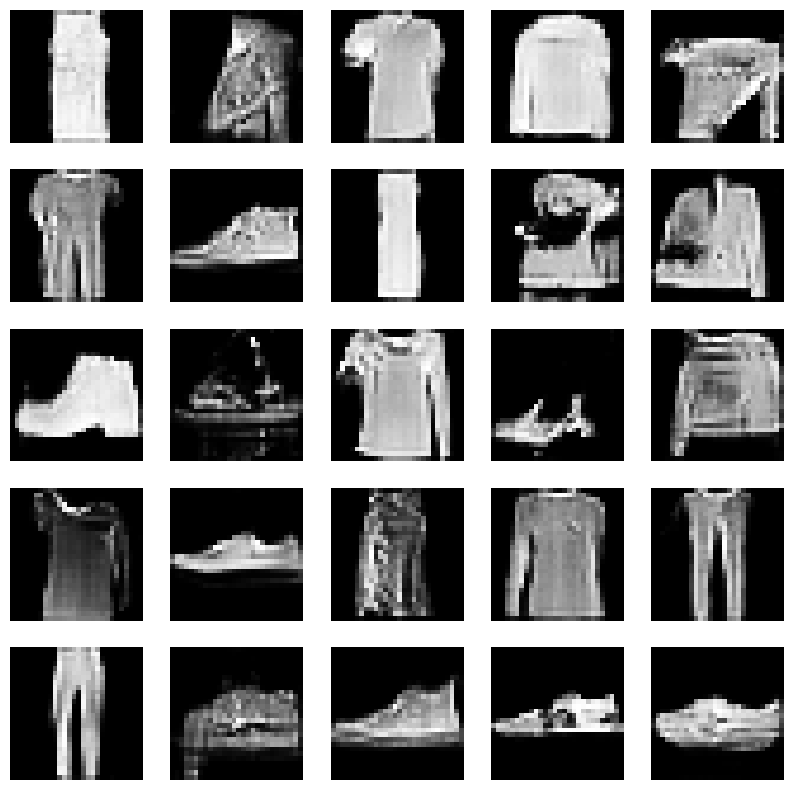

100%|██████████| 1875/1875 [01:58<00:00, 15.81it/s]


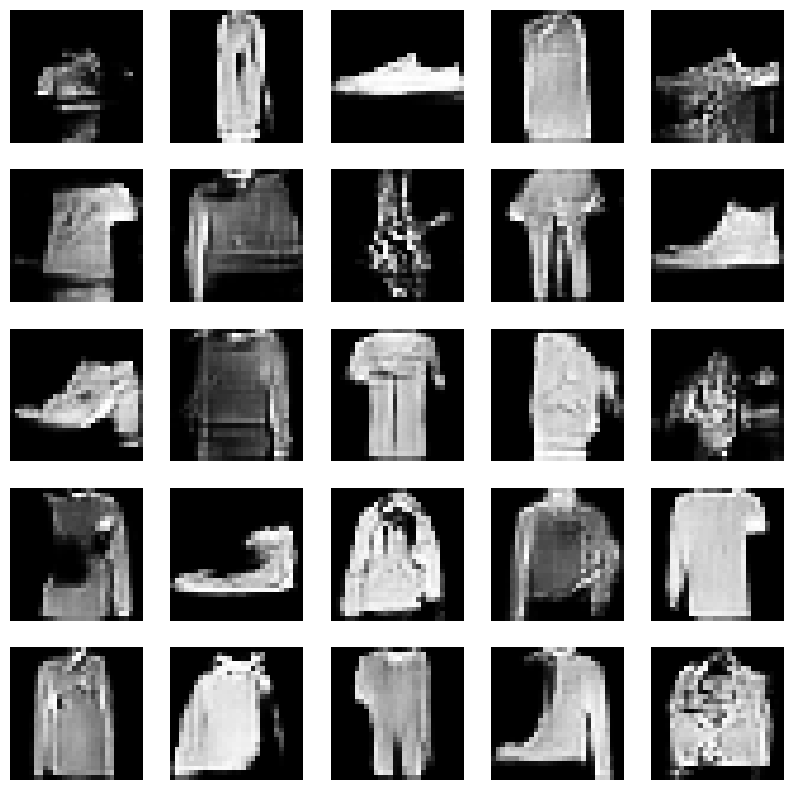

100%|██████████| 1875/1875 [02:00<00:00, 15.53it/s]


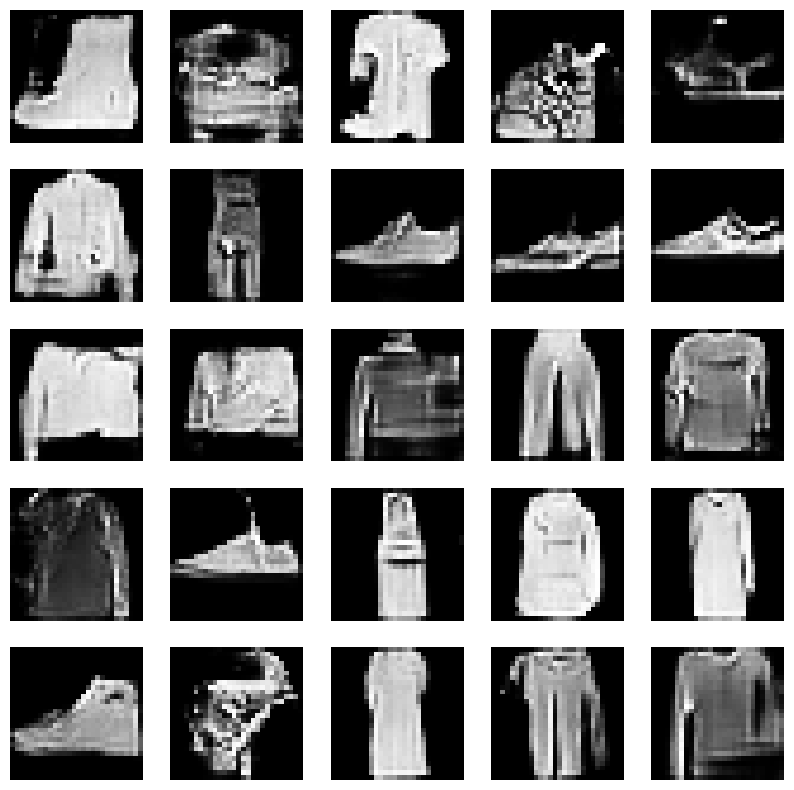

100%|██████████| 1875/1875 [01:58<00:00, 15.83it/s]


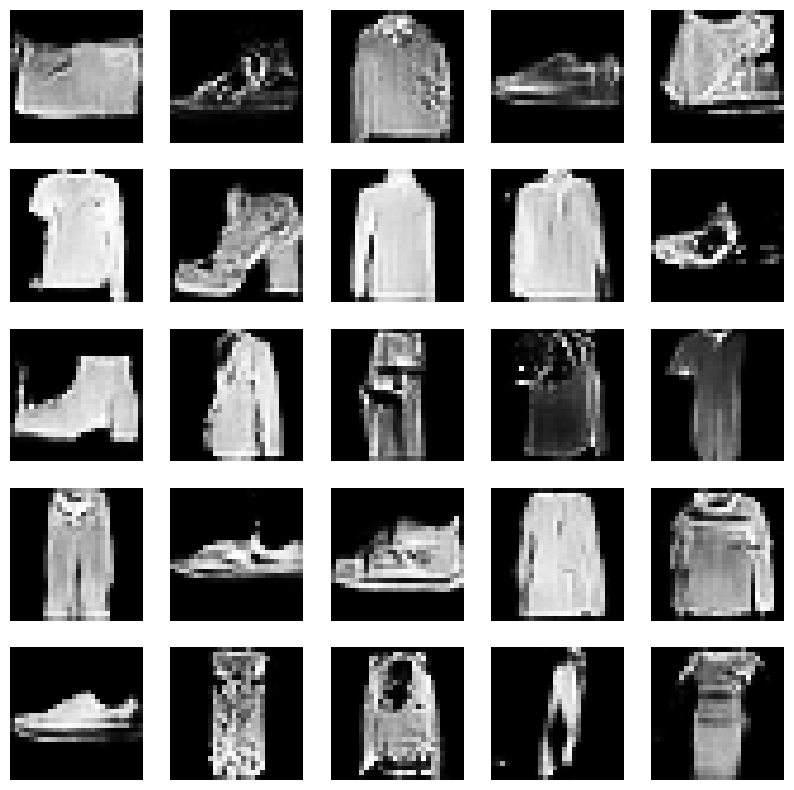

100%|██████████| 1875/1875 [02:00<00:00, 15.62it/s]


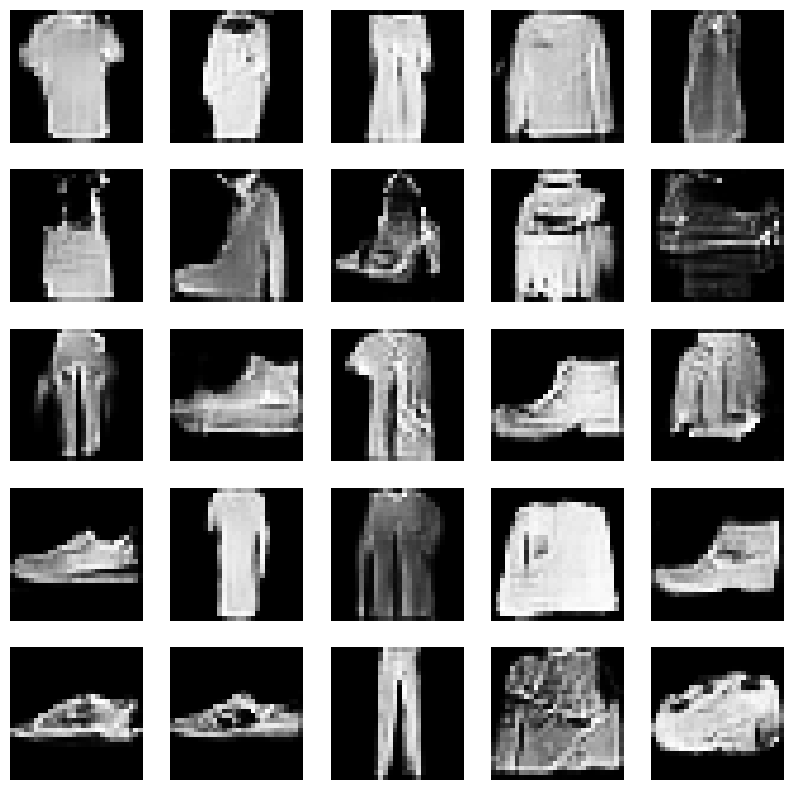

100%|██████████| 1875/1875 [01:58<00:00, 15.79it/s]


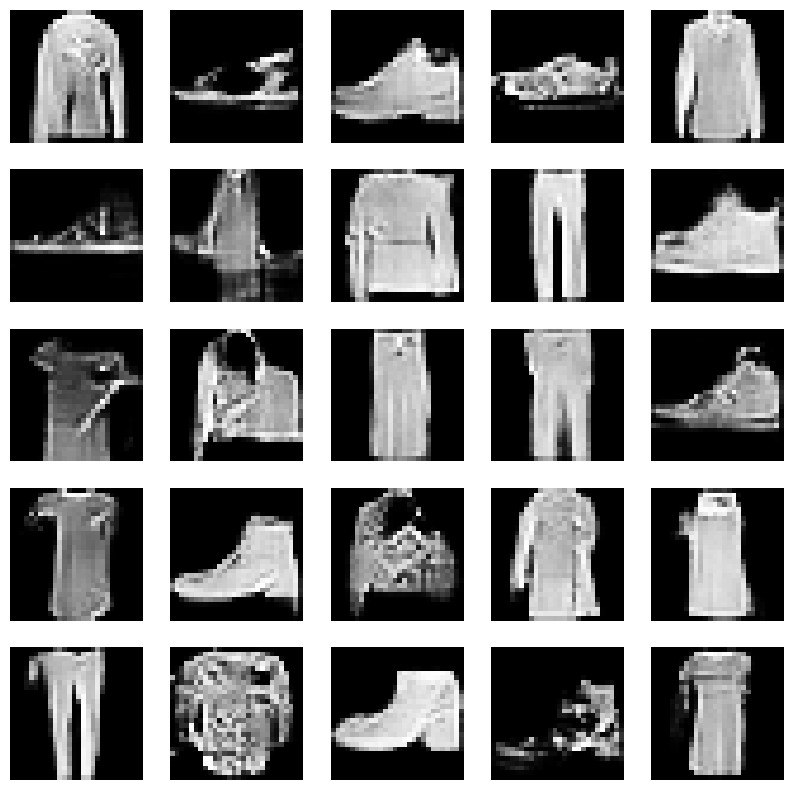

100%|██████████| 1875/1875 [01:59<00:00, 15.64it/s]


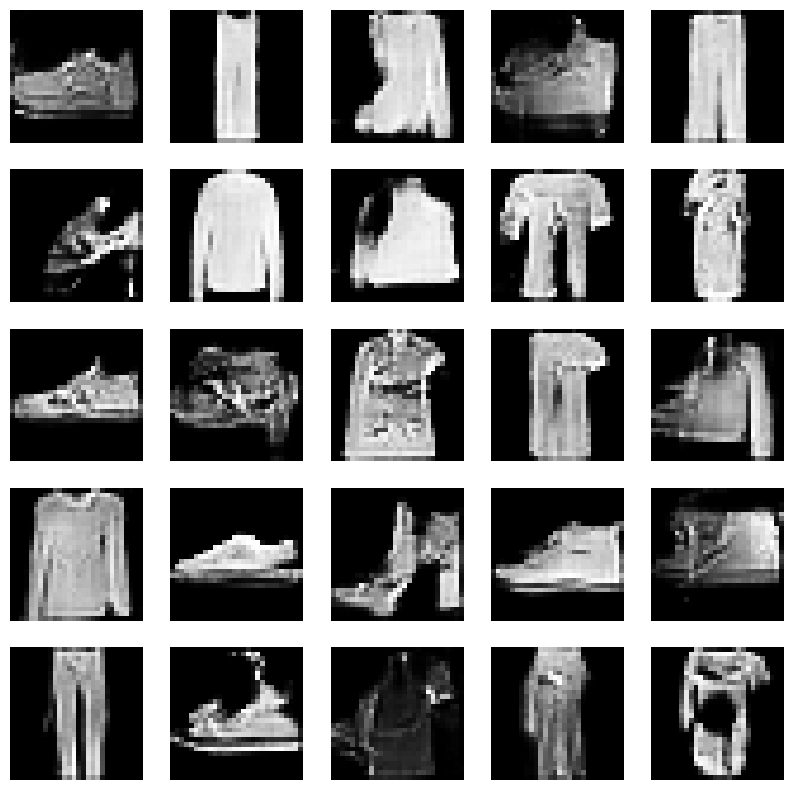

100%|██████████| 1875/1875 [01:57<00:00, 15.91it/s]


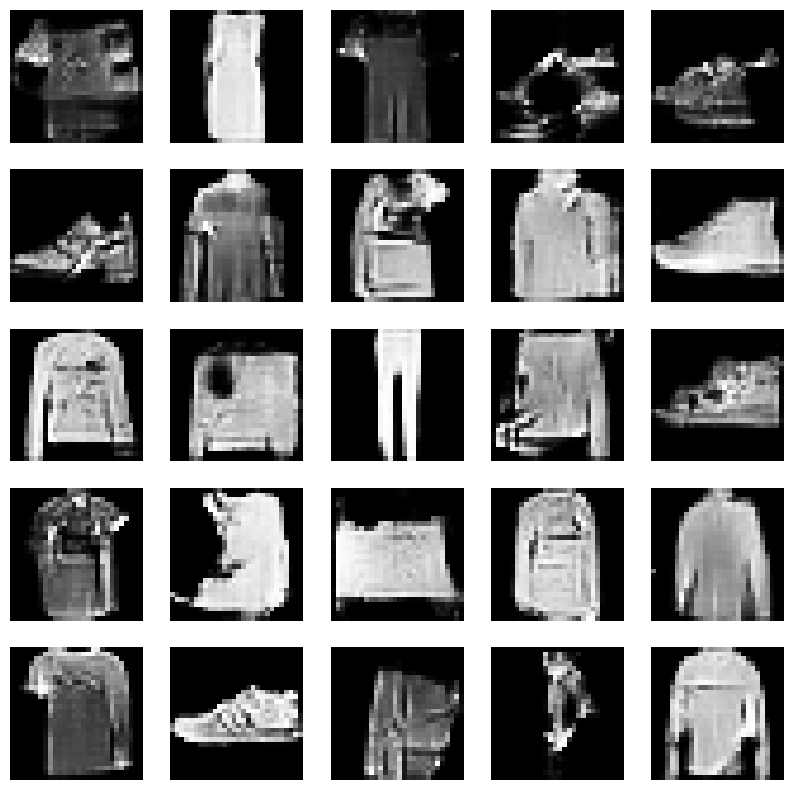

100%|██████████| 1875/1875 [01:59<00:00, 15.69it/s]


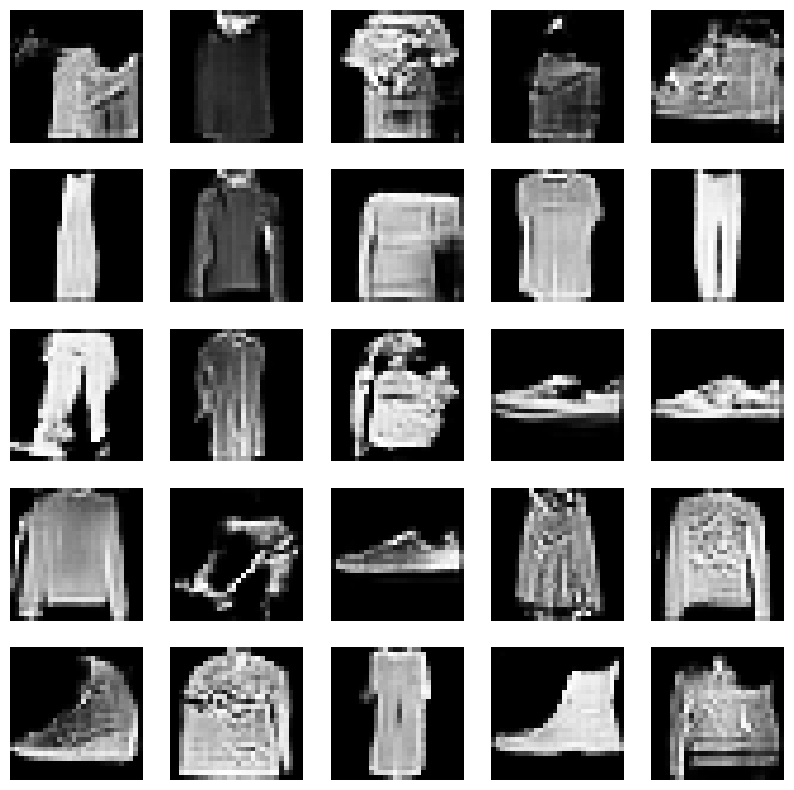

100%|██████████| 1875/1875 [02:00<00:00, 15.60it/s]


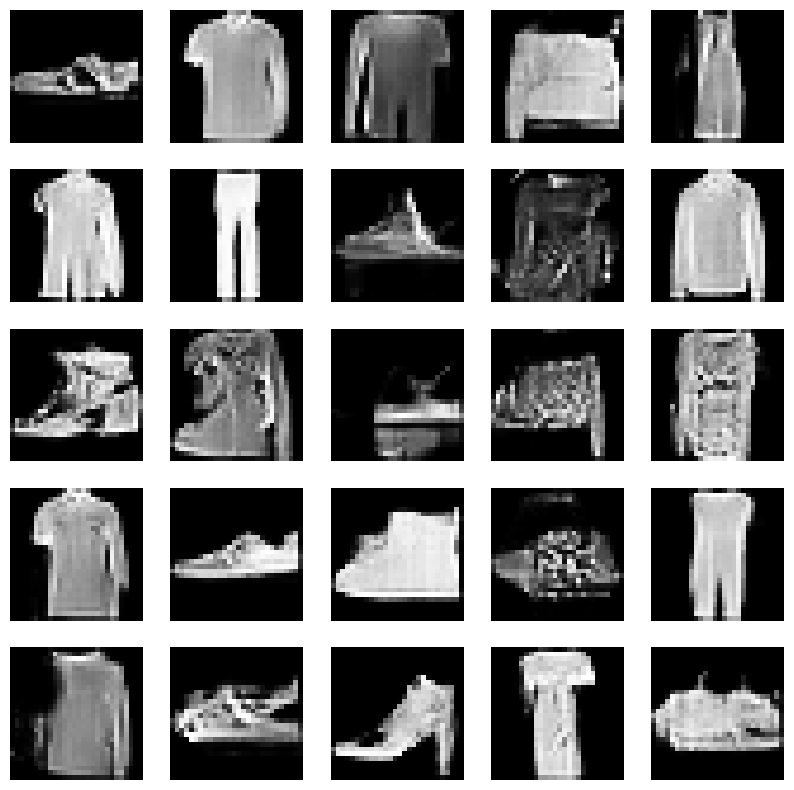

100%|██████████| 1875/1875 [01:59<00:00, 15.70it/s]


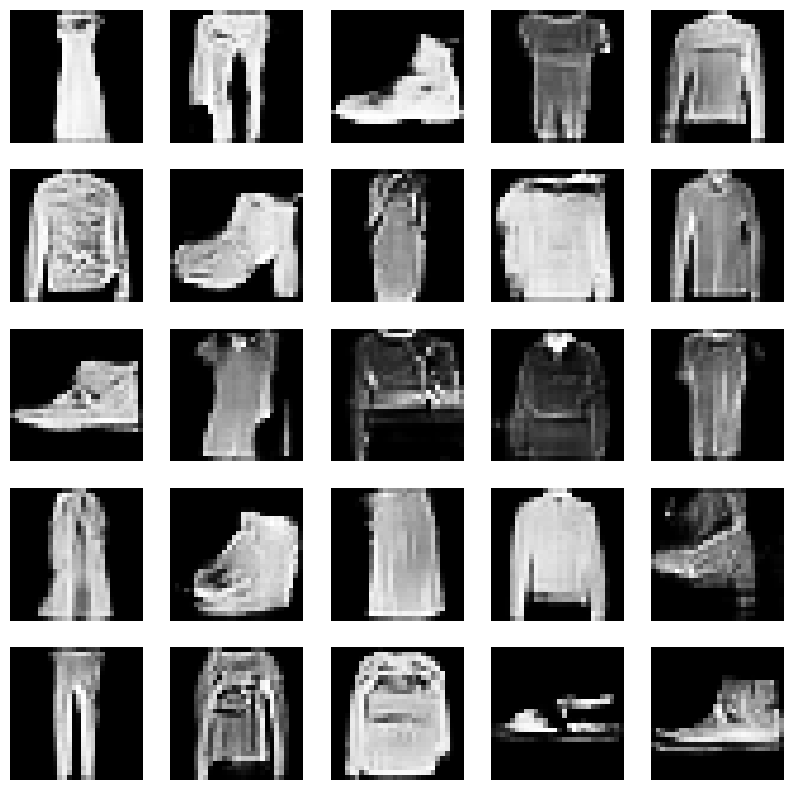

100%|██████████| 1875/1875 [02:01<00:00, 15.43it/s]


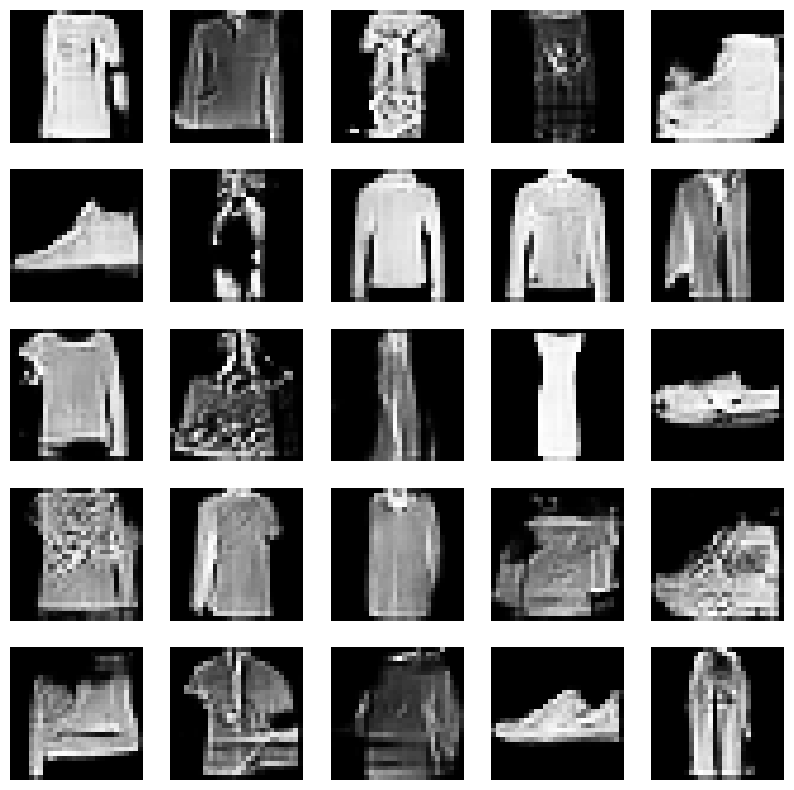

100%|██████████| 1875/1875 [01:59<00:00, 15.66it/s]


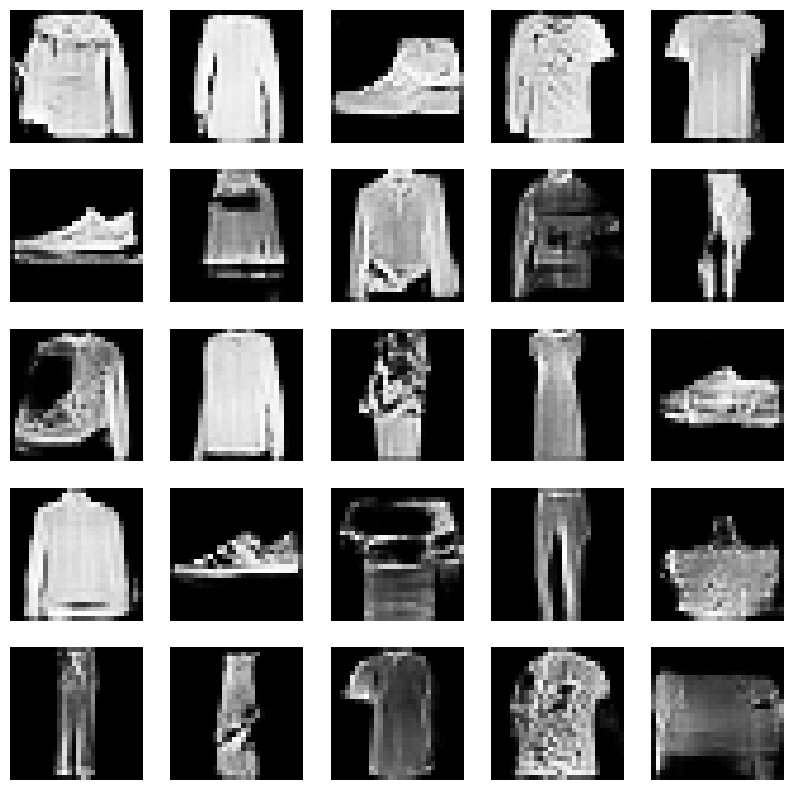

100%|██████████| 1875/1875 [02:01<00:00, 15.48it/s]


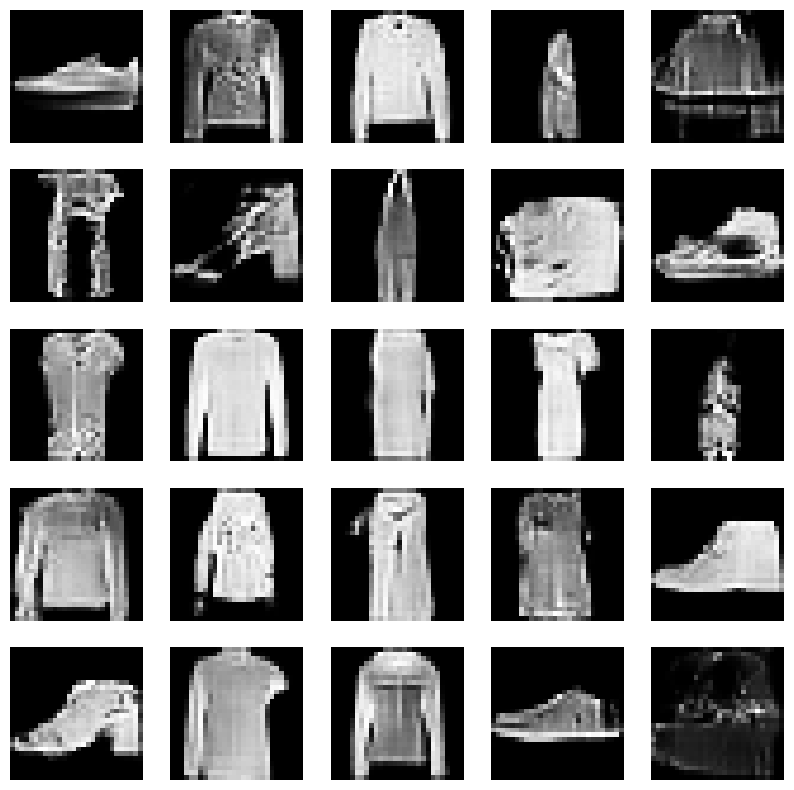

100%|██████████| 1875/1875 [02:04<00:00, 15.04it/s]


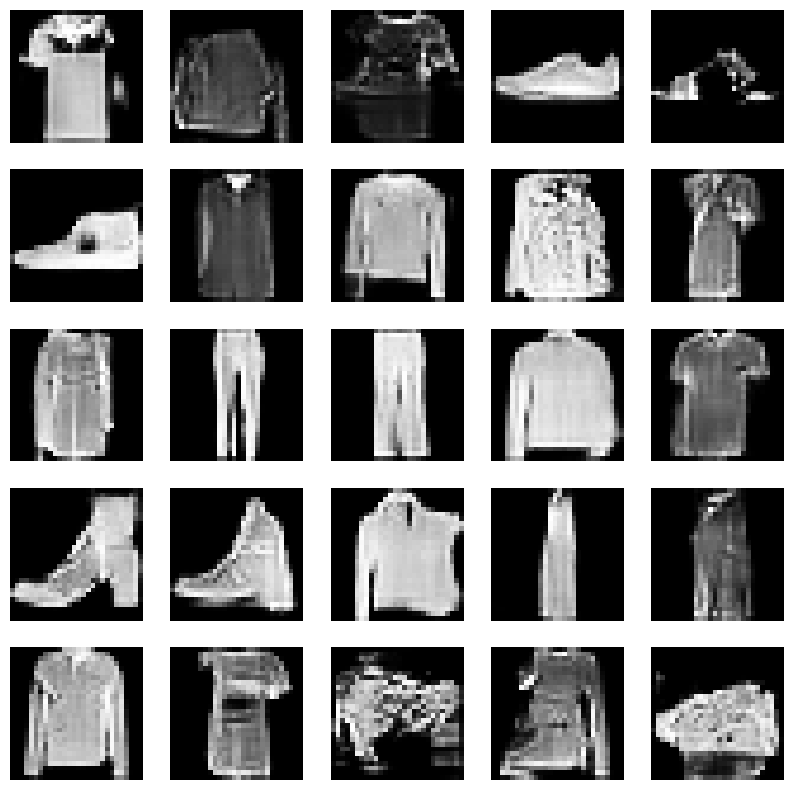

100%|██████████| 1875/1875 [02:04<00:00, 15.11it/s]


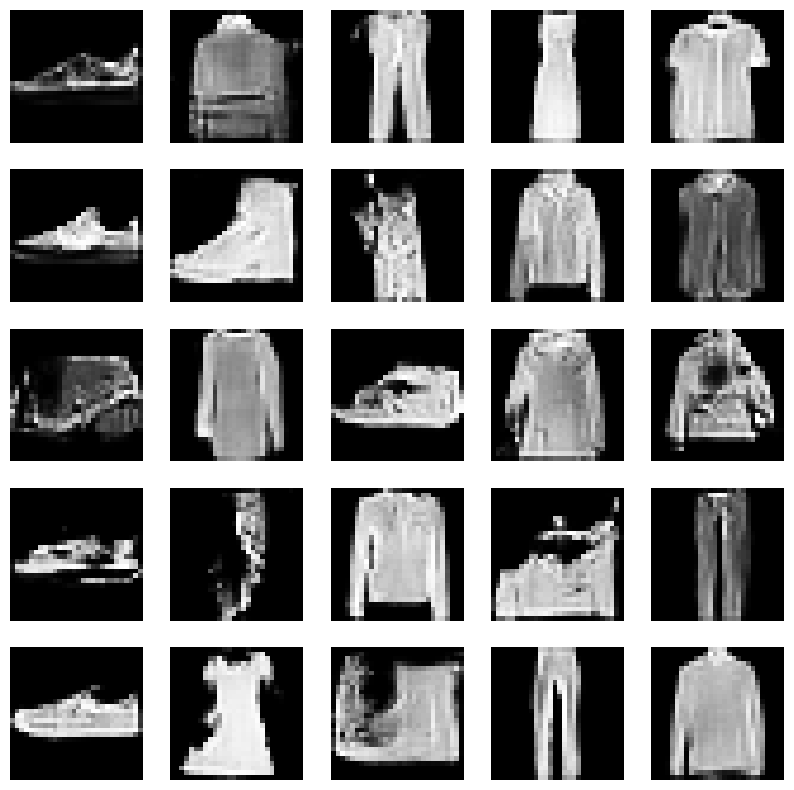

100%|██████████| 1875/1875 [02:03<00:00, 15.13it/s]


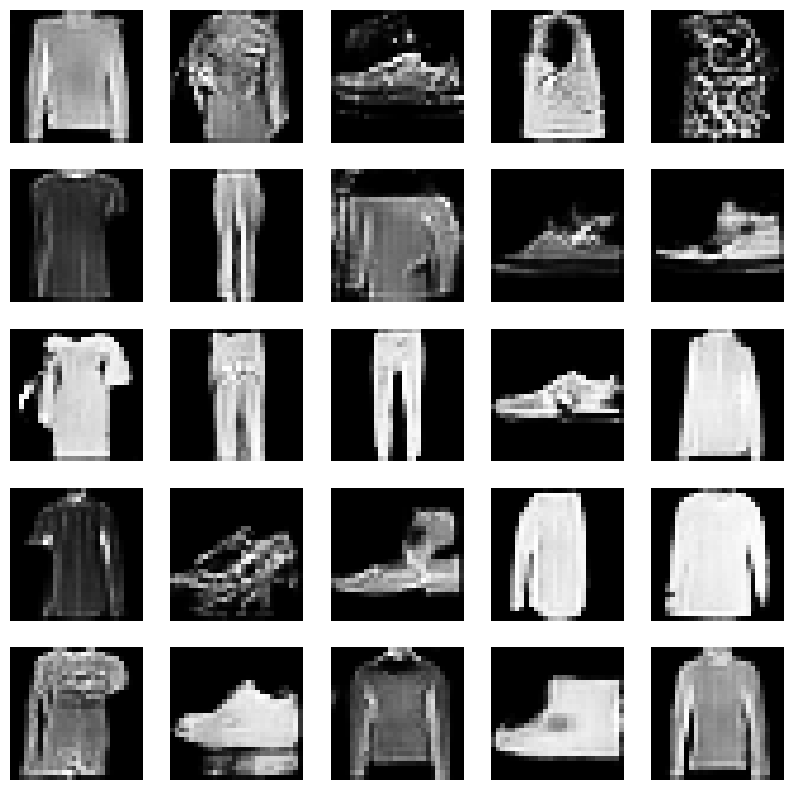

100%|██████████| 1875/1875 [02:03<00:00, 15.13it/s]


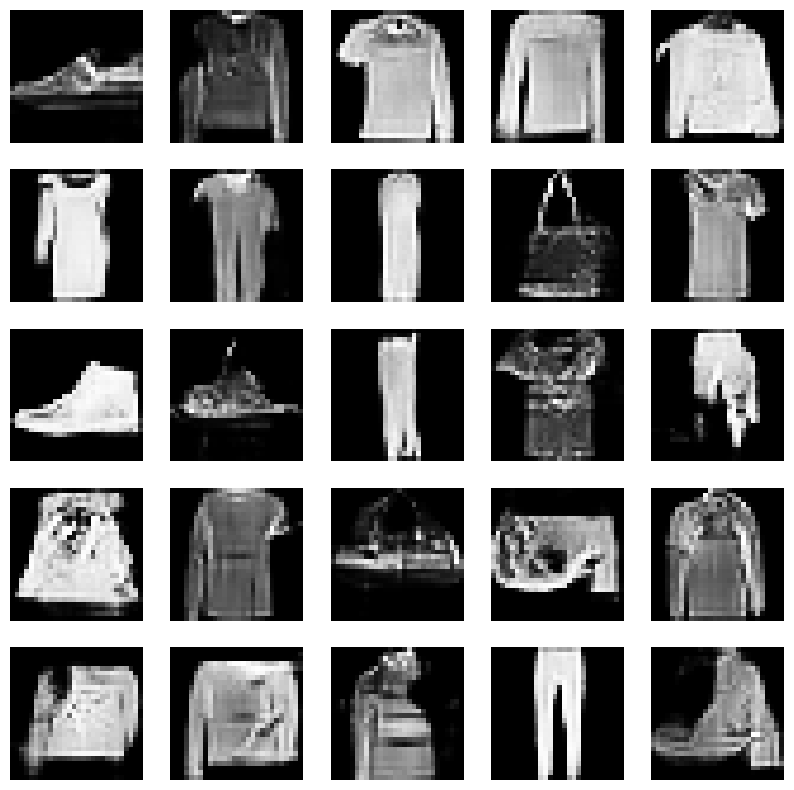

100%|██████████| 1875/1875 [02:06<00:00, 14.86it/s]


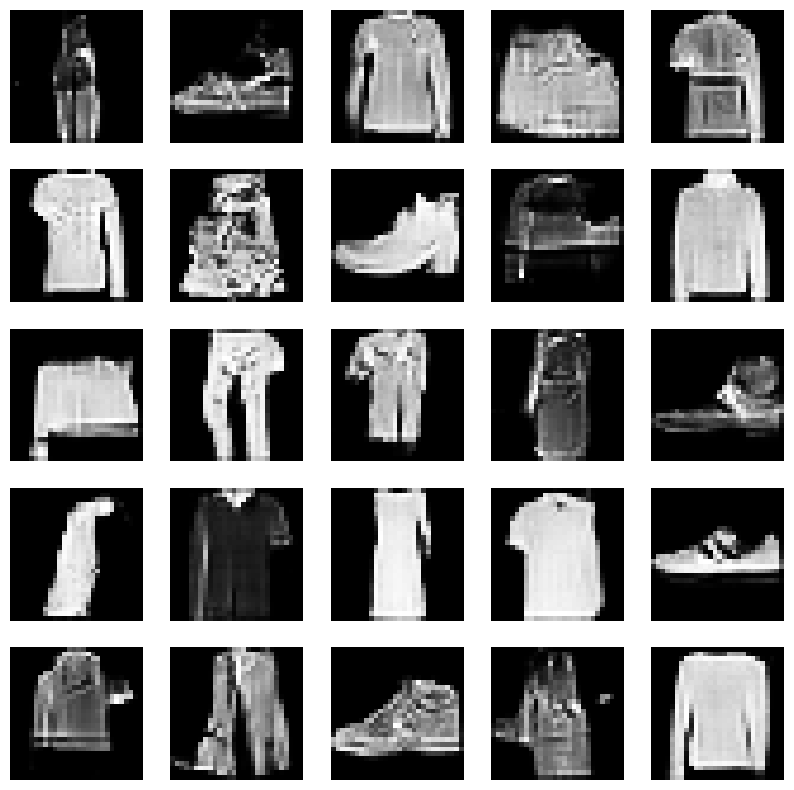

100%|██████████| 1875/1875 [02:03<00:00, 15.15it/s]


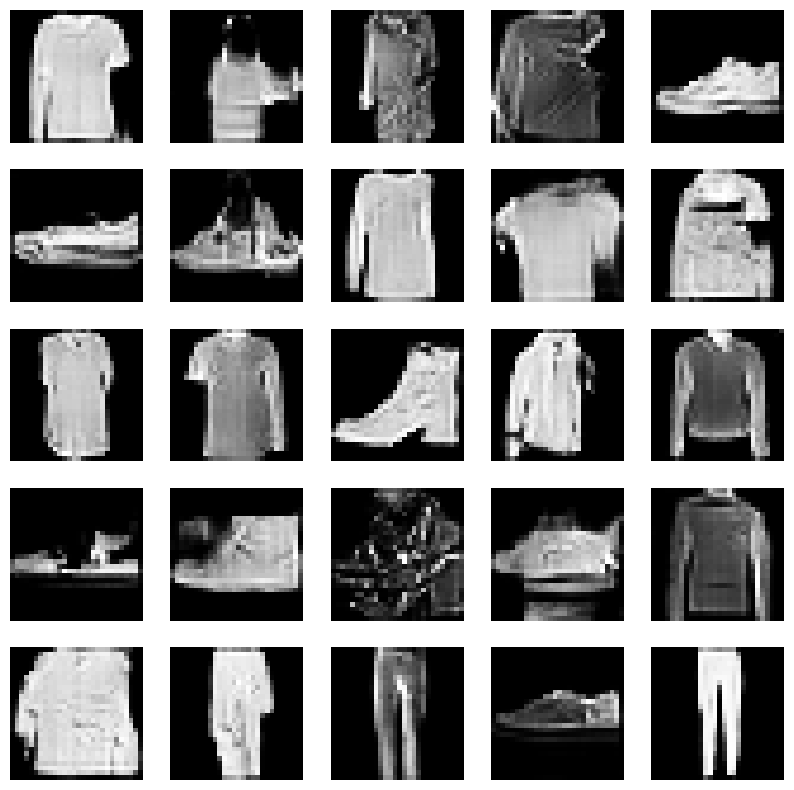

100%|██████████| 1875/1875 [02:04<00:00, 15.11it/s]


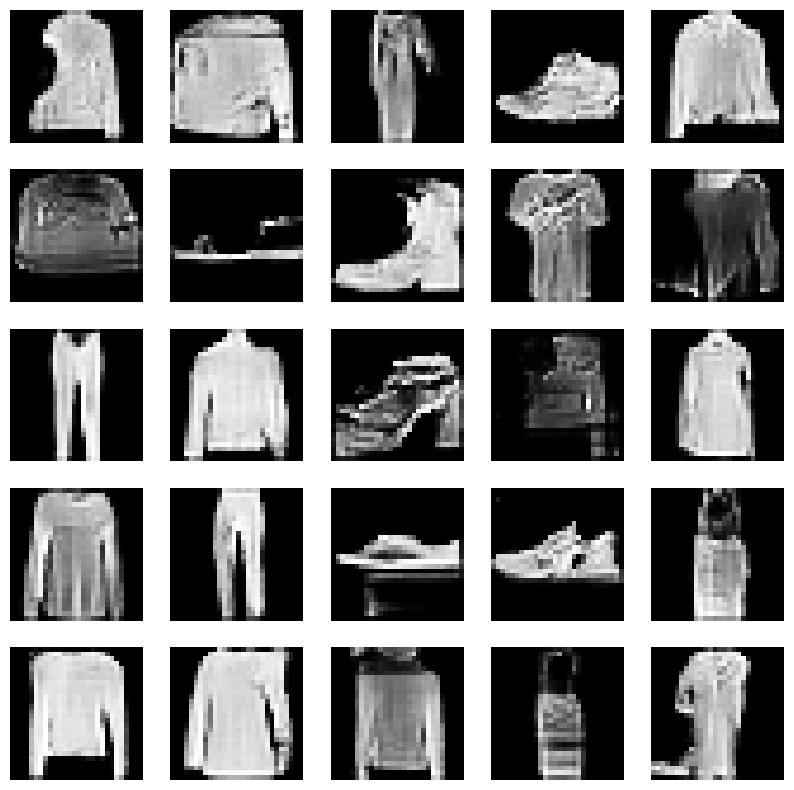

100%|██████████| 1875/1875 [02:04<00:00, 15.04it/s]


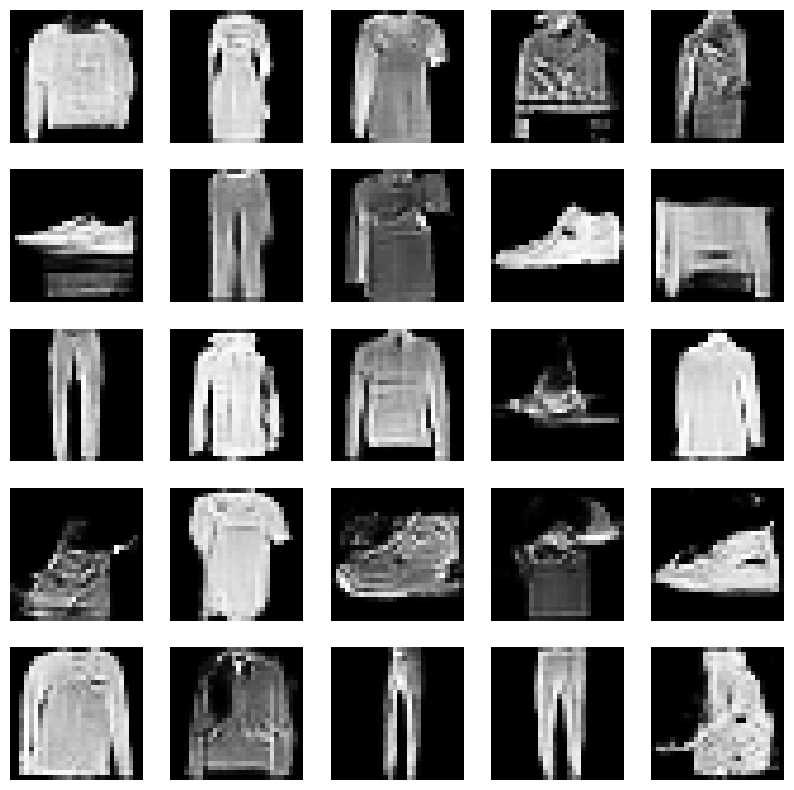

100%|██████████| 1875/1875 [02:04<00:00, 15.03it/s]


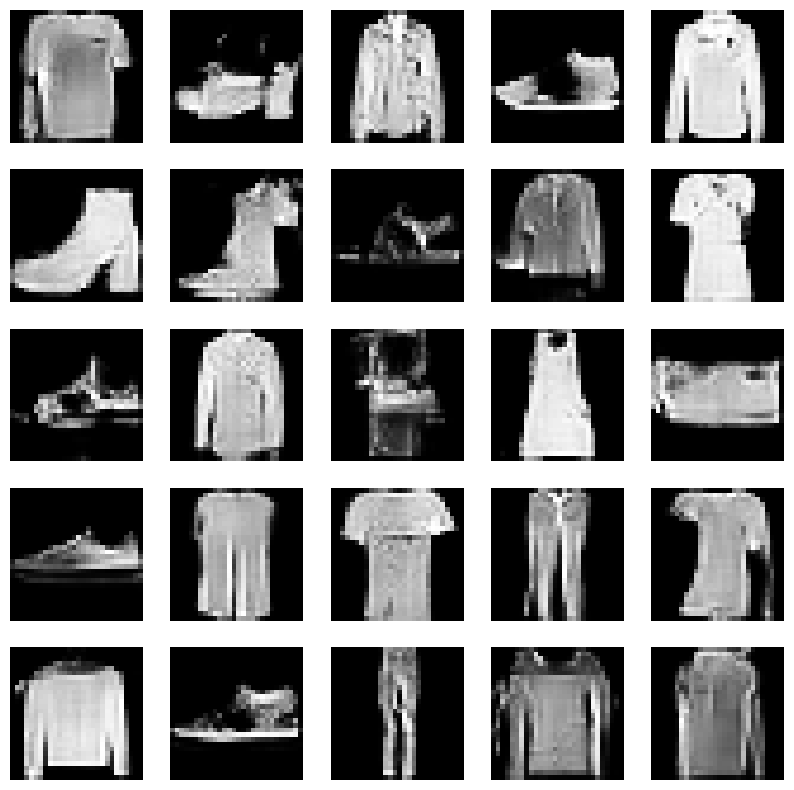

100%|██████████| 1875/1875 [02:04<00:00, 15.04it/s]


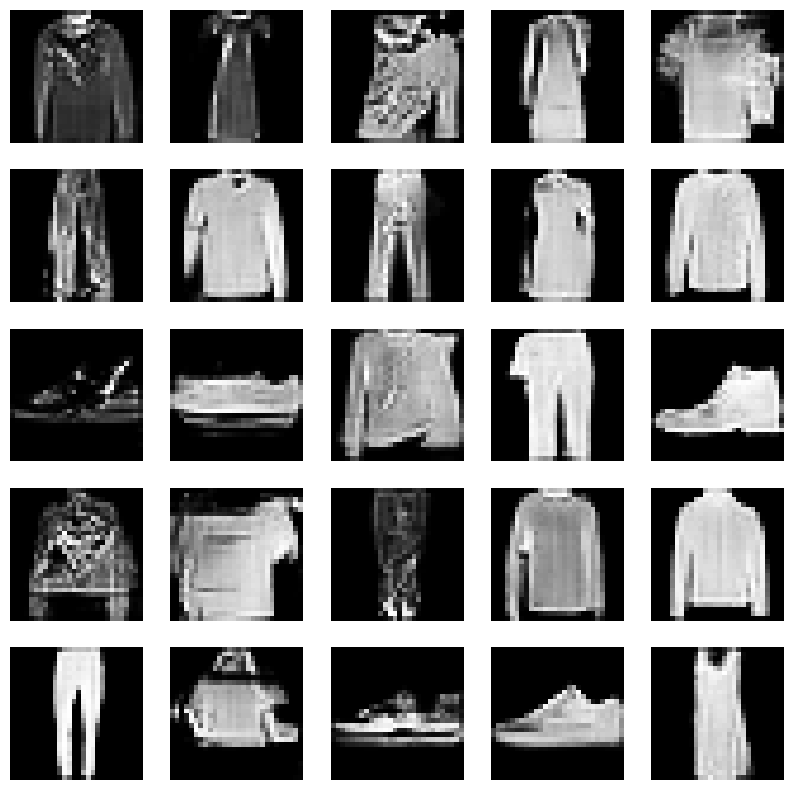

100%|██████████| 1875/1875 [02:05<00:00, 14.92it/s]


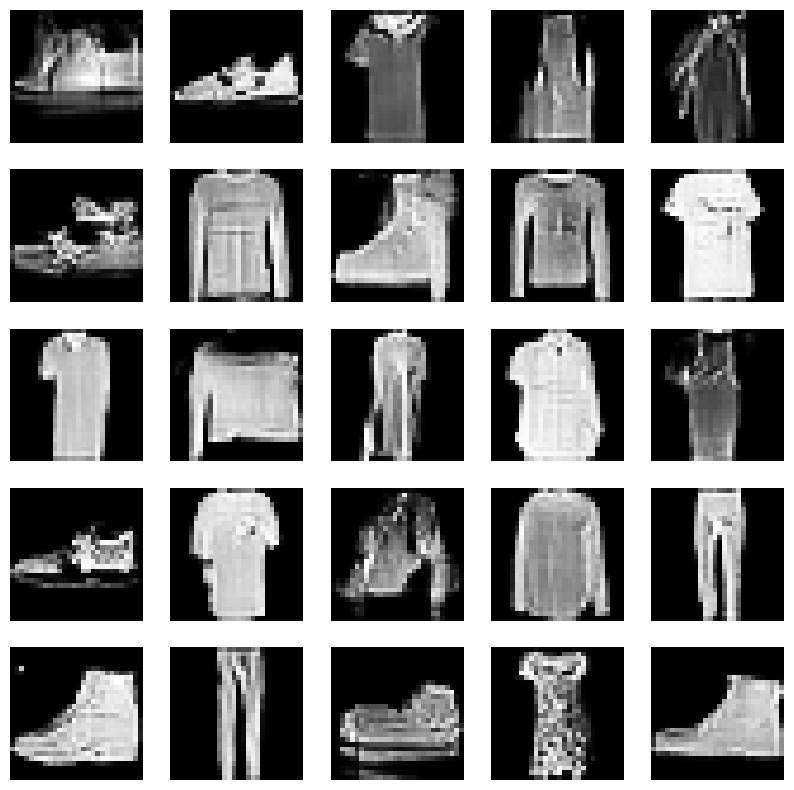

100%|██████████| 1875/1875 [02:06<00:00, 14.78it/s]


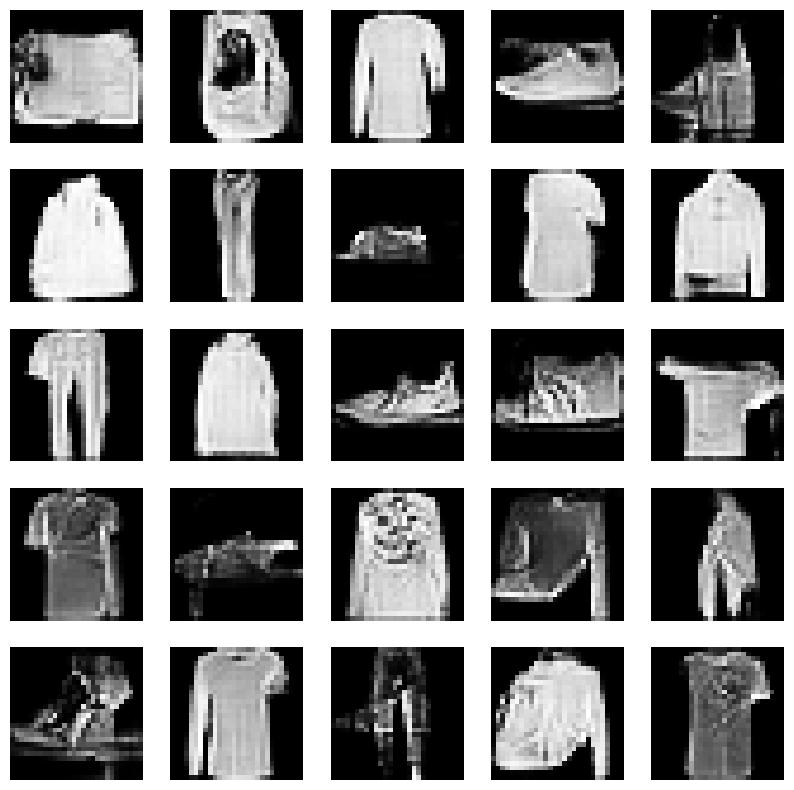

100%|██████████| 1875/1875 [02:06<00:00, 14.85it/s]


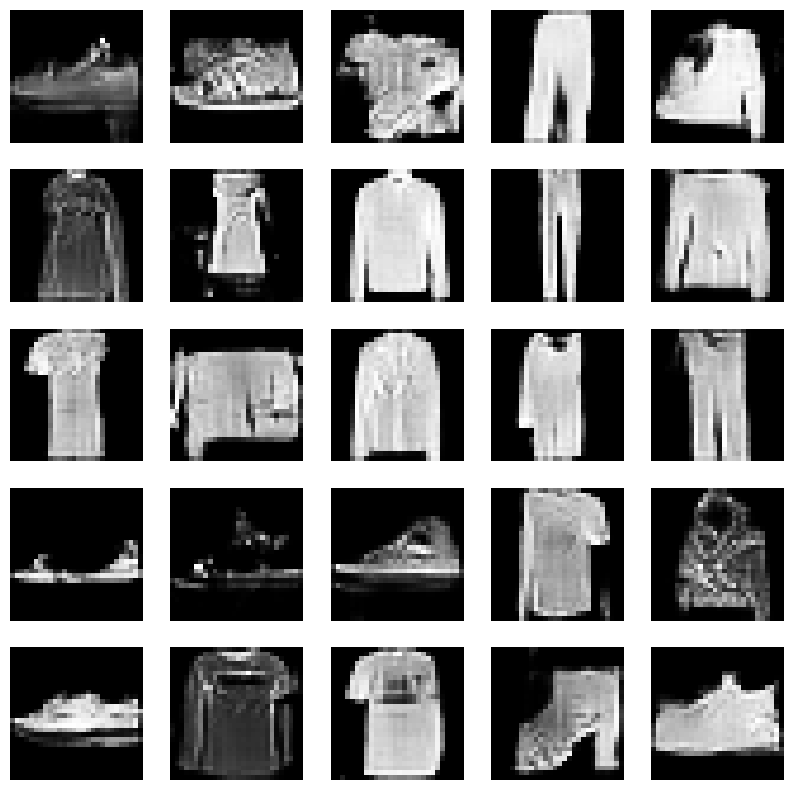

100%|██████████| 1875/1875 [02:07<00:00, 14.76it/s]


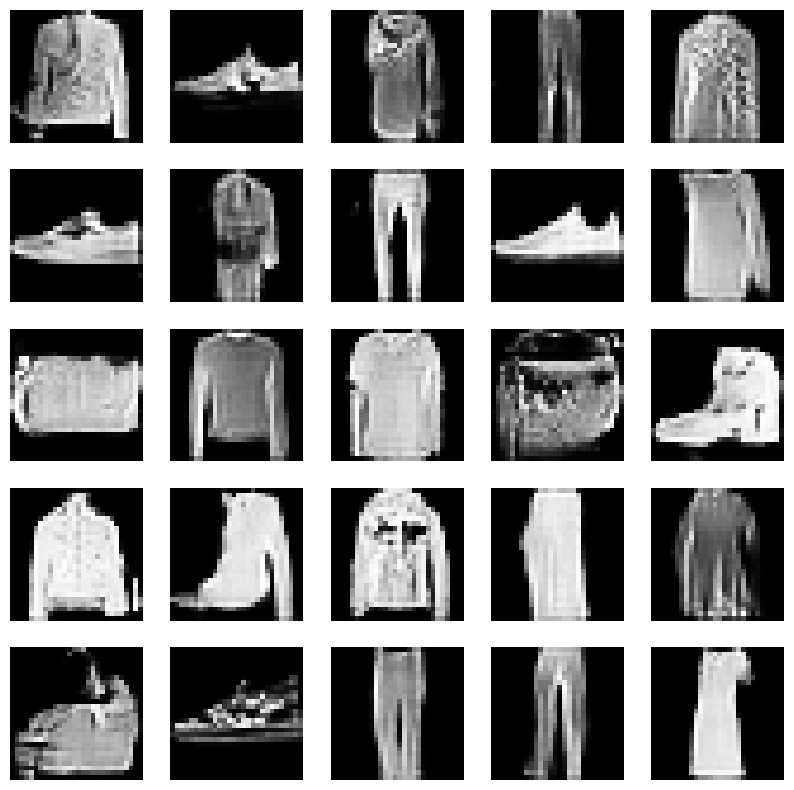

100%|██████████| 1875/1875 [02:15<00:00, 13.84it/s]


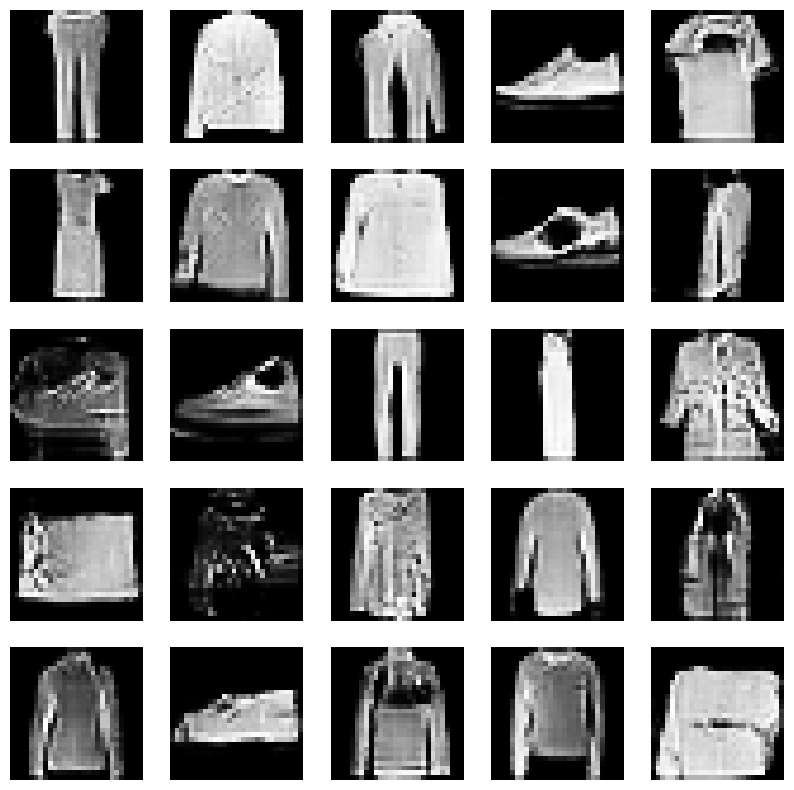

100%|██████████| 1875/1875 [02:14<00:00, 13.97it/s]


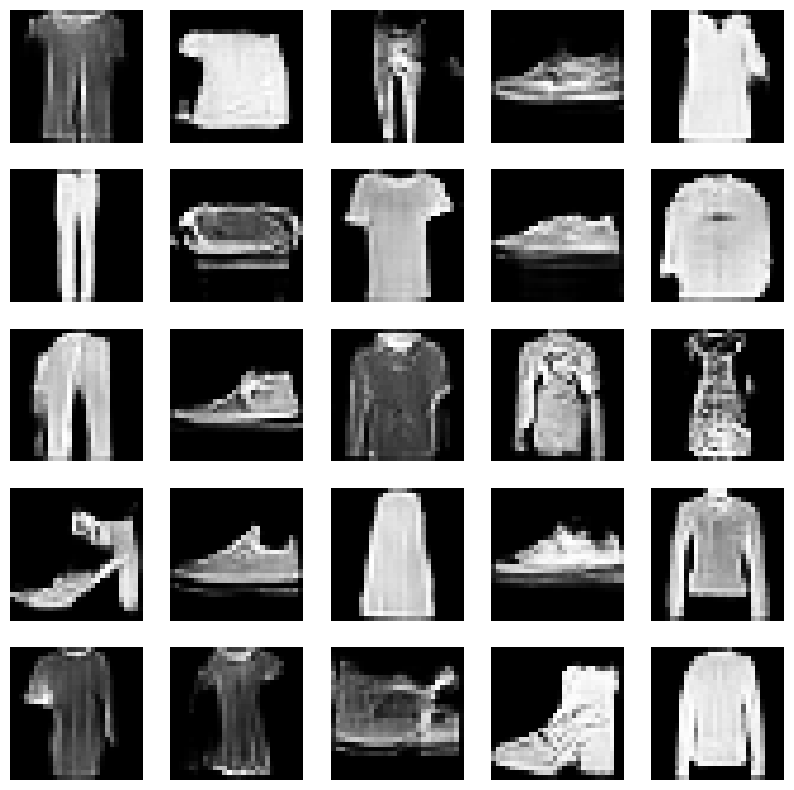

100%|██████████| 1875/1875 [02:13<00:00, 14.00it/s]


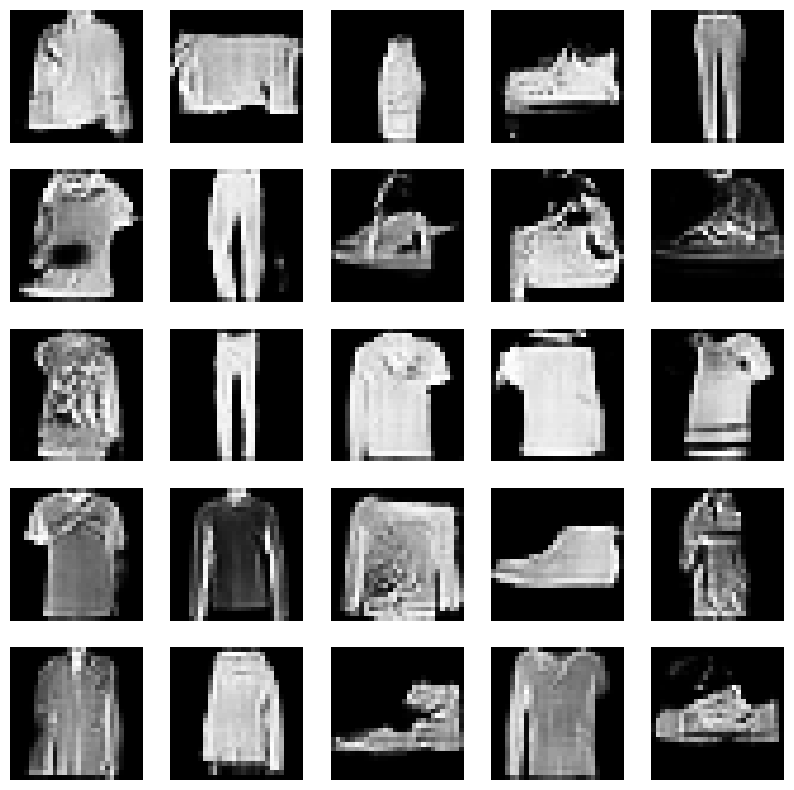

100%|██████████| 1875/1875 [02:07<00:00, 14.75it/s]


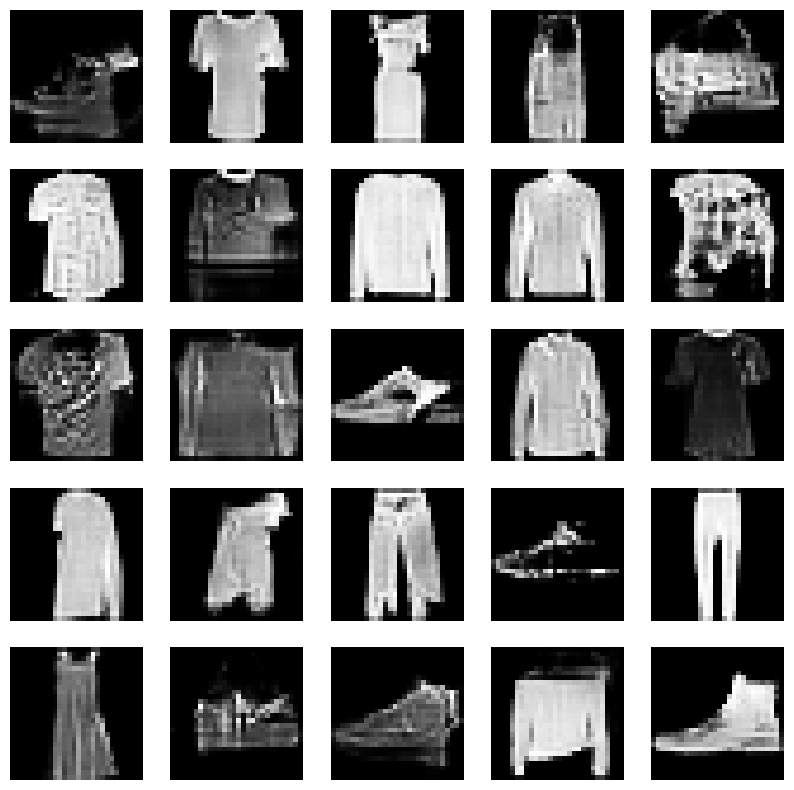

100%|██████████| 1875/1875 [02:06<00:00, 14.79it/s]


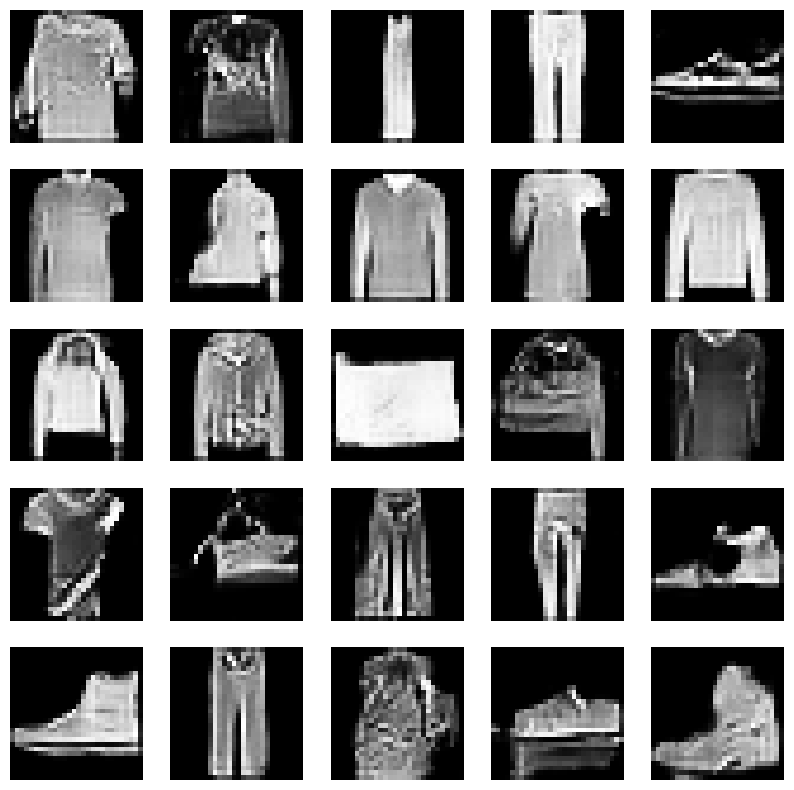

100%|██████████| 1875/1875 [02:05<00:00, 14.93it/s]


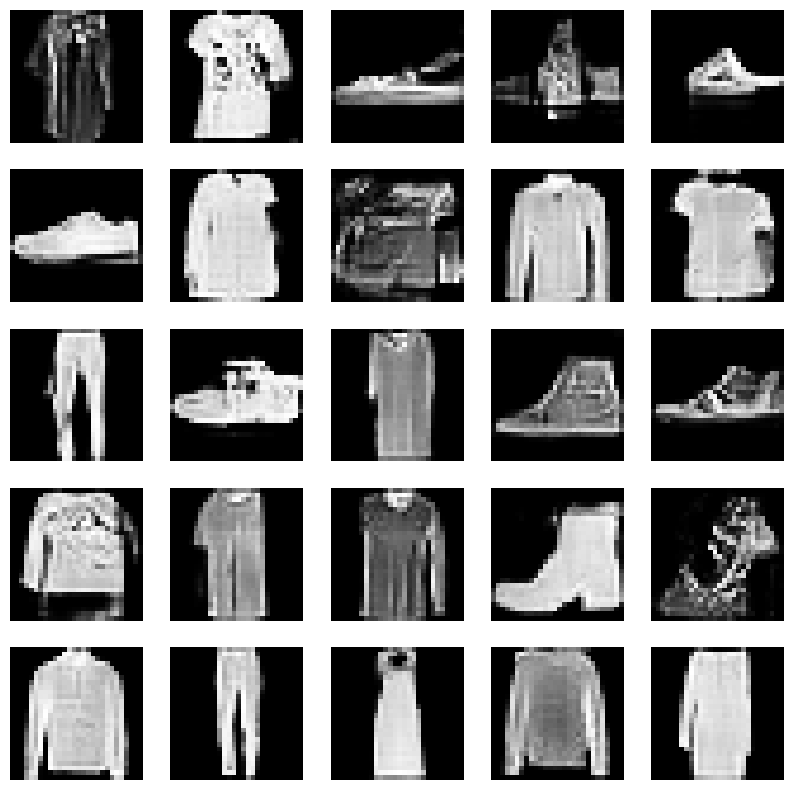

100%|██████████| 1875/1875 [02:04<00:00, 15.01it/s]


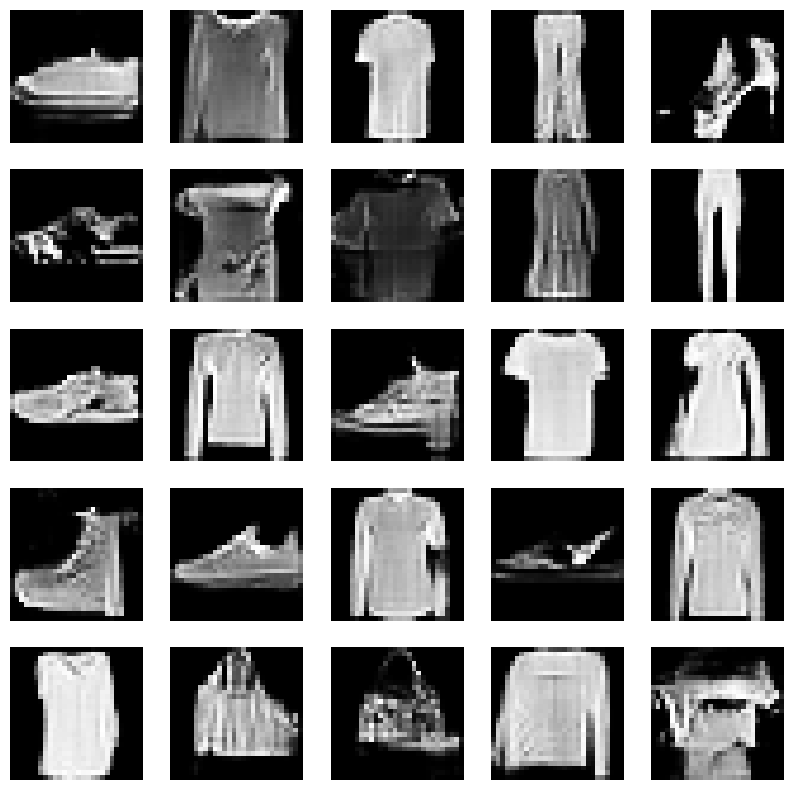

100%|██████████| 1875/1875 [02:03<00:00, 15.14it/s]


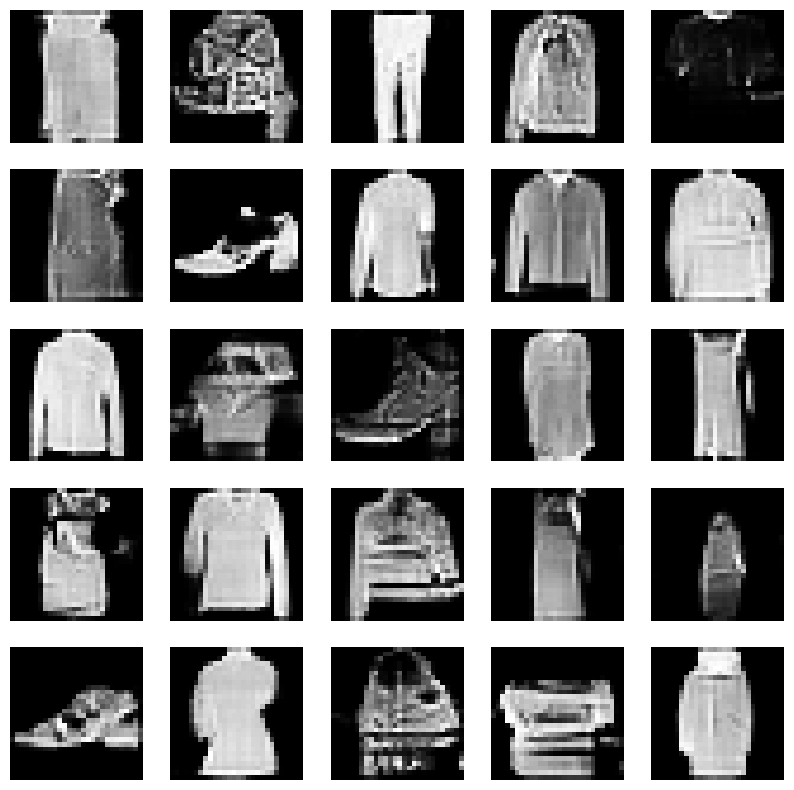

100%|██████████| 1875/1875 [02:06<00:00, 14.78it/s]


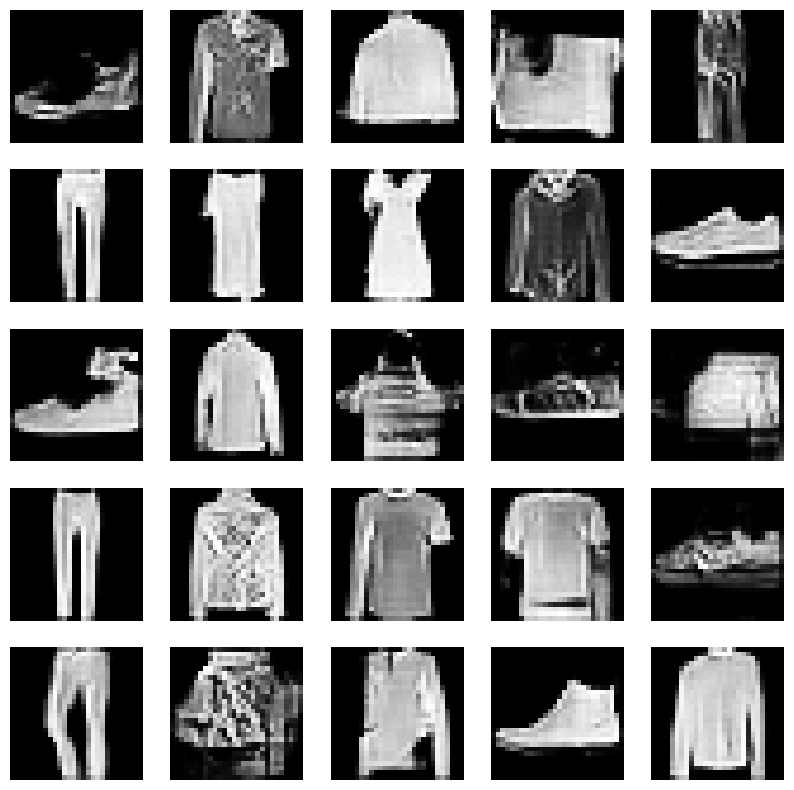

100%|██████████| 1875/1875 [02:05<00:00, 14.94it/s]


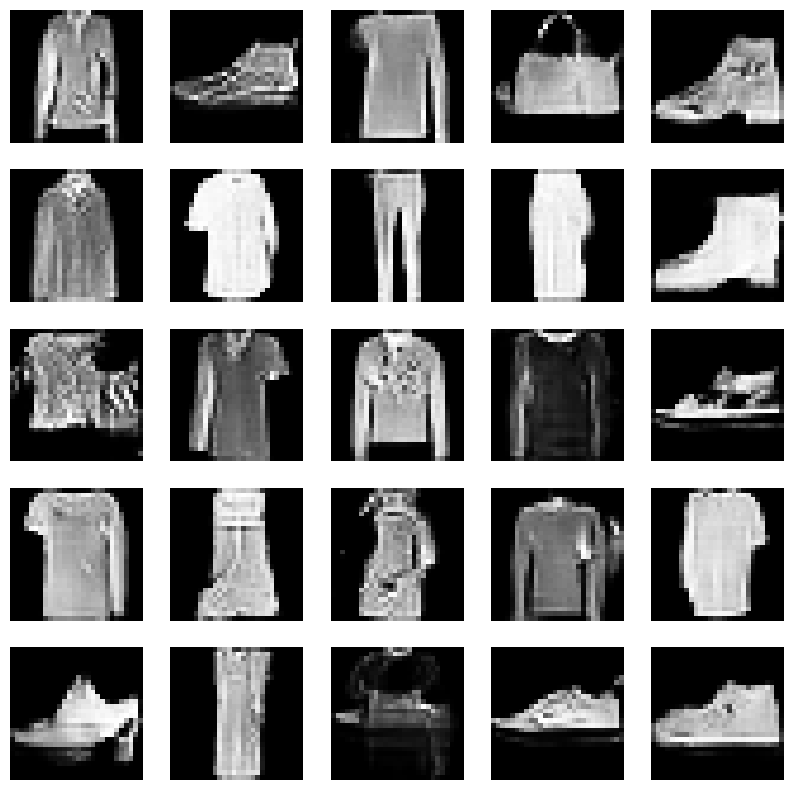

100%|██████████| 1875/1875 [02:06<00:00, 14.81it/s]


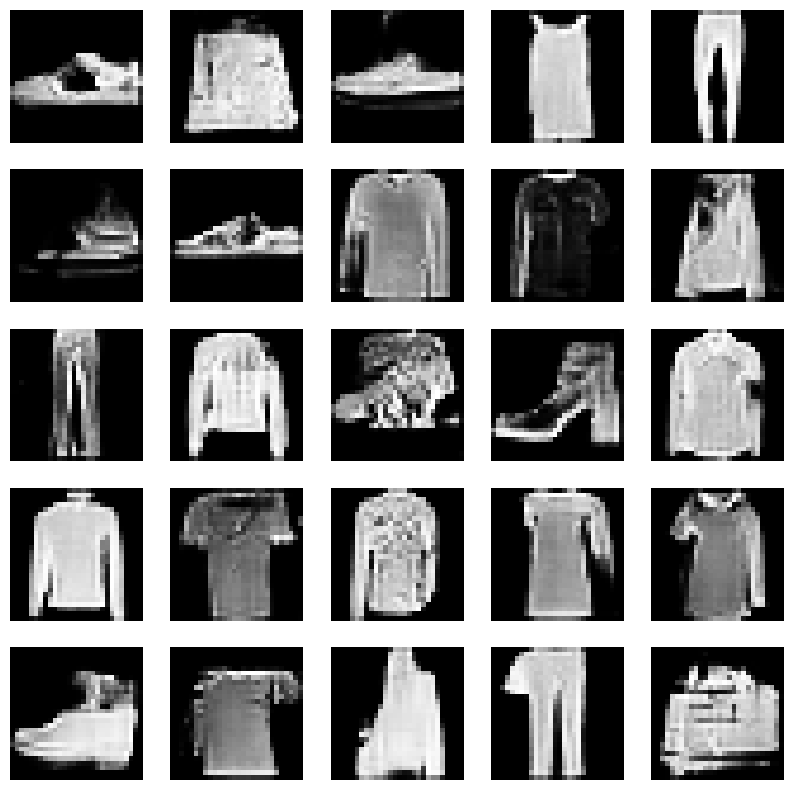

100%|██████████| 1875/1875 [02:08<00:00, 14.62it/s]


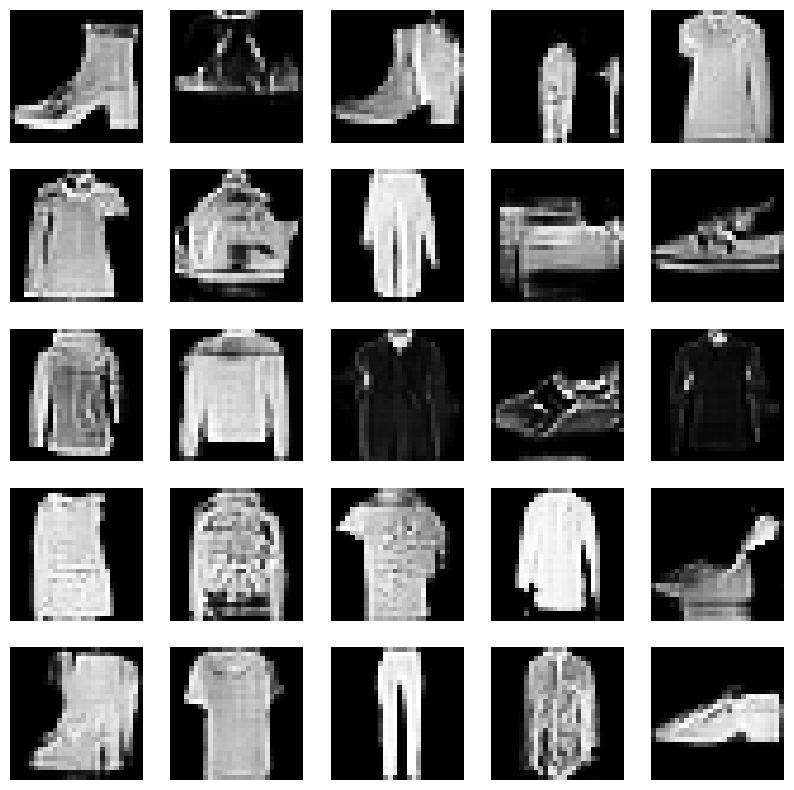

100%|██████████| 1875/1875 [02:07<00:00, 14.75it/s]


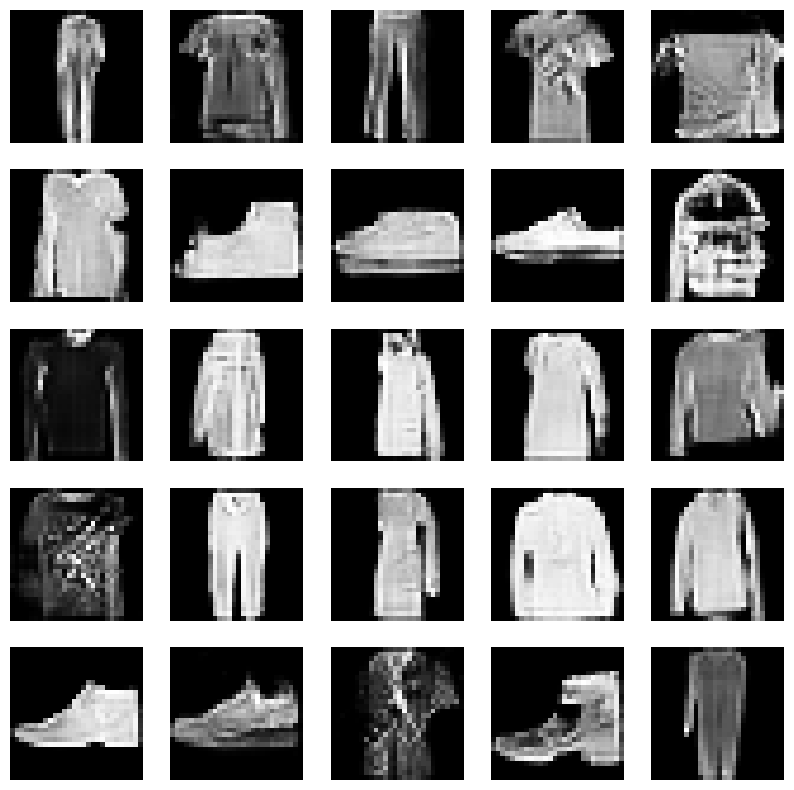

100%|██████████| 1875/1875 [02:05<00:00, 14.88it/s]


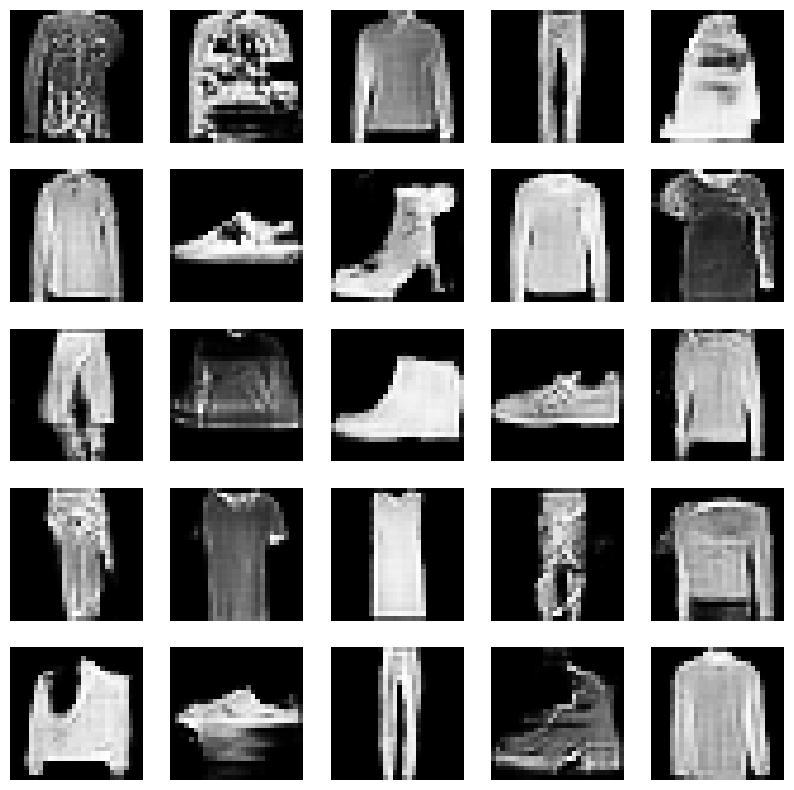

100%|██████████| 1875/1875 [02:04<00:00, 15.06it/s]


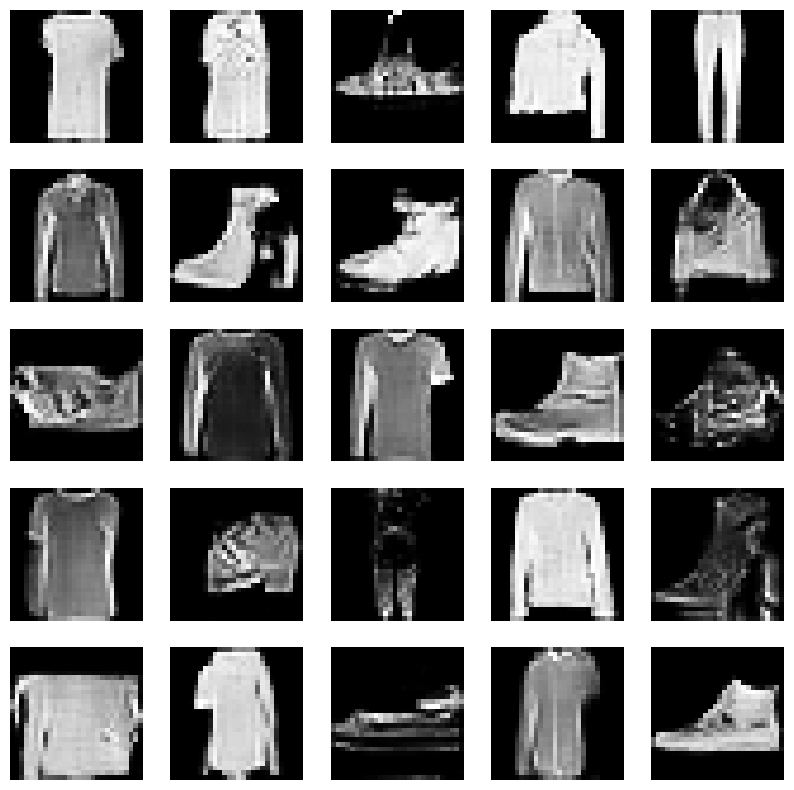

100%|██████████| 1875/1875 [02:06<00:00, 14.86it/s]


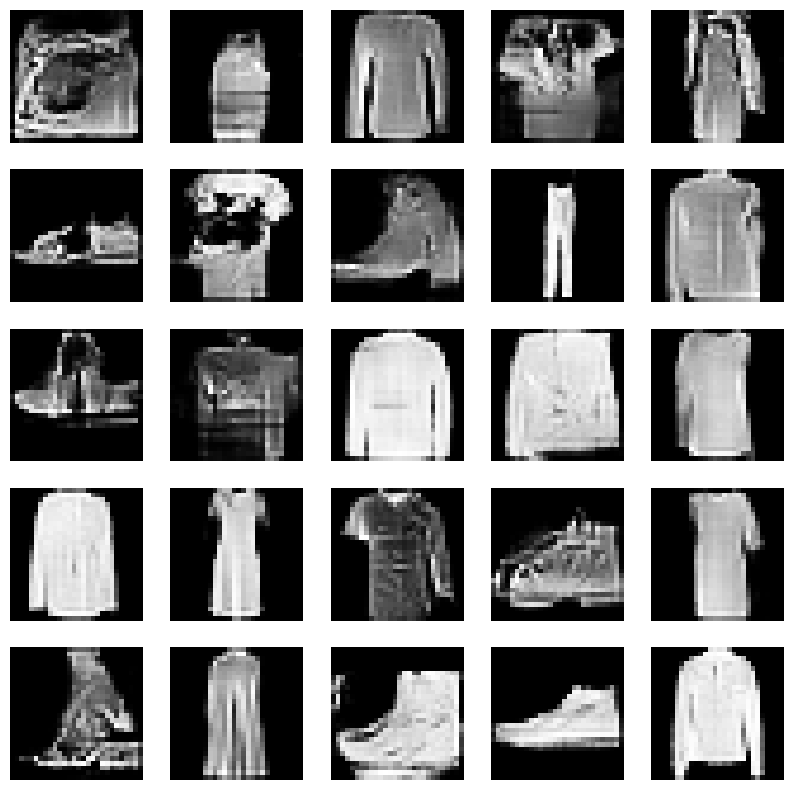

100%|██████████| 1875/1875 [02:05<00:00, 15.00it/s]


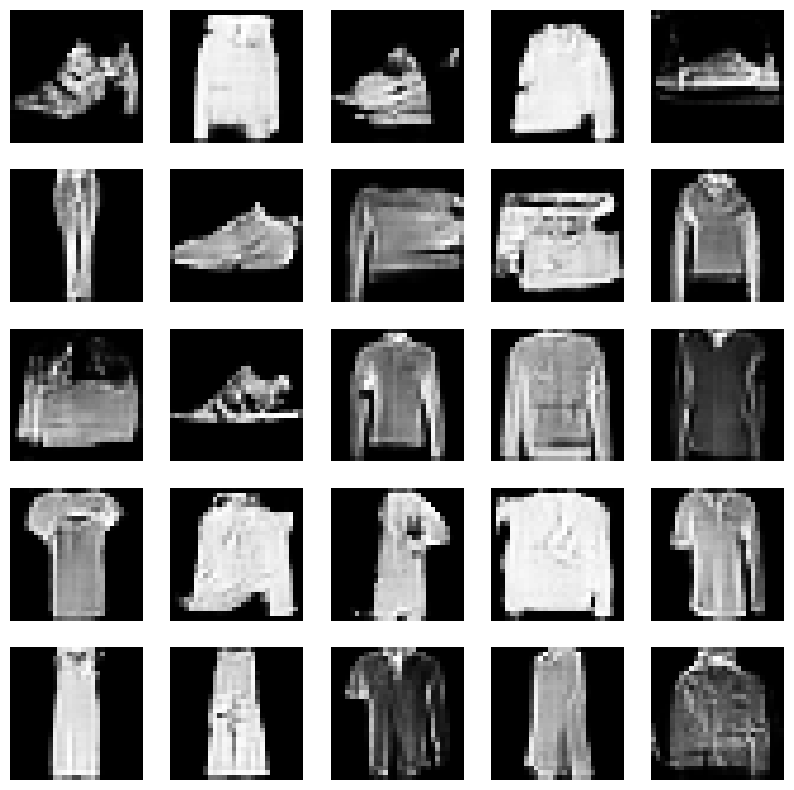

100%|██████████| 1875/1875 [02:04<00:00, 15.03it/s]


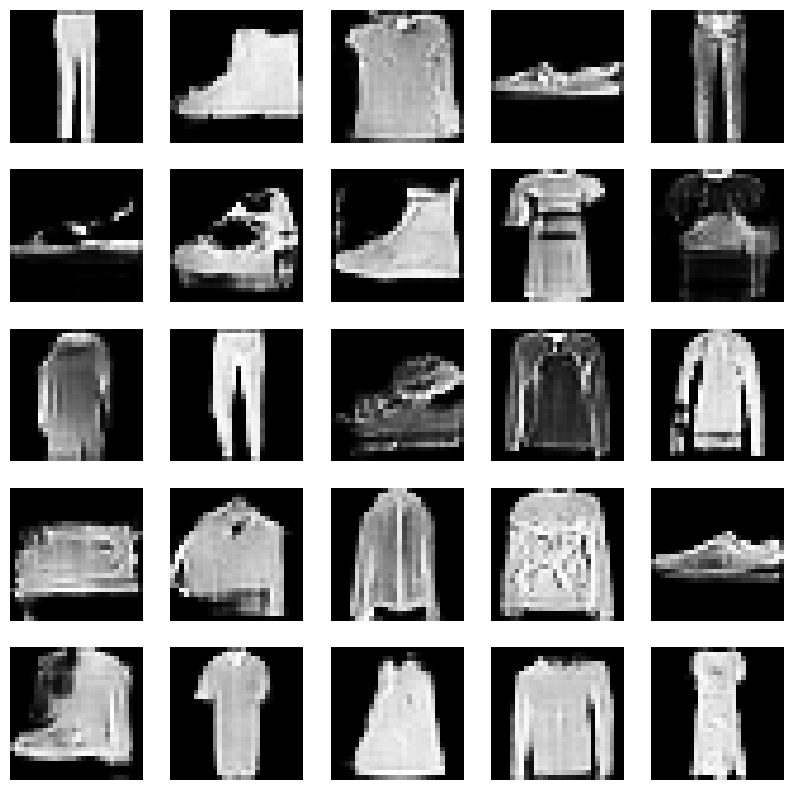

100%|██████████| 1875/1875 [02:01<00:00, 15.41it/s]


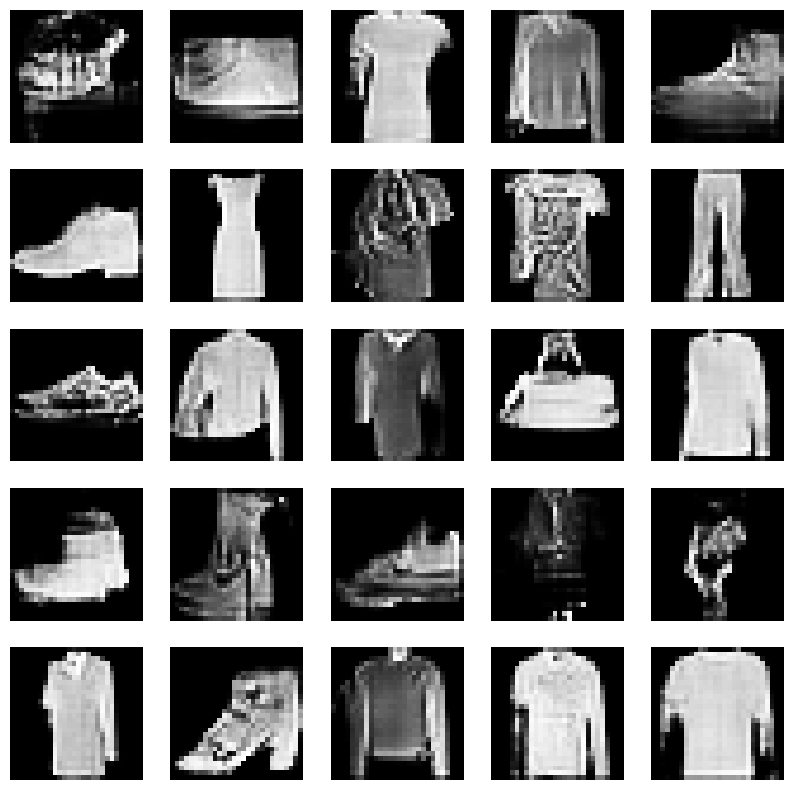

100%|██████████| 1875/1875 [02:02<00:00, 15.35it/s]


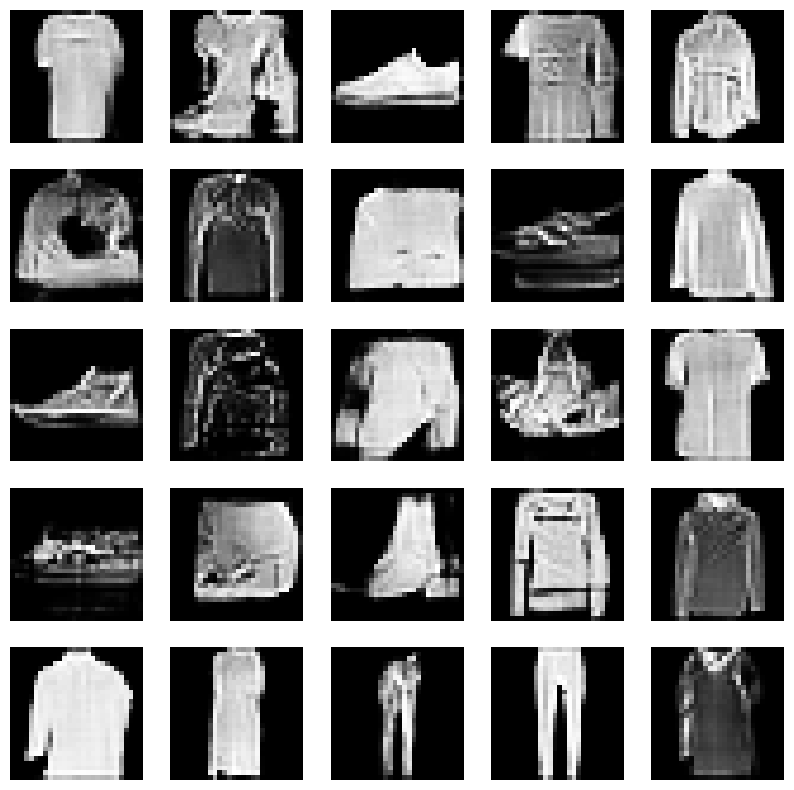

100%|██████████| 1875/1875 [02:00<00:00, 15.51it/s]


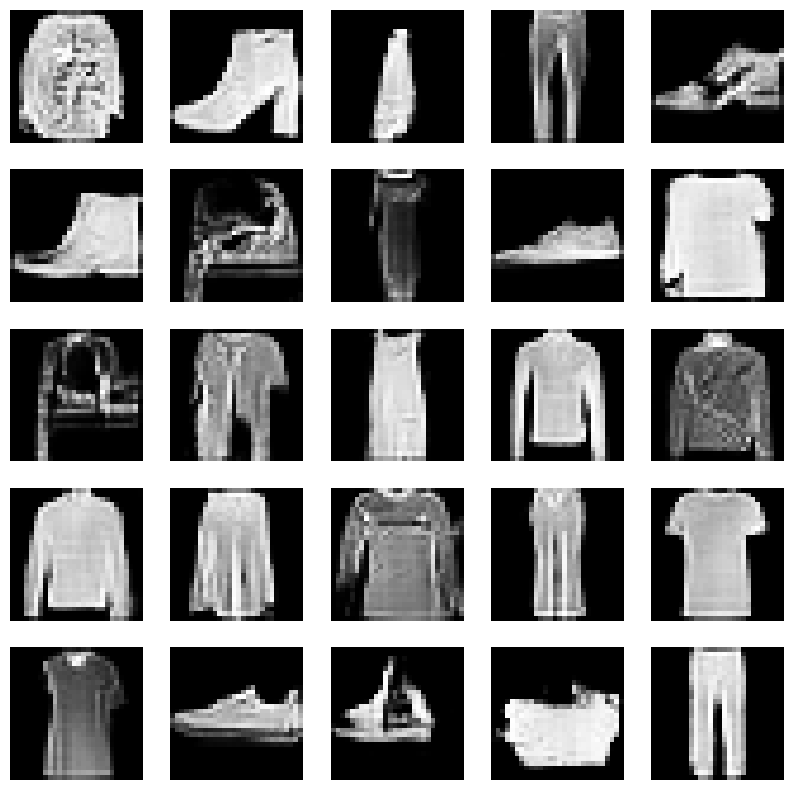

100%|██████████| 1875/1875 [02:01<00:00, 15.39it/s]


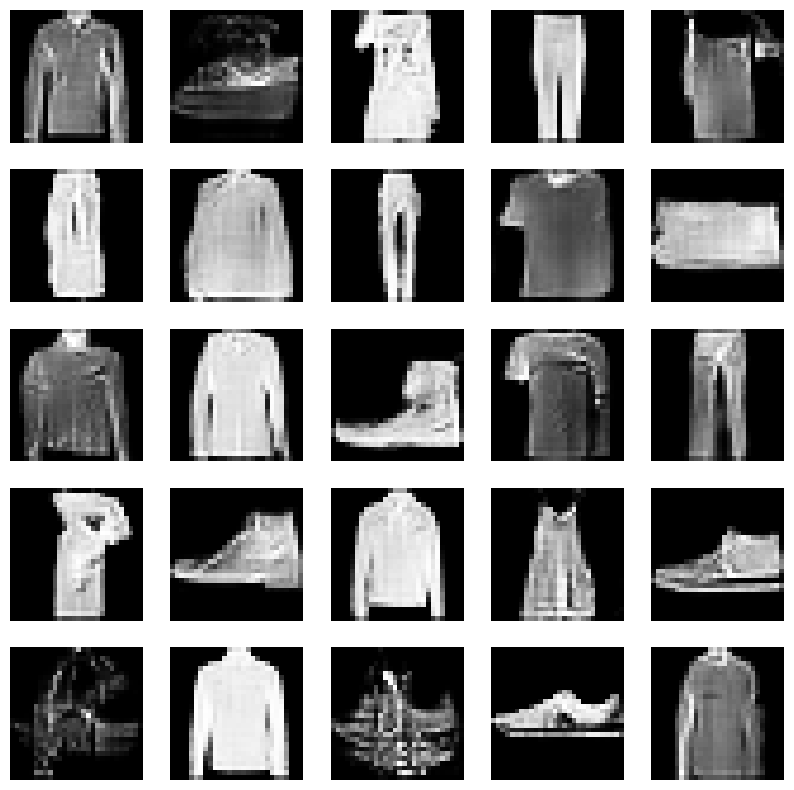

100%|██████████| 1875/1875 [02:02<00:00, 15.34it/s]


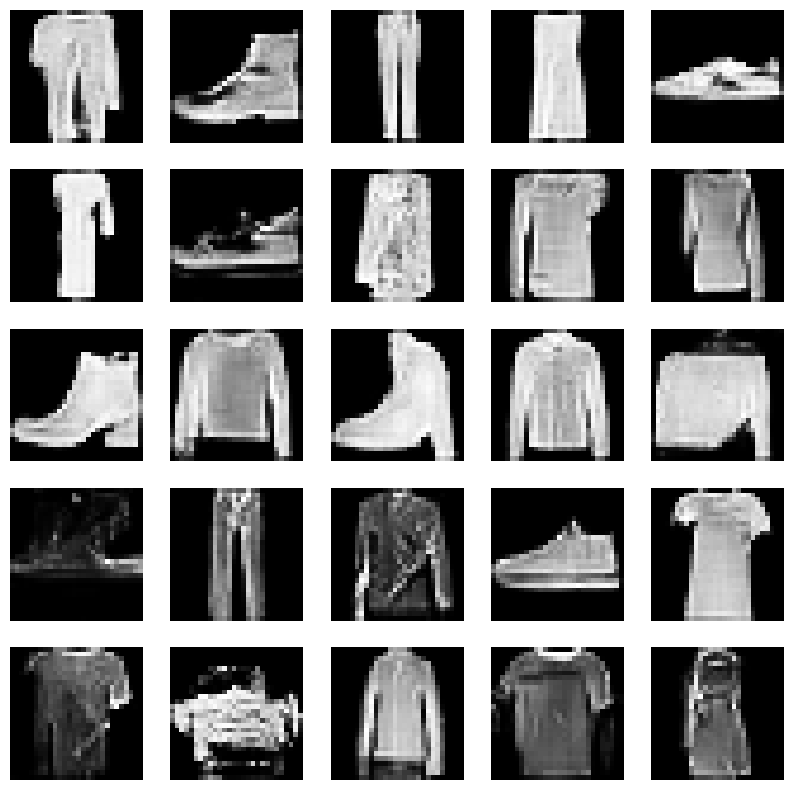

100%|██████████| 1875/1875 [02:01<00:00, 15.42it/s]


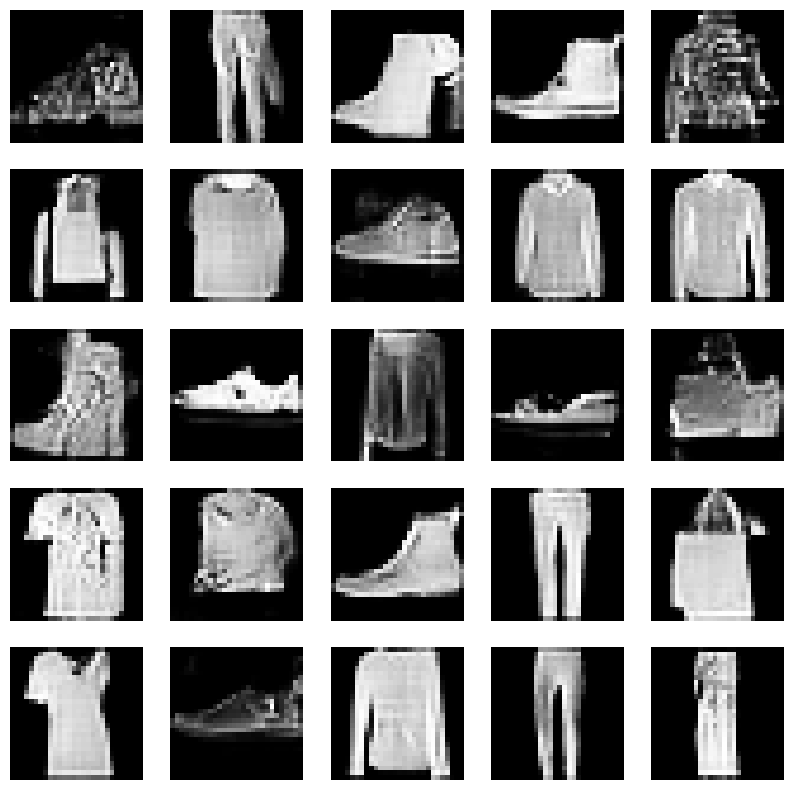

100%|██████████| 1875/1875 [02:01<00:00, 15.38it/s]


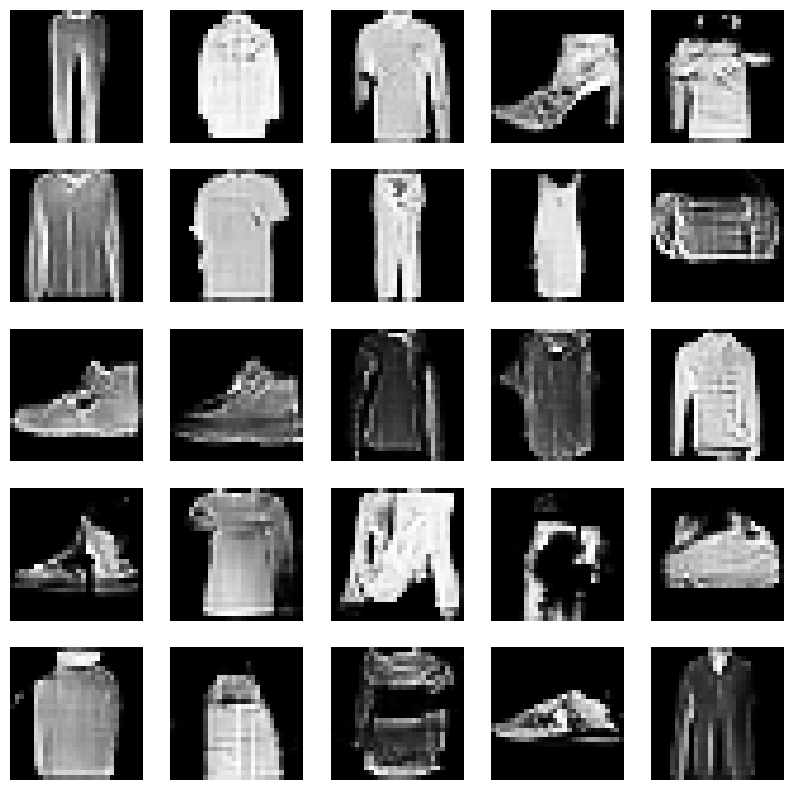

100%|██████████| 1875/1875 [02:03<00:00, 15.21it/s]


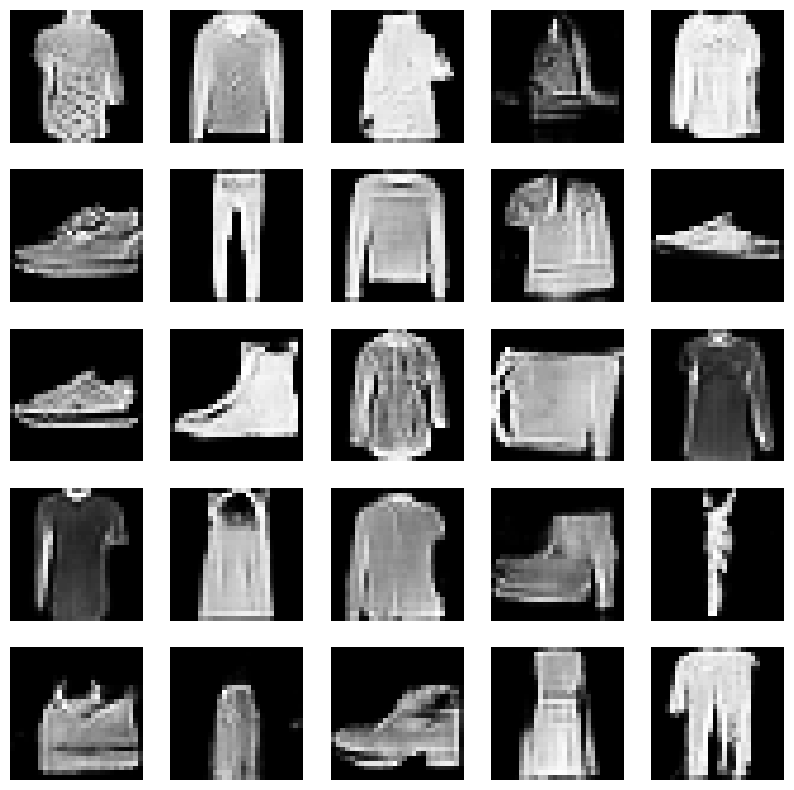

100%|██████████| 1875/1875 [02:02<00:00, 15.30it/s]


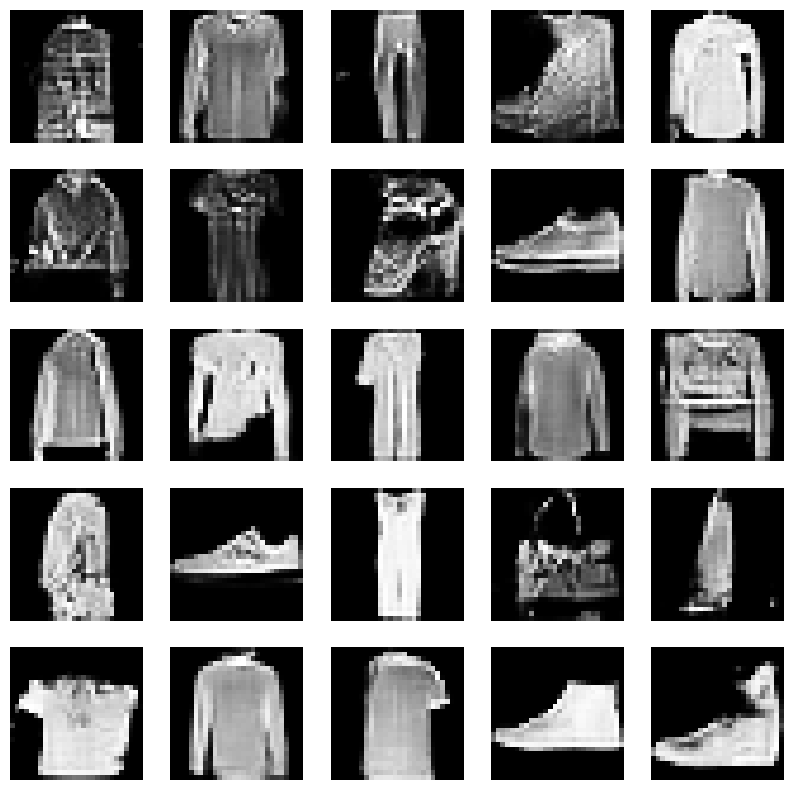

100%|██████████| 1875/1875 [02:02<00:00, 15.26it/s]


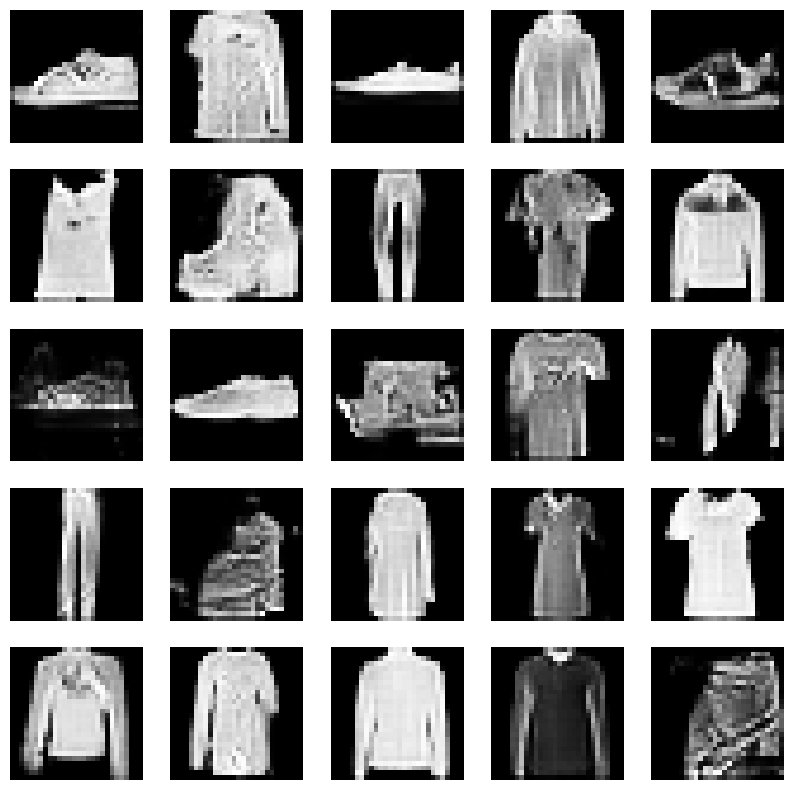

100%|██████████| 1875/1875 [02:03<00:00, 15.22it/s]


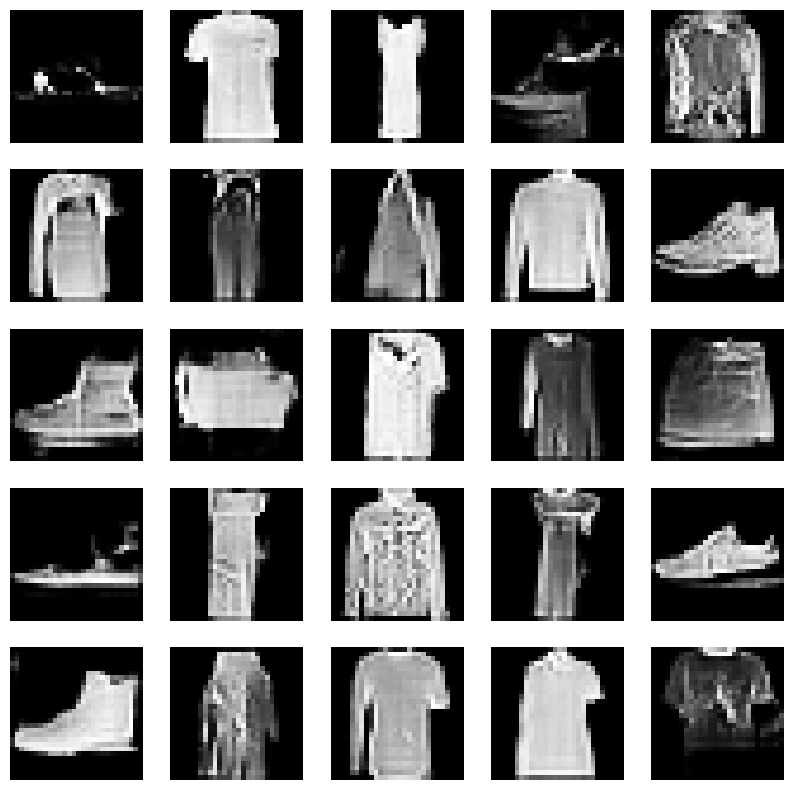

100%|██████████| 1875/1875 [02:02<00:00, 15.27it/s]


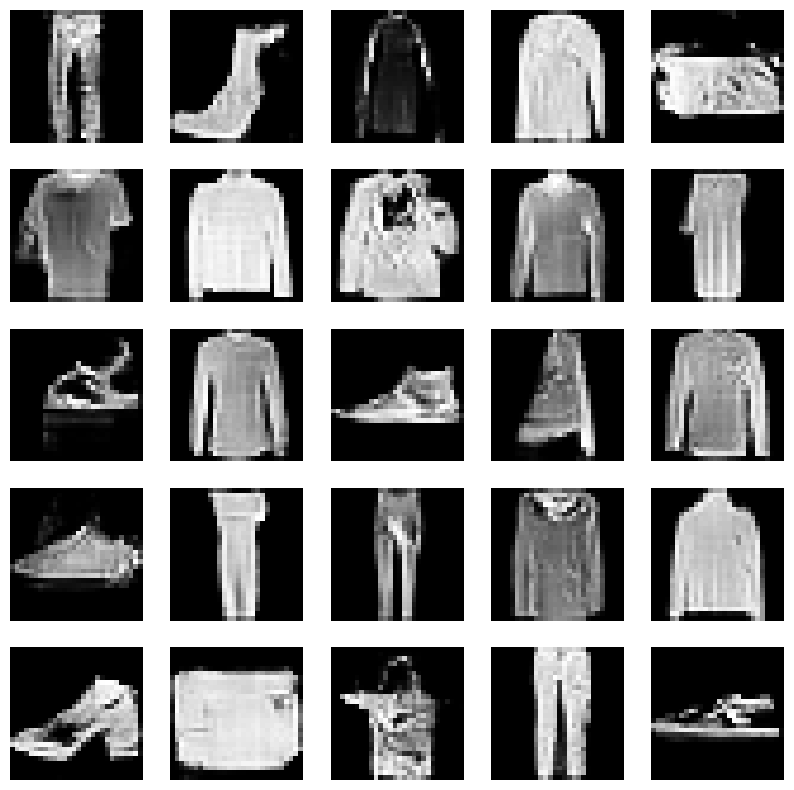

100%|██████████| 1875/1875 [02:03<00:00, 15.23it/s]


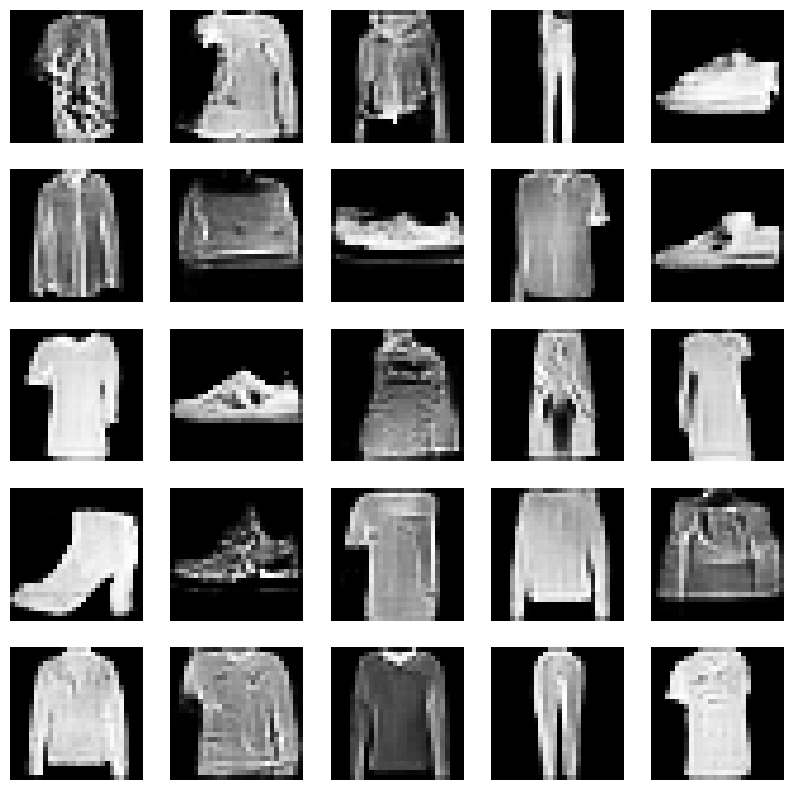

100%|██████████| 1875/1875 [02:03<00:00, 15.17it/s]


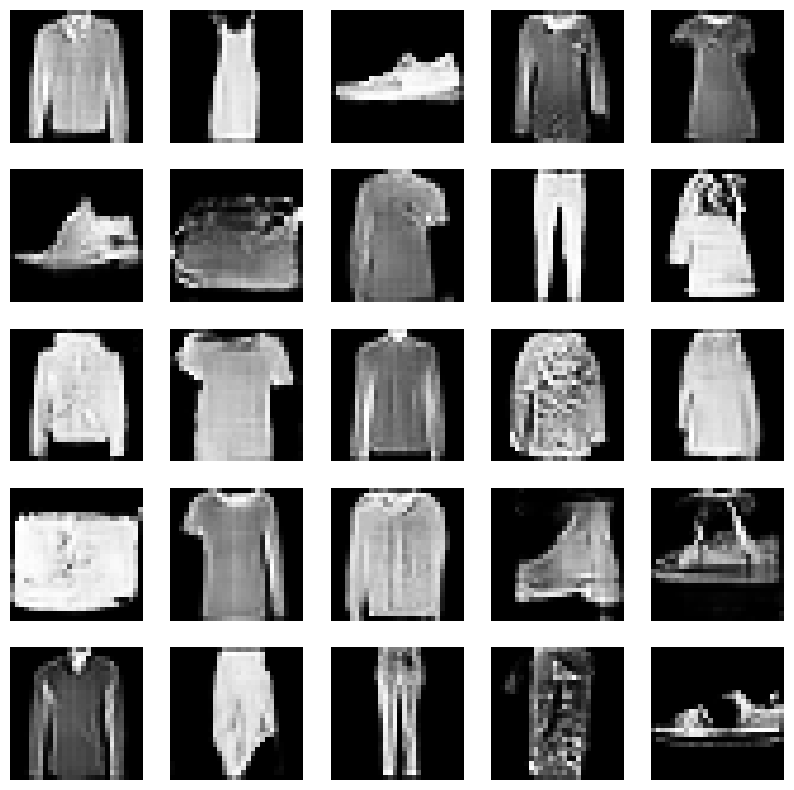

100%|██████████| 1875/1875 [02:03<00:00, 15.13it/s]


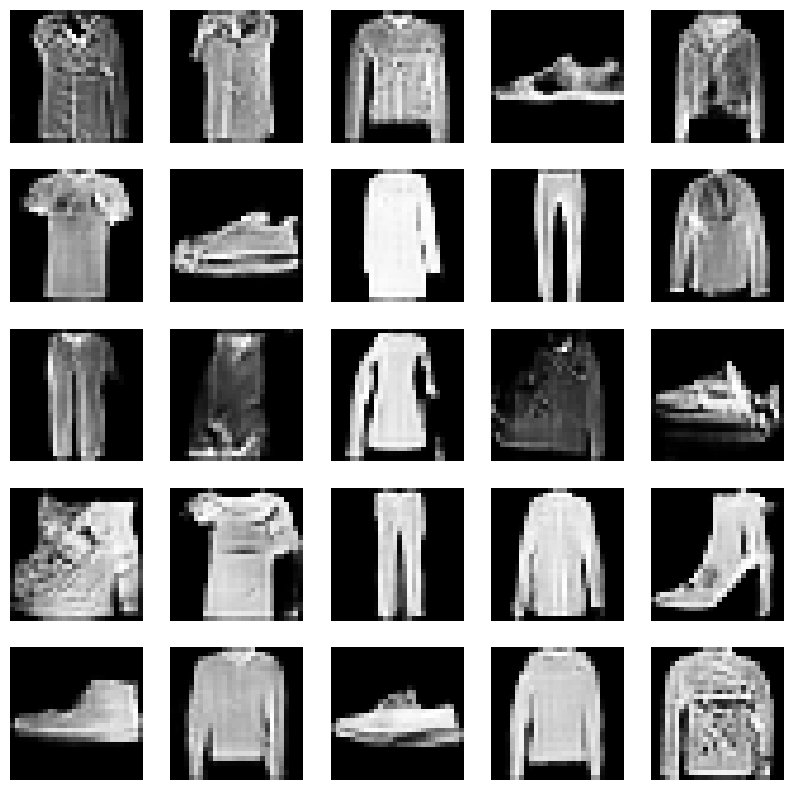

100%|██████████| 1875/1875 [02:04<00:00, 15.08it/s]


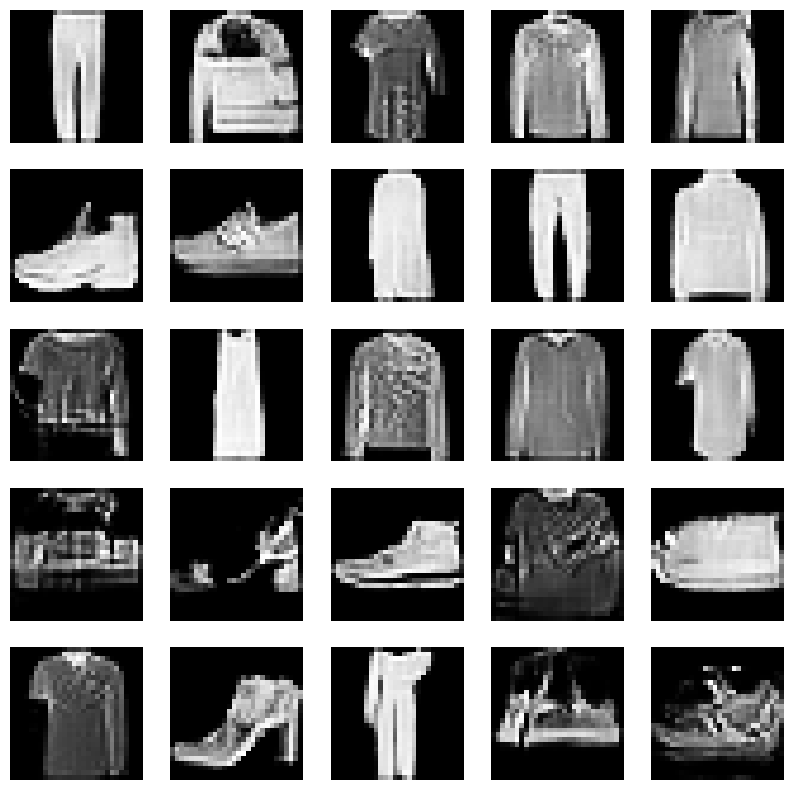

100%|██████████| 1875/1875 [02:03<00:00, 15.18it/s]


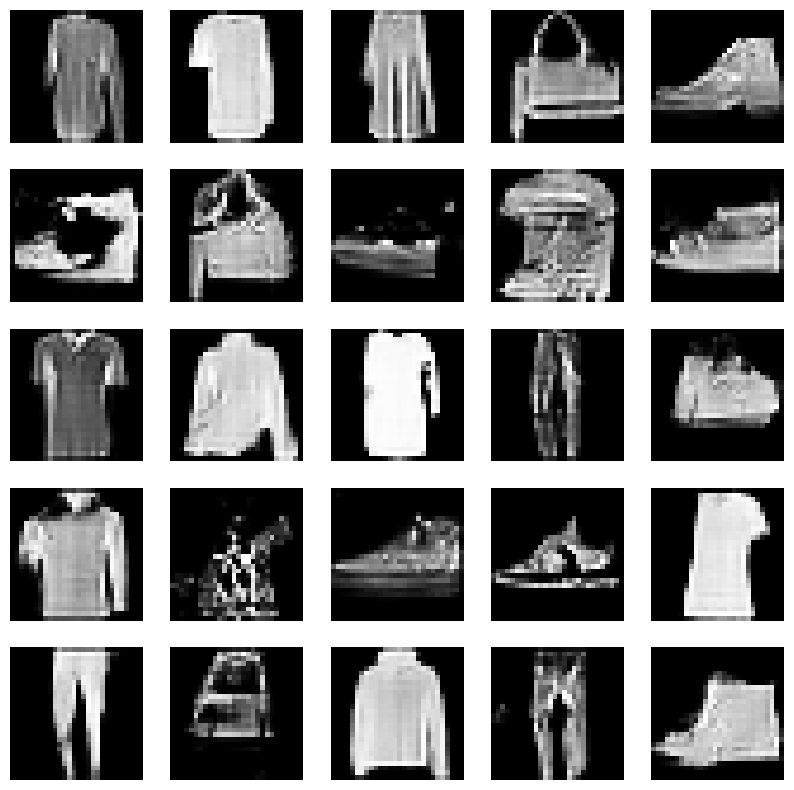

100%|██████████| 1875/1875 [02:03<00:00, 15.13it/s]


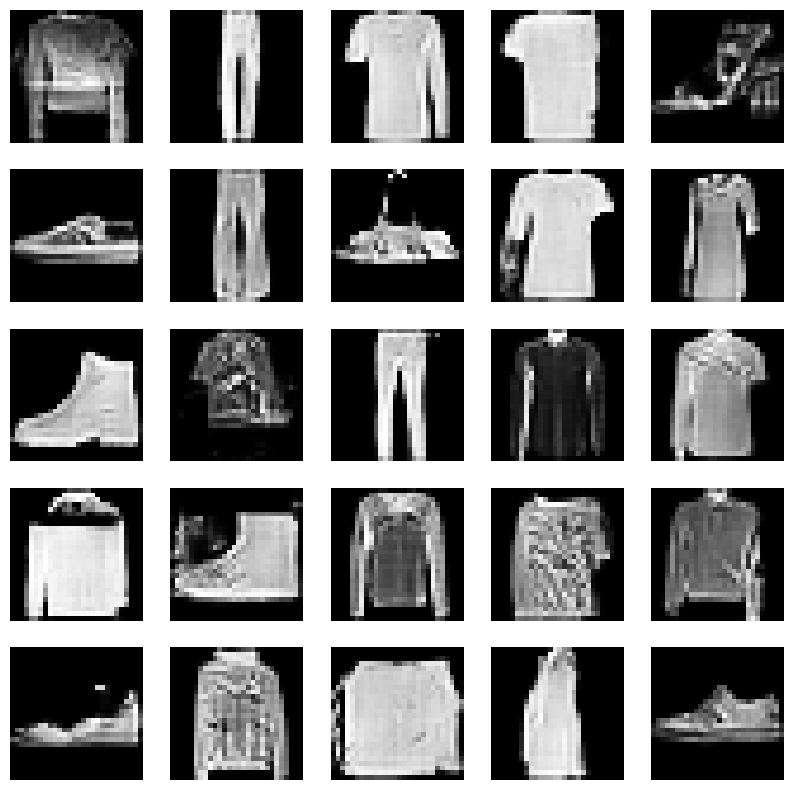

100%|██████████| 1875/1875 [02:04<00:00, 15.12it/s]


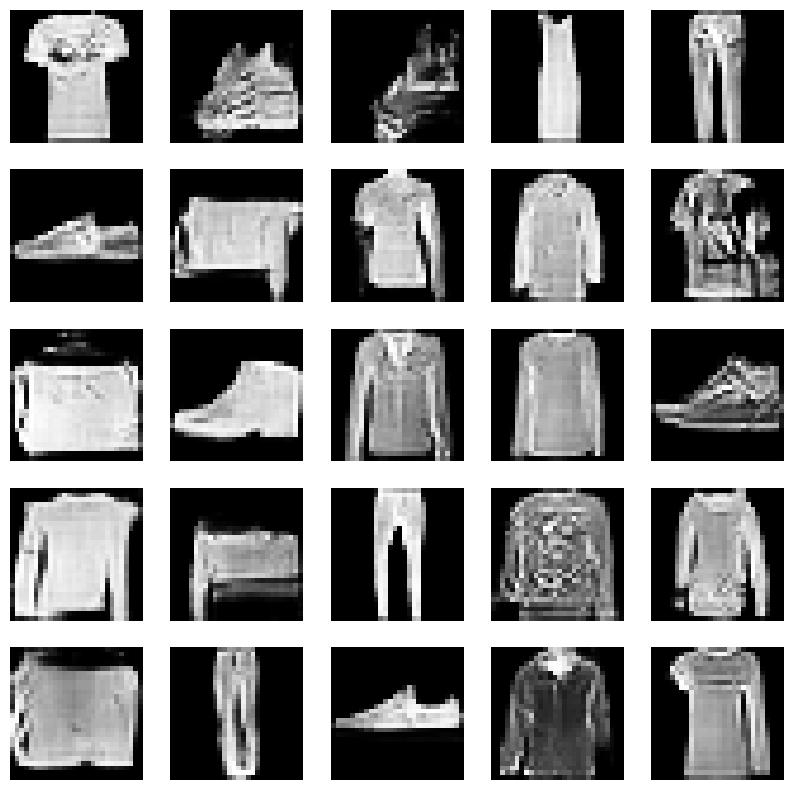

100%|██████████| 1875/1875 [02:03<00:00, 15.19it/s]


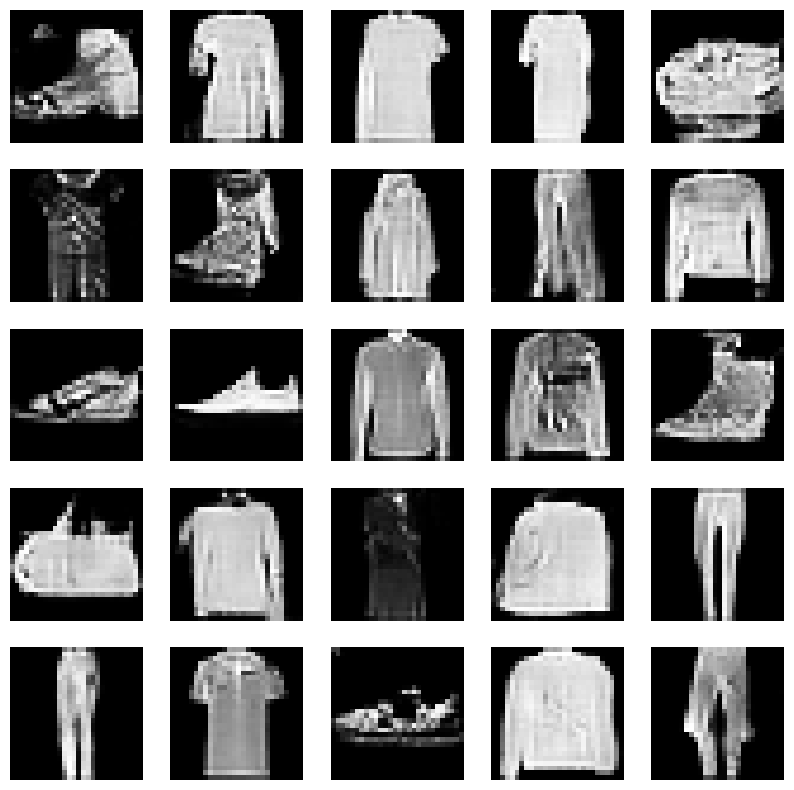

100%|██████████| 1875/1875 [02:03<00:00, 15.13it/s]


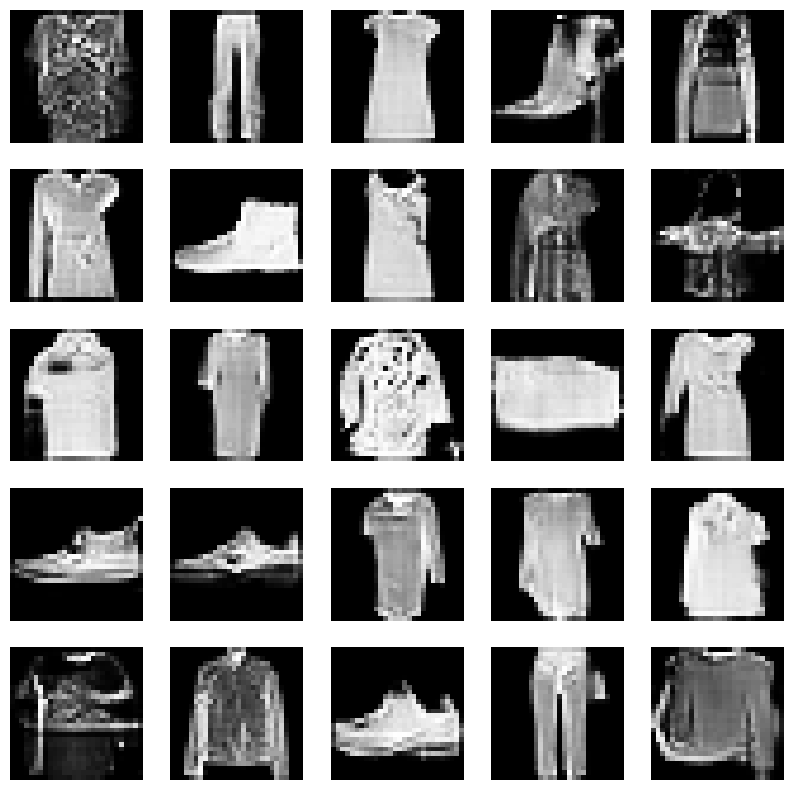

100%|██████████| 1875/1875 [02:05<00:00, 14.97it/s]


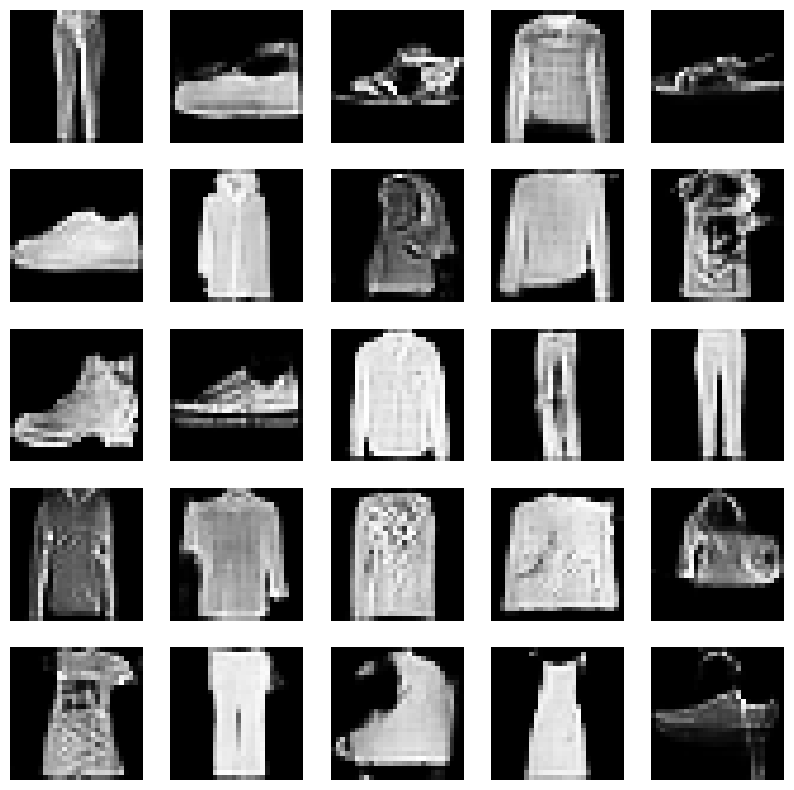

100%|██████████| 1875/1875 [02:04<00:00, 15.05it/s]


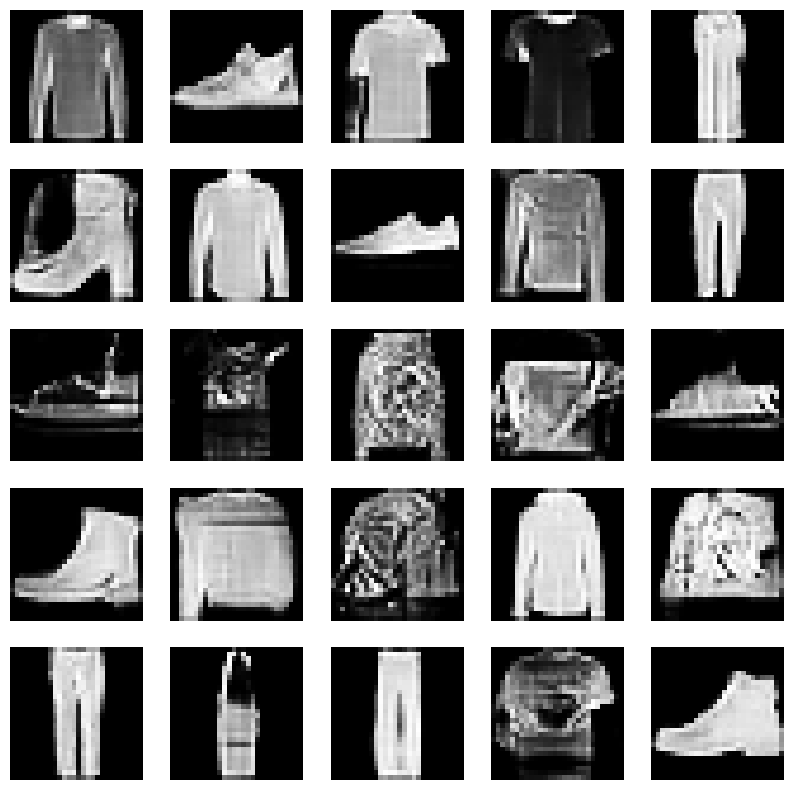

100%|██████████| 1875/1875 [02:04<00:00, 15.09it/s]


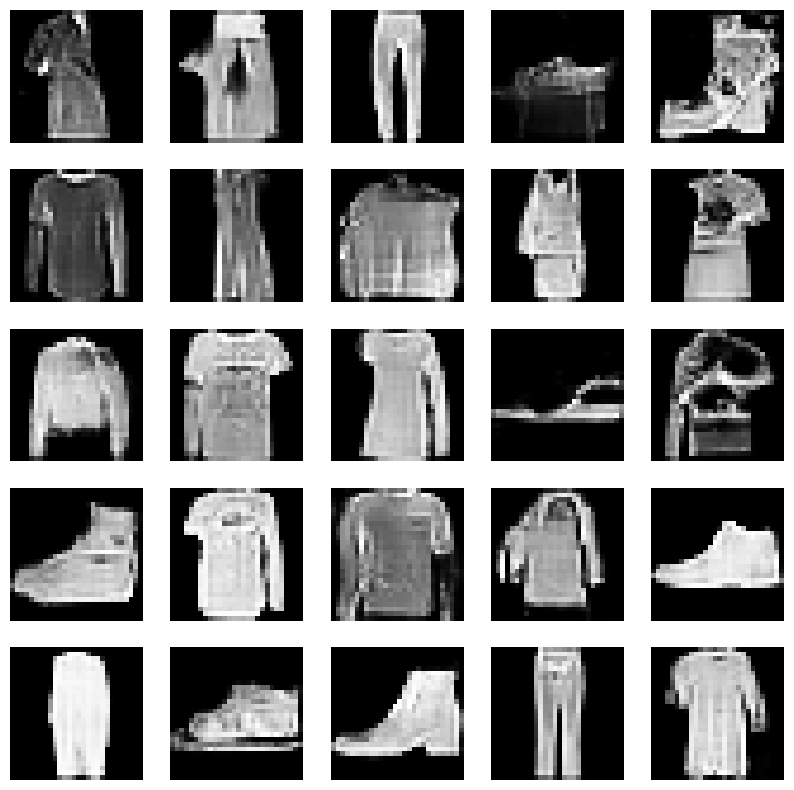

100%|██████████| 1875/1875 [02:04<00:00, 15.11it/s]


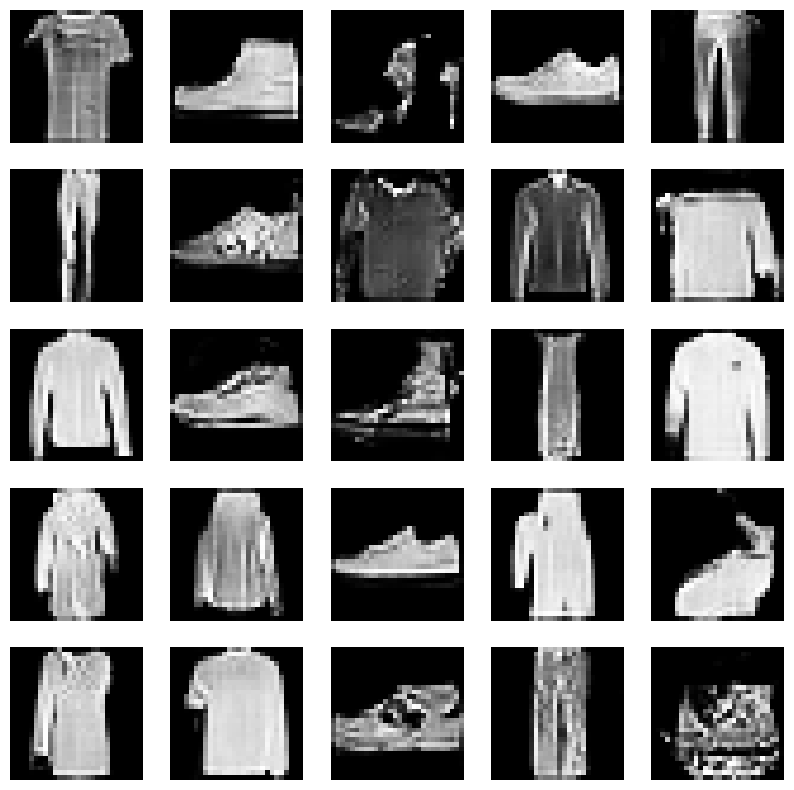

100%|██████████| 1875/1875 [02:03<00:00, 15.16it/s]


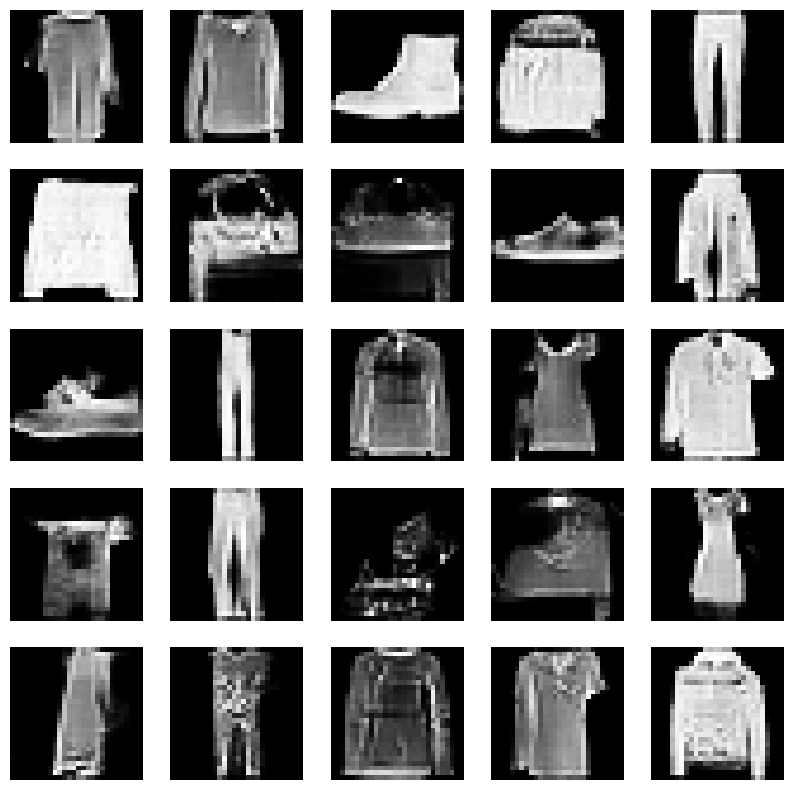

100%|██████████| 1875/1875 [02:03<00:00, 15.14it/s]


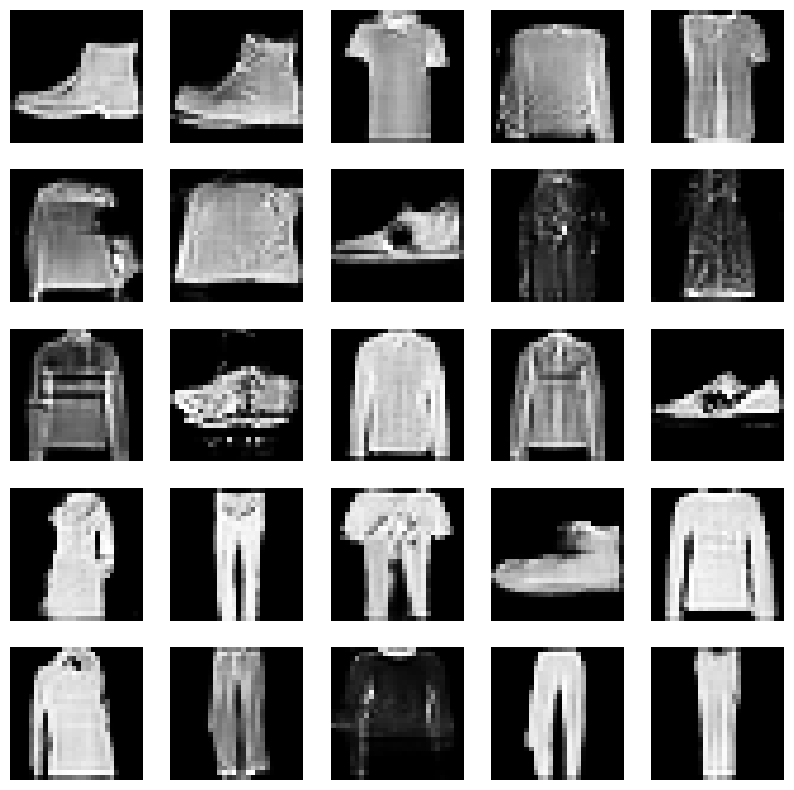

100%|██████████| 1875/1875 [02:04<00:00, 15.05it/s]


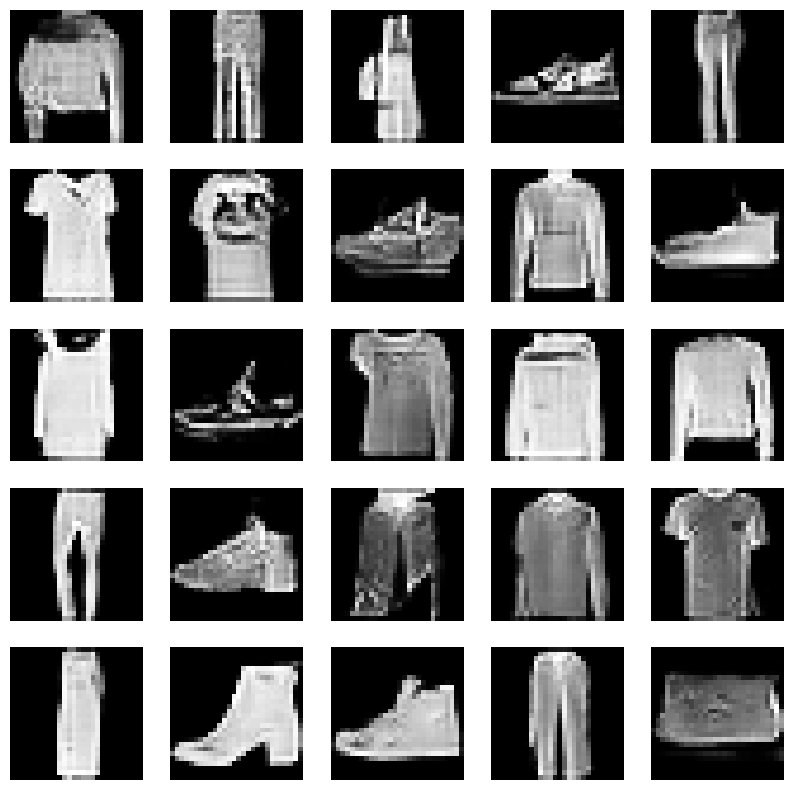

100%|██████████| 1875/1875 [02:05<00:00, 14.97it/s]


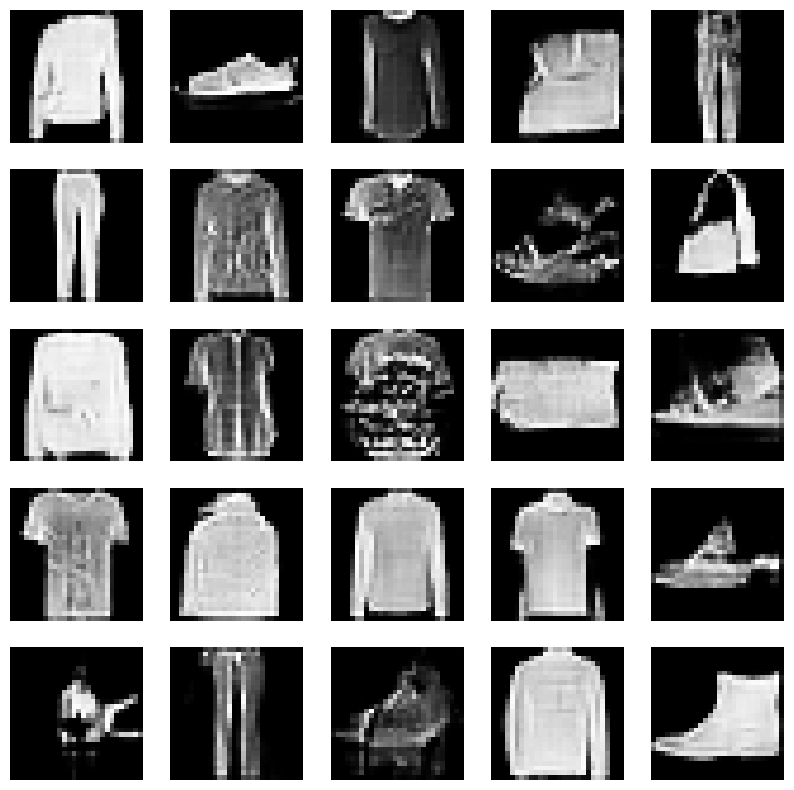

100%|██████████| 1875/1875 [02:05<00:00, 14.96it/s]


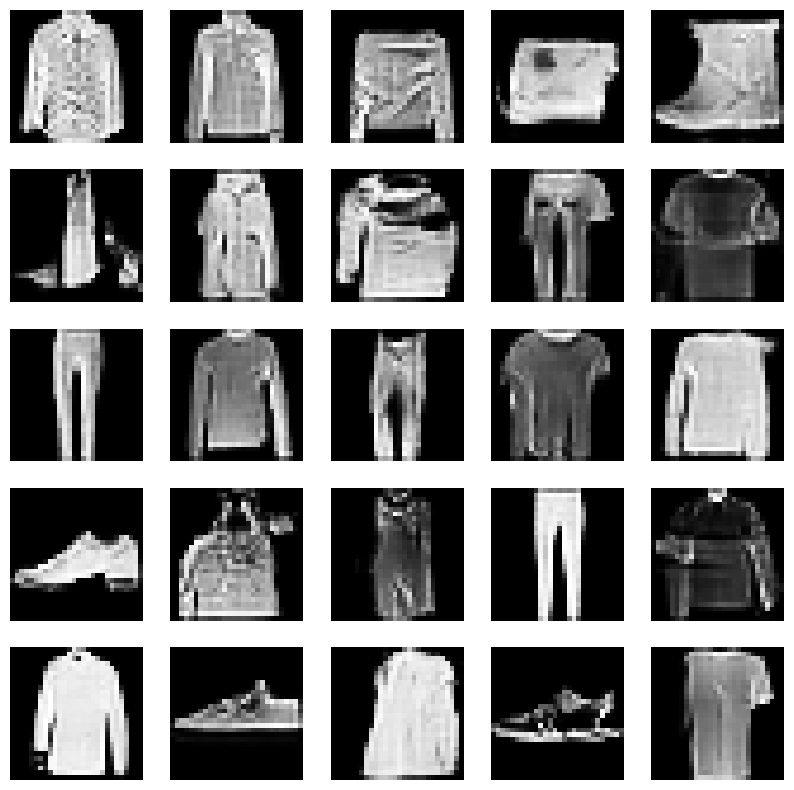

100%|██████████| 1875/1875 [02:05<00:00, 14.95it/s]


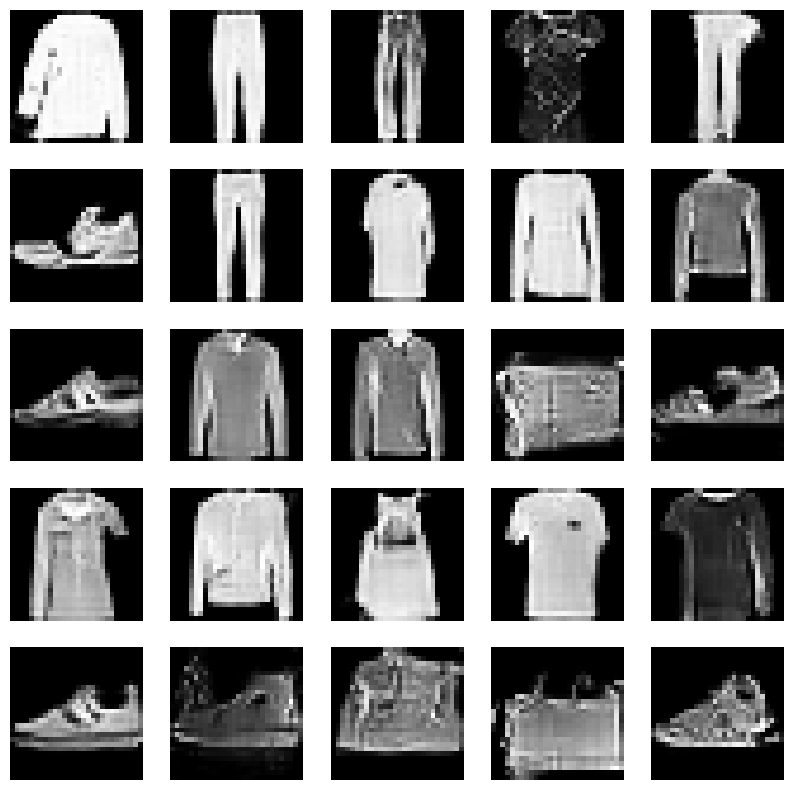

100%|██████████| 1875/1875 [02:06<00:00, 14.88it/s]


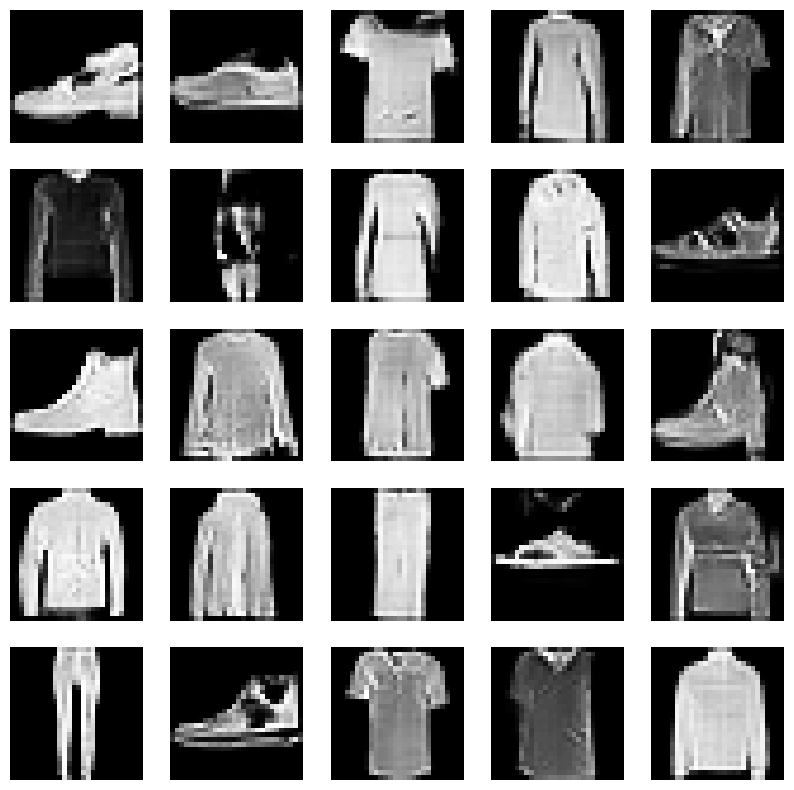

100%|██████████| 1875/1875 [02:07<00:00, 14.74it/s]


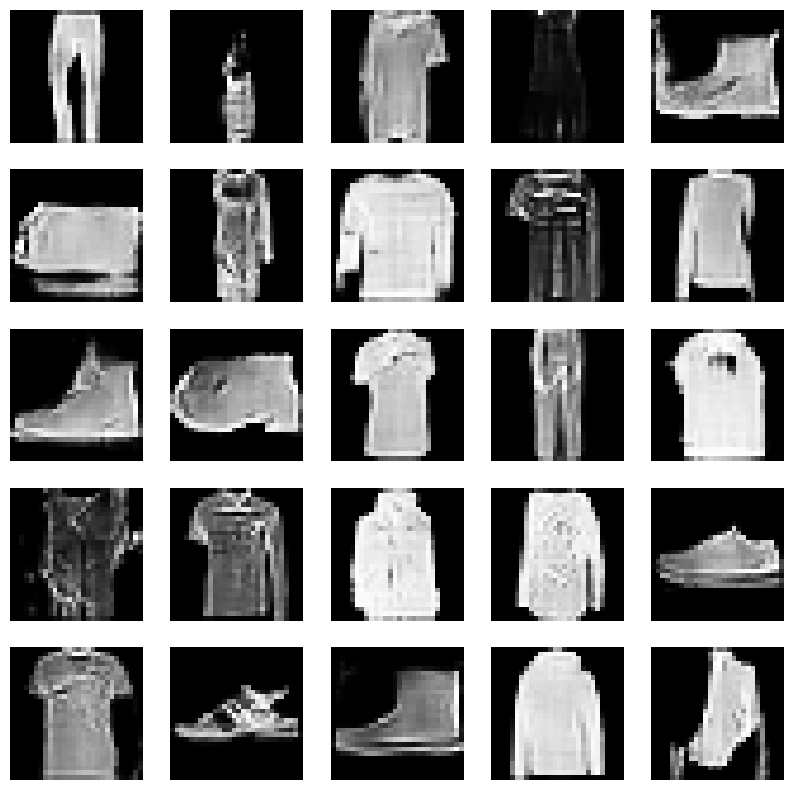

100%|██████████| 1875/1875 [02:06<00:00, 14.82it/s]


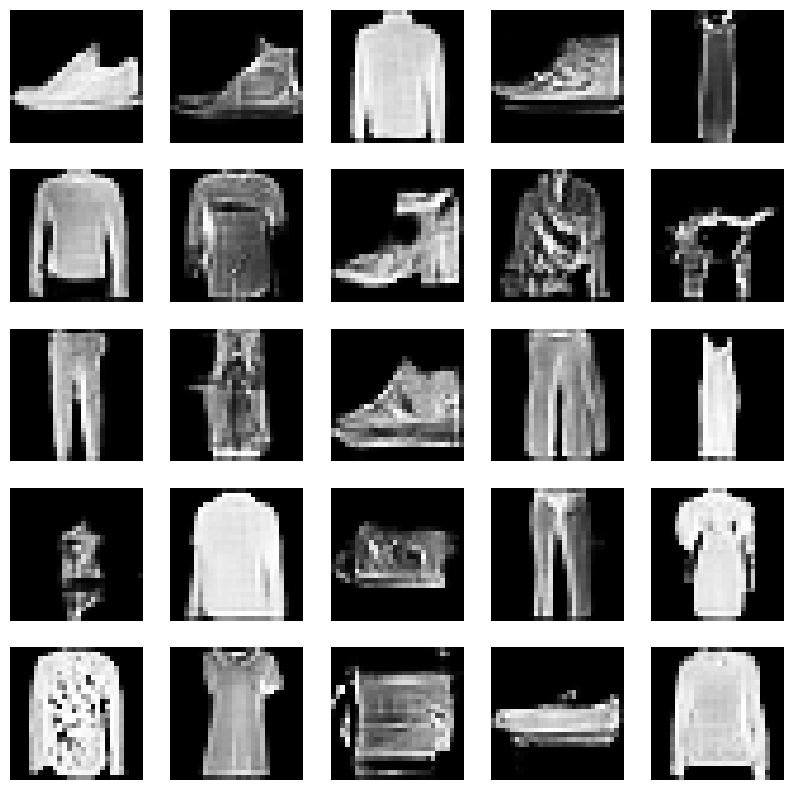

100%|██████████| 1875/1875 [02:11<00:00, 14.25it/s]


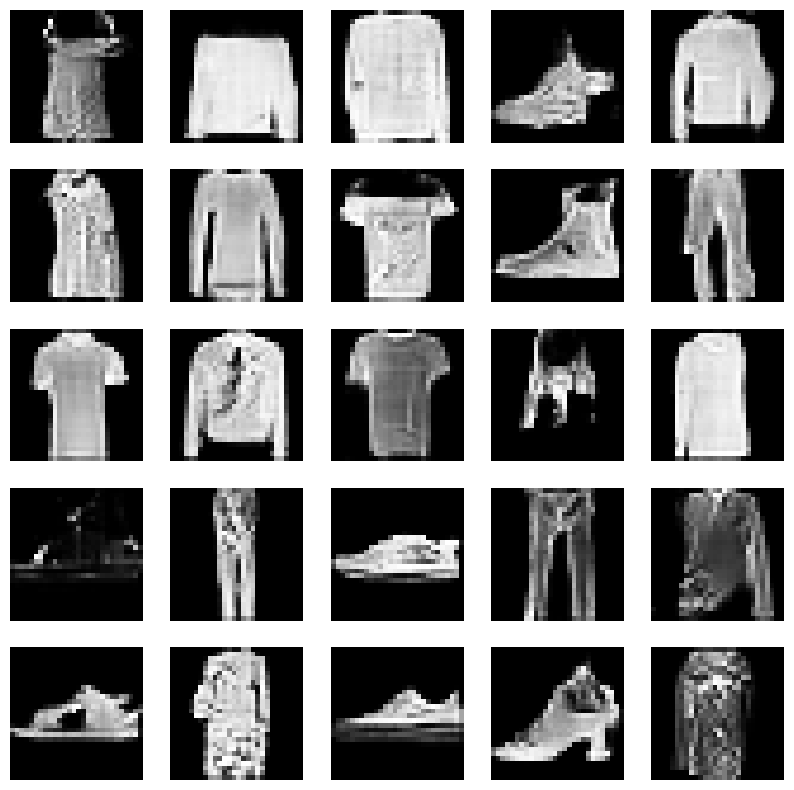

100%|██████████| 1875/1875 [02:07<00:00, 14.72it/s]


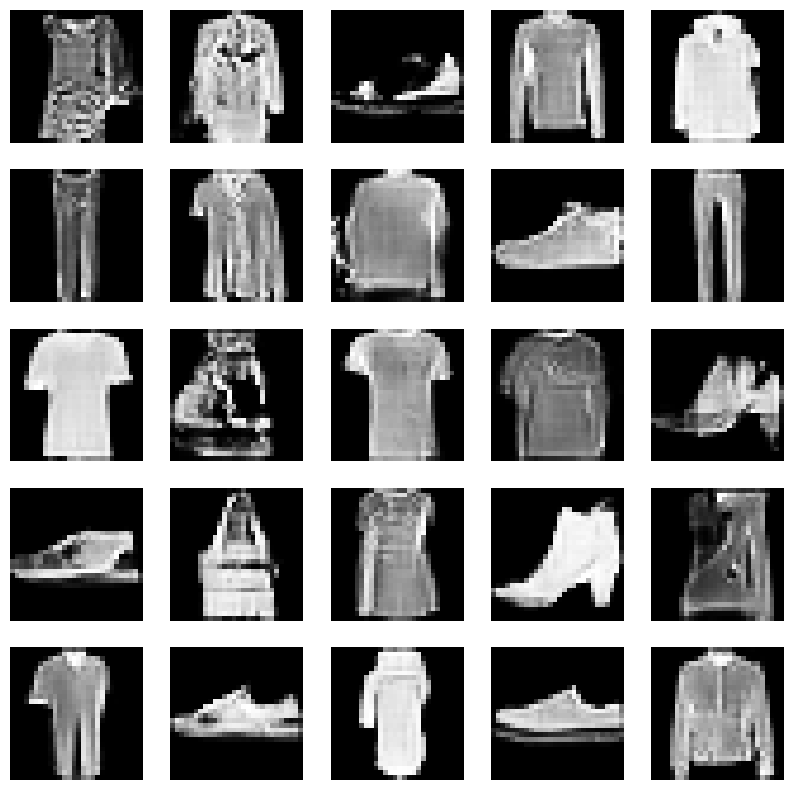

100%|██████████| 1875/1875 [02:06<00:00, 14.81it/s]


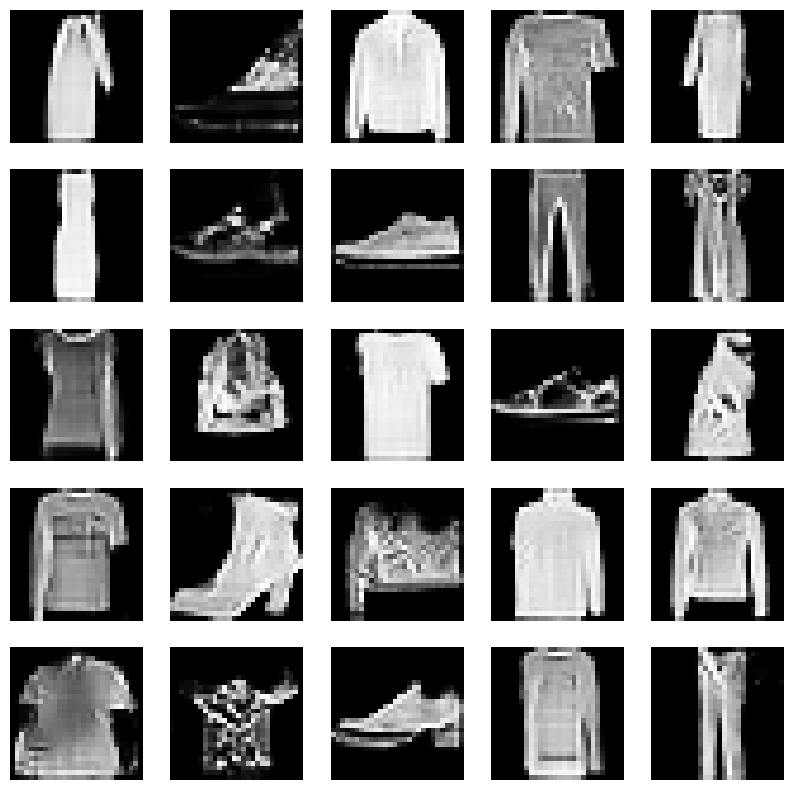

 99%|█████████▉| 1864/1875 [02:07<00:00, 15.15it/s]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


class Generator(nn.Module):
    def __init__(self, num_features):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(num_features, 7*7*128),
            nn.BatchNorm1d(7*7*128),
            nn.ReLU(True),
        )

        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.Tanh()
        )

    def forward(self, input):
        x = self.main(input)
        x = x.view(-1, 128, 7, 7)  # Reformo el tensor antes de pasarlo a las capas convolucionales
        return self.deconv(x)

# Definición del Discriminador
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Flatten(),
            nn.Linear(7*7*128, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

# Transformación y carga del conjunto de datos
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('.', train=True, download=True, transform=transform),
    batch_size=32, shuffle=True)

# Instanciando el Generador y el Discriminador
generator = Generator(z_dim)
discriminator = Discriminator()

# Optimizadores
optimizer_g = optim.RMSprop(generator.parameters(), lr=0.0005)
optimizer_d = optim.RMSprop(discriminator.parameters(), lr=0.0005)

criterion = nn.BCELoss()
num_epochs = 100

# Bucle de entrenamiento
for epoch in range(num_epochs):
    for real_images, _ in tqdm(train_loader):
        optimizer_g.zero_grad()
        noise = torch.randn(real_images.size(0), 100)
        fake_images = generator(noise)
        labels = torch.ones(real_images.size(0), 1)
        output = discriminator(fake_images)
        loss_g = criterion(output, labels)
        loss_g.backward()
        optimizer_g.step()

        optimizer_d.zero_grad()
        real_labels = torch.ones(real_images.size(0), 1)
        fake_labels = torch.zeros(real_images.size(0), 1)
        output_real = discriminator(real_images)
        output_fake = discriminator(fake_images.detach())
        loss_real = criterion(output_real, real_labels)
        loss_fake = criterion(output_fake, fake_labels)
        loss_d = (loss_real + loss_fake) / 2
        loss_d.backward()
        optimizer_d.step()

    # Visualización de las imágenes generadas
    with torch.no_grad():
        fake_images = generator(torch.randn(25, 100))
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i+1)
            plt.imshow(fake_images[i].squeeze().numpy() * 0.5 + 0.5, cmap='gray')
            plt.axis('off')
        plt.show()

        # ===== Entrenamiento del discriminador =====
        # Computar la pérdida con imágenes reales
        outputs = D(real_images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # Computar la pérdida con imágenes falsas
        z = torch.randn(batch_size, z_dim, 1, 1).cuda()  # Ajuste del tamaño del ruido
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

    print(f'Epoch [{epoch}/{num_epochs}], d_loss: {loss_d.item():.4f}, g_loss: {loss_g.item():.4f}, D(x): {real_score.mean().item():.2f}, D(G(z)): {fake_score.mean().item():.2f}')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(losses_g, label="G")
plt.plot(losses_d, label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()



show_fake_images(G)

## Celeb_A

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/celeba

In [1]:
def get_dataloader(batch_size, image_size, data_dir='train/'):
  transform = transforms.Compose([transforms.Resize(image_size),transforms.CenterCrop(image_size),transforms.ToTensor()])

  dataset = datasets.ImageFolder(data_dir,transform = transform)

  dataloader = torch.utils.data.DataLoader(dataset = dataset,batch_size = batch_size,shuffle = True)
  return dataloader

# Define function hyperparameters
batch_size = 256
img_size = 32
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)

NameError: ignored

In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

In [ ]:
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1.
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    min, max = feature_range
    x = x*(max-min) + min
    return x

In [ ]:
def conv(input_c,output,kernel_size,stride = 2,padding  = 1, batch_norm = True):
    layers =[]
    con = nn.Conv2d(input_c,output,kernel_size,stride,padding,bias = False)
    layers.append(con)

    if batch_norm:
        layers.append(nn.BatchNorm2d(output))

    return nn.Sequential(*layers)
class Discriminator(nn.Module):
def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        #complete init function
super(Discriminator, self).__init__()
        self.conv_dim = conv_dim
        self.layer_1 = conv(3,conv_dim,4,batch_norm = False) #16
        self.layer_2 = conv(conv_dim,conv_dim*2,4) #8
        self.layer_3 = conv(conv_dim*2,conv_dim*4,4) #4
        self.fc = nn.Linear(conv_dim*4*4*4,1)
def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network
        :return: Discriminator logits; the output of the neural network
        """
        # define feedforward behavior
        x = F.leaky_relu(self.layer_1(x))
        x = F.leaky_relu(self.layer_2(x))
        x = F.leaky_relu(self.layer_3(x))
        x = x.view(-1,self.conv_dim*4*4*4)
        x = self.fc(x)
        return x

In [ ]:
def deconv(input_c,output,kernel_size,stride = 2, padding =1, batch_norm = True):
    layers = []
    decon = nn.ConvTranspose2d(input_c,output,kernel_size,stride,padding,bias = False)
    layers.append(decon)

    if batch_norm:
        layers.append(nn.BatchNorm2d(output))
    return nn.Sequential(*layers)
class Generator(nn.Module):

    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()
        # complete init function
        self.conv_dim = conv_dim
        self.fc = nn.Linear(z_size,conv_dim*8*2*2)
        self.layer_1 = deconv(conv_dim*8,conv_dim*4,4) #4
        self.layer_2 = deconv(conv_dim*4,conv_dim*2,4) #8
        self.layer_3 = deconv(conv_dim*2,conv_dim,4) #16
        self.layer_4 = deconv(conv_dim,3,4,batch_norm = False) #32


    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network
        :return: A 32x32x3 Tensor image as output
        """
        # define feedforward behavior
        x = self.fc(x)
        x = x.view(-1,self.conv_dim*8,2,2) #(batch_size,depth,width,height)
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        x = F.relu(self.layer_3(x))
        x = torch.tanh(self.layer_4(x))
        return x

In [ ]:
# Create optimizers for the discriminator D and generator G
d_optimizer = optim.Adam(D.parameters(),lr = .0002, betas = [0.5,0.999])
g_optimizer = optim.Adam(G.parameters(),lr = .0002, betas = [0.5,0.999])

In [ ]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''

    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()
# keep track of loss and generated, "fake" samples
    samples = []
    losses = []
# Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()
# epoch training loop
    for epoch in range(n_epochs):
# batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):
            batch_size = real_images.size(0)
            real_images = scale(real_images)
            if train_on_gpu:
                real_images = real_images.cuda()

            # 1. Train the discriminator on real and fake ima.ges
            d_optimizer.zero_grad()
            d_out_real = D(real_images)
            z = np.random.uniform(-1,1,size = (batch_size,z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            d_loss = real_loss(d_out_real) + fake_loss(D(G(z)))
            d_loss.backward()
            d_optimizer.step()
            # 2. Train the generator with an adversarial loss
            G.train()
            g_optimizer.zero_grad()
            z = np.random.uniform(-1,1,size = (batch_size,z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            g_loss = real_loss(D(G(z)))
            g_loss.backward()
            g_optimizer.step()

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))
## AFTER EACH EPOCH##
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        G.train() # back to training mode
# Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)

    # finally return losses
    return losses


# set number of epochs
n_epochs = 40
# call training function
losses = train(D, G, n_epochs=n_epochs)

In [ ]:
def real_loss(D_out):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''
    batch_size = D_out.size(0)
    labels = torch.ones(batch_size)
    if train_on_gpu:
        labels = labels.cuda()
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(),labels)
    return loss
def fake_loss(D_out):
    '''Calculates how close discriminator outputs are to being fake.
       param, D_out: discriminator logits
       return: fake loss'''
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size)
    if train_on_gpu:
        labels = labels.cuda()
    criterion =  nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(),labels)
    return loss

In [ ]:
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)
# initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)
print(D)
    print()
    print(G)

    return D, G

# Define model hyperparams
d_conv_dim = 64
g_conv_dim = 64
z_size = 100
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

In [ ]:
def weights_init_normal(m):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__

    if hasattr(m,'weight') and (classname.find('Conv') != -1 or classname.find('Linear') != -1):

        m.weight.data.normal_(0.0,0.02)

        if hasattr(m,'bias') and m.bias is not None:
            m.bias.data.zero_()

In [2]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Transformación común para la mayoría de los datasets (puede necesitar ajustes específicos)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Sólo un canal, por lo tanto, una media y una desviación estándar
])

# CIFAR-10
# cifar10_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# cifar10_loader = DataLoader(cifar10_dataset, batch_size=128, shuffle=True)

# CIFAR-100
# cifar100_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
# cifar100_loader = DataLoader(cifar100_dataset, batch_size=128, shuffle=True)

# CelebA
celeba_dataset = datasets.ImageFolder(root='./content/celeb_a', transform=transform)
celeba_loader = DataLoader(celeba_dataset, batch_size=128, shuffle=True)

# # Fashion MNIST
# fashion_mnist_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=fashion_transform)
# fashion_mnist_loader = DataLoader(fashion_mnist_dataset, batch_size=128, shuffle=True)

# LSUN (debes especificar las categorías que deseas)
# lsun_dataset = datasets.LSUN(root='./data', classes=['bedroom_train'], transform=transform)
# lsun_loader = DataLoader(lsun_dataset, batch_size=128, shuffle=True)

FileNotFoundError: ignored

In [ ]:
import torchvision.datasets

torchvision.datasets.CelebA("content/celeb_a",download = True)

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import CelebA
from torch.utils.data import DataLoader

# Definir las transformaciones para las imágenes
transform = transforms.Compose([
    transforms.CenterCrop(160),  # CelebA contiene imágenes 218x178, centrar y cortar puede dar una imagen cuadrada
    transforms.Resize(64),  # Redimensionar la imagen para que tenga el tamaño deseado
    transforms.ToTensor(),  # Convertir la imagen a tensor de PyTorch
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizar las imágenes
])

# Cargar el dataset
celeb_a_dataset = CelebA(root="content/celeb_a", split="train", transform=transform, download=True)

# DataLoader para iterar sobre el dataset
dataloader = DataLoader(celeb_a_dataset, batch_size=128, shuffle=True)


Files already downloaded and verified


In [ ]:
# Display image and label.

train_features, train_labels = next(iter(dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
# plt.imshow(img, cmap="color")
print(f"Label: {label}")

Feature batch shape: torch.Size([128, 3, 64, 64])
Labels batch shape: torch.Size([128, 40])
Label: tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])


In [ ]:
# class Generator(nn.Module):
#     def __init__(self, num_features):
#         super(Generator, self).__init__()
#         self.init_size = 8  # Este será el tamaño de la imagen inicialmente (8x8).
#         self.l1 = nn.Sequential(nn.Linear(num_features, 128 * self.init_size ** 2))

#         self.conv_blocks = nn.Sequential(
#             nn.BatchNorm2d(128),
#             nn.Upsample(scale_factor=2),
#             nn.Conv2d(128, 128, 3, stride=1, padding=1),
#             nn.BatchNorm2d(128, 0.8),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Upsample(scale_factor=2),
#             nn.Conv2d(128, 64, 3, stride=1, padding=1),
#             nn.BatchNorm2d(64, 0.8),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(64, 3, 3, stride=1, padding=1),
#             nn.Tanh(),
#         )

#     def forward(self, z):
#         out = self.l1(z)
#         out = out.view(out.shape[0], 128, self.init_size, self.init_size)
#         img = self.conv_blocks(out)
#         return img
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

class Generator(nn.Module):
    def __init__(self,num_features):
        super(Generator, self).__init__()
        self.dense = nn.Linear(num_features, 65536)  # Assuming the input noise vector is of size 100
        self.batch_norm1 = nn.BatchNorm1d(65536)
        self.leaky_relu = nn.LeakyReLU(0.2)

        self.conv_transpose_layers = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(128, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.dense(x)
        x = self.batch_norm1(x)
        x = self.leaky_relu(x)
        x = x.view(-1, 256, 16, 16)  # Reshape the tensor to (Batch Size, Channels, Height, Width)
        x = self.conv_transpose_layers(x)
        return x

In [ ]:
# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator, self).__init__()

#         self.model = nn.Sequential(
#             nn.Conv2d(3, 64, 4, stride=2, padding=1),  # Asume que la entrada es 3x64x64
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(64, 128, 4, stride=2, padding=1),
#             nn.BatchNorm2d(128),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(128, 256, 4, stride=2, padding=1),
#             nn.BatchNorm2d(256),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(256, 512, 4, stride=2, padding=1),
#             nn.BatchNorm2d(512),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(512, 1, 4, stride=1, padding=0),  # Se reduce a un escalar
#             nn.Sigmoid()
#         )

#     def forward(self, img):
#         validity = self.model(img)
#         return validity.view(-1, 1)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(128, 256, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Flatten(),
            nn.Linear(256 * 8 * 8, 1)  # Adjust the size accordingly
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
import torch.optim as optim

# Instancia del generador y discriminador
generator = Generator(num_features=100)  # Por ejemplo, un vector de ruido de tamaño 100
discriminator = Discriminator()

# Optimizadores
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Loss function
criterion = torch.nn.BCELoss()


In [ ]:
import torch

device = torch.device('cuda:0')
num_epochs = 5

discriminator = discriminator.to(device)
generator = generator.to(device)

for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(dataloader):

        discriminator.zero_grad()

        # Real images, label is 1
        real_labels = torch.ones(real_images.size(0), 1, device=device)

        # Forward pass real images through discriminator
        outputs = discriminator(real_images.to(device))
        d_loss_real = criterion(outputs, real_labels.to(device))
        d_loss_real.backward()

        # Generate fake images, label is 0
        z = torch.randn(real_images.size(0), 100, device=device)
        fake_images = generator(z)
        fake_labels = torch.zeros(fake_images.size(0), 1, device=device)

        # Forward pass fake images through discriminator
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss_fake.backward()

        # Update discriminator
        optimizer_d.step()

        # Generator update
        generator.zero_grad()
        outputs = discriminator(fake_images)

        # We want generator to fool discriminator, so we use real_labels here
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_g.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{len(dataloader)}], d_loss: {d_loss_real.item() + d_loss_fake.item()}, g_loss: {g_loss.item()}')


RuntimeError: ignored